# Exploratory Data Analysis - Vinicius Paixão O.

## Import libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm
from scipy.stats import sem

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/vinicius-clean.csv')
df

match                    competition  \
0       Manchester City - Real Madrid 4:0  Europe. UEFA Champions League   
1       Real Madrid - Manchester City 1:1  Europe. UEFA Champions League   
2               Chelsea - Real Madrid 0:2  Europe. UEFA Champions League   
3               Real Madrid - Chelsea 2:0  Europe. UEFA Champions League   
4             Real Madrid - Liverpool 1:0  Europe. UEFA Champions League   
5             Liverpool - Real Madrid 2:5  Europe. UEFA Champions League   
6                Real Madrid - Celtic 5:1  Europe. UEFA Champions League   
7            RB Leipzig - Real Madrid 3:2  Europe. UEFA Champions League   
8      Shakhtar Donetsk - Real Madrid 1:1  Europe. UEFA Champions League   
9      Real Madrid - Shakhtar Donetsk 2:1  Europe. UEFA Champions League   
10           Real Madrid - RB Leipzig 2:0  Europe. UEFA Champions League   
11               Celtic - Real Madrid 0:3  Europe. UEFA Champions League   
12            Liverpool - Real Madrid 0:1  Europe. UEFA Champions League   
13  Real Madrid - Manchester City 3:1 (E)  Europe. UEFA Champions League   
14      Manchester City - Real Madrid 4:3  Europe. UEFA Champions League   
15          Real Madrid - Chelsea 2:3 (E)  Europe. UEFA Champions League   
16              Chelsea - Real Madrid 1:3  Europe. UEFA Champions League   
17                  Real Madrid - PSG 3:1  Europe. UEFA Champions League   
18                  PSG - Real Madrid 1:0  Europe. UEFA Champions League   
19       Real Madrid - Internazionale 2:0  Europe. UEFA Champions League   
20              Sheriff - Real Madrid 0:3  Europe. UEFA Champions League   
21     Real Madrid - Shakhtar Donetsk 2:1  Europe. UEFA Champions League   
22     Shakhtar Donetsk - Real Madrid 0:5  Europe. UEFA Champions League   
23              Real Madrid - Sheriff 1:2  Europe. UEFA Champions League   
24       Internazionale - Real Madrid 0:1  Europe. UEFA Champions League   
25              Chelsea - Real Madrid 2:0  Europe. UEFA Champions League   
26              Real Madrid - Chelsea 1:1  Europe. UEFA Champions League   
27            Liverpool - Real Madrid 0:0  Europe. UEFA Champions League   
28            Real Madrid - Liverpool 3:1  Europe. UEFA Champions League   
29             Real Madrid - Atalanta 3:1  Europe. UEFA Champions League   
30             Atalanta - Real Madrid 0:1  Europe. UEFA Champions League   

        date       position  minutes_played  total_actions  \
0    5/17/23           LAMF              94             74   
1     5/9/23            LWF              96             77   
2    4/18/23            LWF              95             85   
3    4/12/23            LWF              95             88   
4    3/15/23            LWF              85             80   
5    2/21/23            LWF              96             89   
6    11/2/22             LW              64             59   
7   10/25/22      LAMF, LWF              94             95   
8   10/11/22             LW              44             43   
9    10/5/22            LWF              94             96   
10   9/14/22             LW              85             64   
11    9/6/22            LWF              81             72   
12   5/28/22            LWF              96             77   
13    5/4/22  LAMF, LW, LWF             126             82   
14   4/26/22        LW, LWF              89             56   
15   4/12/22        LW, LWF             120             85   
16    4/6/22            LWF              97             49   
17    3/9/22            LWF              96             98   
18   2/15/22            LWF              82             59   
19   12/7/21             LW              81             82   
20  11/24/21            LWF              96             93   
21   11/3/21             LW              94            108   
22  10/19/21            LWF              93             88   
23   9/28/21             LW              97            102   
24   9/15/21            LWF              92          

In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     31 non-null     object 
 1   competition               31 non-null     object 
 2   date                      31 non-null     object 
 3   position                  31 non-null     object 
 4   minutes_played            31 non-null     int64  
 5   total_actions             31 non-null     int64  
 6   total_actions_successful  31 non-null     int64  
 7   TAS_percent               31 non-null     int64  
 8   goals                     31 non-null     int64  
 9   assists                   31 non-null     int64  
 10  shots                     31 non-null     int64  
 11  shots_on_target           31 non-null     int64  
 12  SOT_percent               31 non-null     int64  
 13  xG                        31 non-null     float64
 14  passes      

In [ ]:
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
# Row & Columns 
print(df.shape)

(31, 39)


## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

LWF              16
LW                8
LW, LWF           2
AMF, CF           1
LAMF              1
LAMF, LW, LWF     1
LAMF, LWF         1
RWB               1
Name: position, dtype: int64
LWF        16
LW          8
LW, LWF     2
Name: position, dtype: int64
8.666666666666666


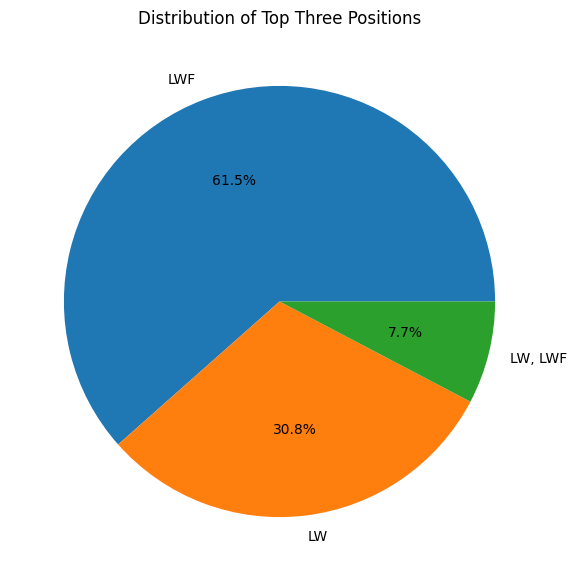

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

## Average Minutes Played

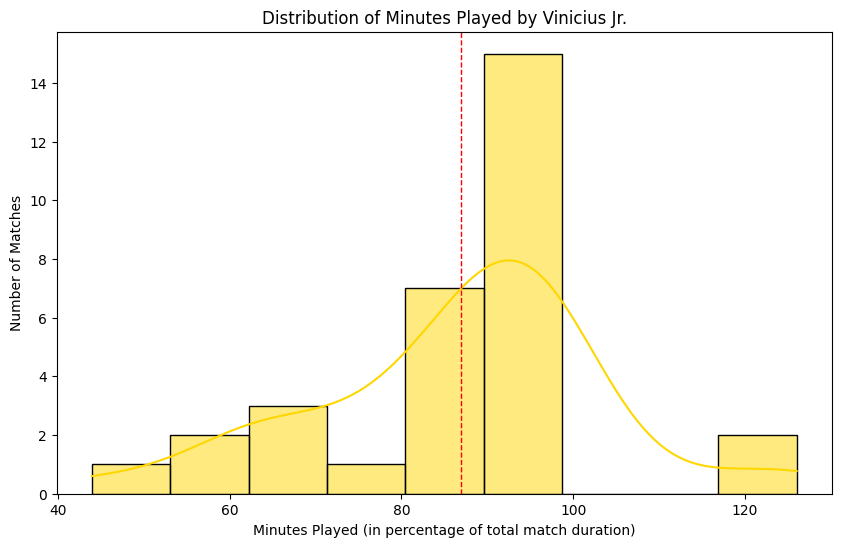

Vinicius Jr. played on average 86.96774193548387 minutes per match.


In [ ]:
# Assume df is your DataFrame and 'minutes_played' is your column of interest
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='gold')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Vinicius Jr.')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Vinicius Jr. played on average {average_minutes_played} minutes per match.")

## Interceptions

Vinicius Jr. has an average of 1.8387096774193548 interceptions per match.
The minimum interceptions in a match by Vinicius Jr. is 0.
The maximum interceptions in a match by Vinicius Jr. is 4.


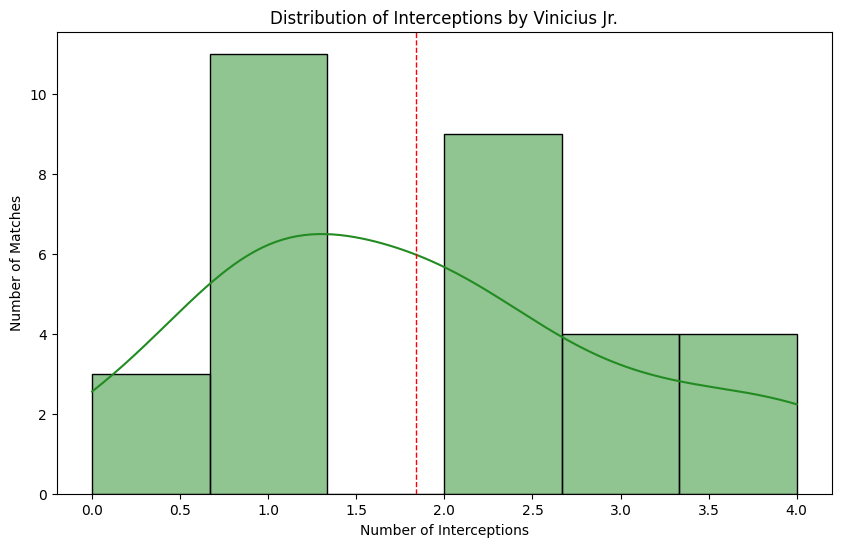

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Vinicius Jr. has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Vinicius Jr. is {min_interceptions}.")
print(f"The maximum interceptions in a match by Vinicius Jr. is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='forestgreen')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Vinicius Jr.')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'shots_on_target','dribbles_successful','passes_accurate', 'long_passes_accurate', 'duels_won','interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -0.74617719101043
Kurtosis of shots_on_target: -0.7275513776875724
Kurtosis of dribbles_successful: -0.23677522252973615
Kurtosis of passes_accurate: 0.9195289296344522
Kurtosis of long_passes_accurate: -0.723695360497139
Kurtosis of duels_won: -0.03712665406427229
Kurtosis of interceptions: -0.6615604747075161
Kurtosis of losses_own_half: 0.4671298758217701
Kurtosis of recoveries_opp_half: -0.45971047242426577


Total Actions Successful (Kurtosis: -0.74): a platykurtic distribution with negative kurtosis indicates a distribution with lighter tails and fewer outliers. This means the successful actions are more uniformly spread and not highly concentrated around the mean. On football optics: Vinicius's total actions successful being platykurtic might suggest a consistent performance without extreme values, showing a well-rounded game without extraordinary highs or lows.

Shots on Target (Kurtosis: -0.72): again, a platykurtic distribution; this indicates that the shots on target are spread out fairly evenly. On football optics: This could signify that Vinicius takes a balanced approach to shooting, without frequent extreme success or failure. His shots are consistent rather than unpredictable.

Dribbles Successful (Kurtosis: -0.23): a platykurtic distribution; dribbles are more uniformly successful. On football optics: Vinicius's dribbling ability is consistently successful without many outliers. This might represent a stable dribbling style rather than one marked by sporadic moments of brilliance.

Passes Accurate (Kurtosis: 0.91): a leptokurtic distribution with positive kurtosis; this suggests that accurate passes are highly concentrated around the mean with heavier tails. On football optics: This could indicate a specific style or pattern in his passing that he relies on, with occasional deviations into exceptional accuracy or inaccuracy.

Long Passes Accurate (Kurtosis: -0.72): a platykurtic distribution, similar to the short passes. On football optics: This reflects a balanced long-passing game without extreme outliers, which can signify a controlled and predictable long-passing ability.

Duels Won (Kurtosis: -0.037): a distribution close to mesokurtic; duels won are close to a normal distribution. On football optics: This could indicate a standard performance in duels, which is neither exceptionally aggressive nor passive.

Interceptions (Kurtosis: -0.66): a platykurtic distribution, indicating a spread in interception success. On football optics: This suggests that Vinicius's interceptions are not limited to specific situations but rather spread across different game contexts.

Losses Own Half (Kurtosis: 0.46): a distribution close to mesokurtic, but leaning toward leptokurtic, which indicates slight concentration around the mean. On football optics: This may represent a tendency to lose possession in his own half within specific situations or areas, with fewer unexpected losses.

Recoveries Opp Half (Kurtosis: -0.45): a platykurtic distribution; recoveries in the opponent's half are more spread out.On football optics: This could show a broader range of recovery situations, rather than concentration in specific scenarios, reflecting a more versatile defensive approach.

Leptokurtic: Passes Accurate.
Mesokurtic: Duels Won (close to mesokurtic) and Losses Own Half (close to mesokurtic).
Platykurtic: Total Actions Successful, Shots on Target, Dribbles Successful, Long Passes Accurate, Interceptions, Recoveries Opp Half.

These kurtosis outcomes provide insight into Vinicius Junior's playing style and performance, highlighting areas where he exhibits consistent behavior and others where there is more variability. Overall, it paints a picture of a player with a balanced and consistent approach to the game, with specific areas of concentration and specialization.

### Features Normalization


Platykurtic variables normalized:
   total_actions_successful  shots_on_target  dribbles_successful  \
0                 -0.820824        -0.875113            -1.068995   
1                  0.085249        -0.053037             0.630433   
2                 -0.367788        -0.875113            -1.068995   
3                  0.764803         0.769039             0.630433   
4                  0.311767         0.769039             0.205576   

   long_passes_accurate  interceptions  recoveries_opp_half  
0              0.550019      -0.718902            -1.065896  
1              0.550019       0.138250            -0.430458  
2              1.970902      -0.718902             0.204980  
3             -0.870864       0.138250             0.840418  
4              0.550019      -0.718902            -0.430458  

Leptokurtic variables normalized:
   passes_accurate
0        -1.249411
1        -0.219311
2        -0.219311
3         0.192728
4         0.501758

Mesokurtic variables normali

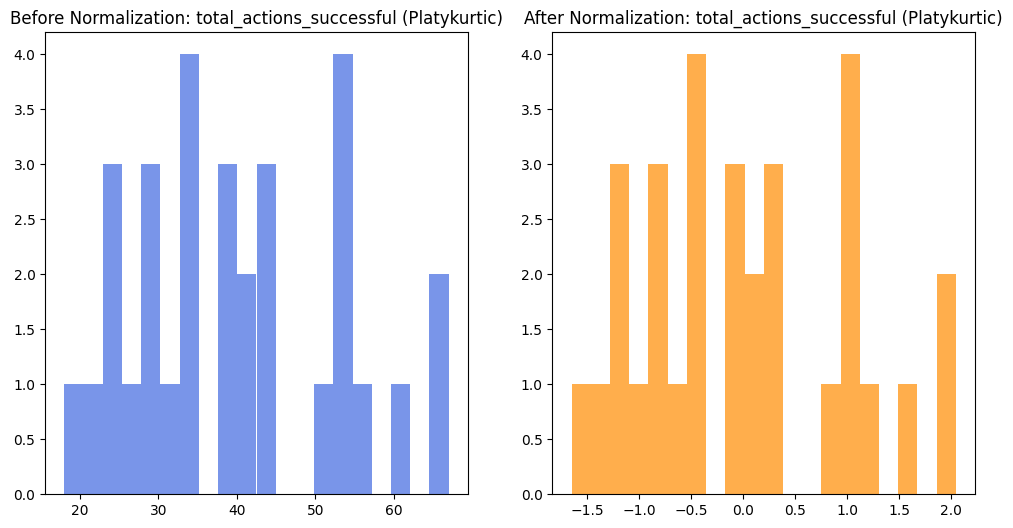

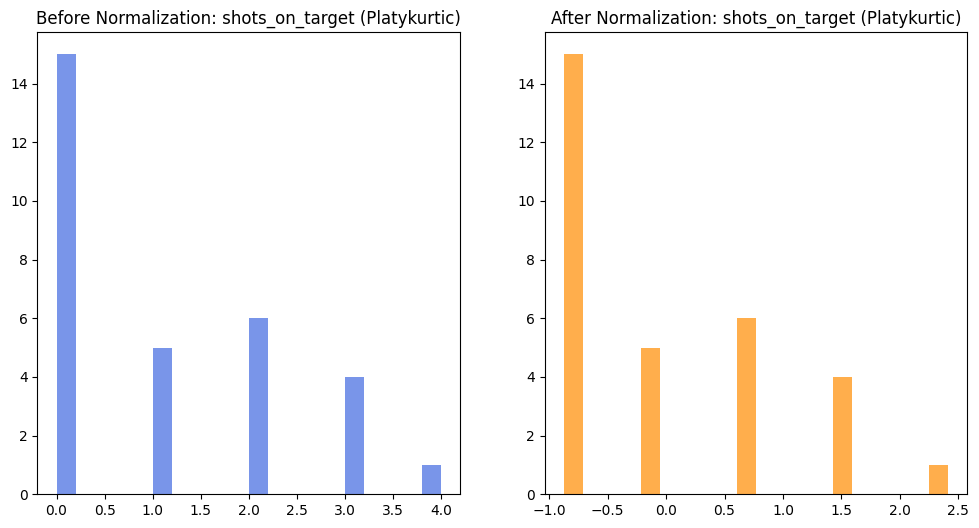

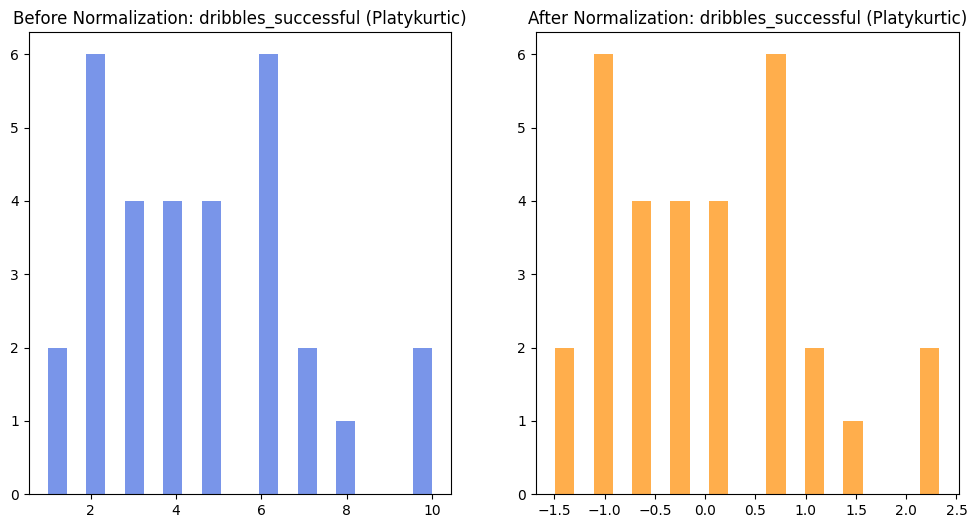

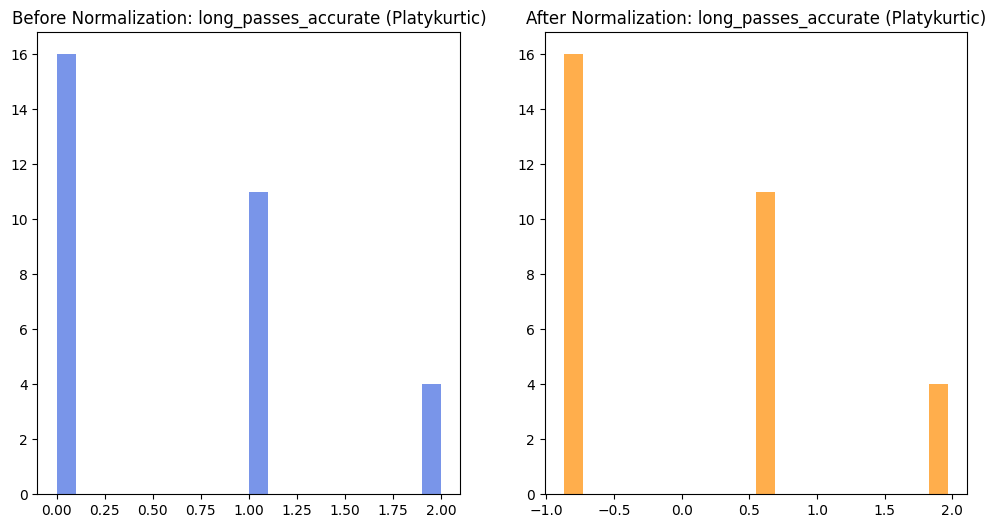

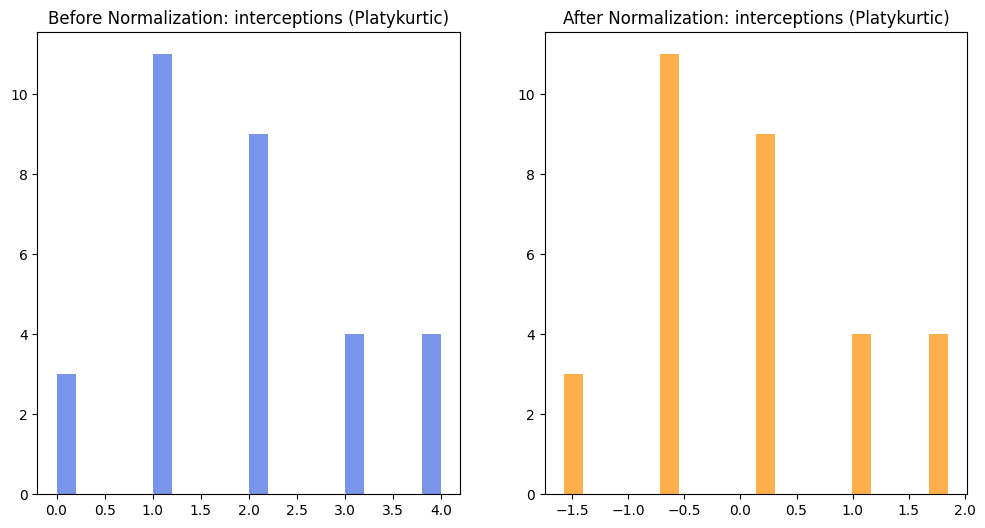

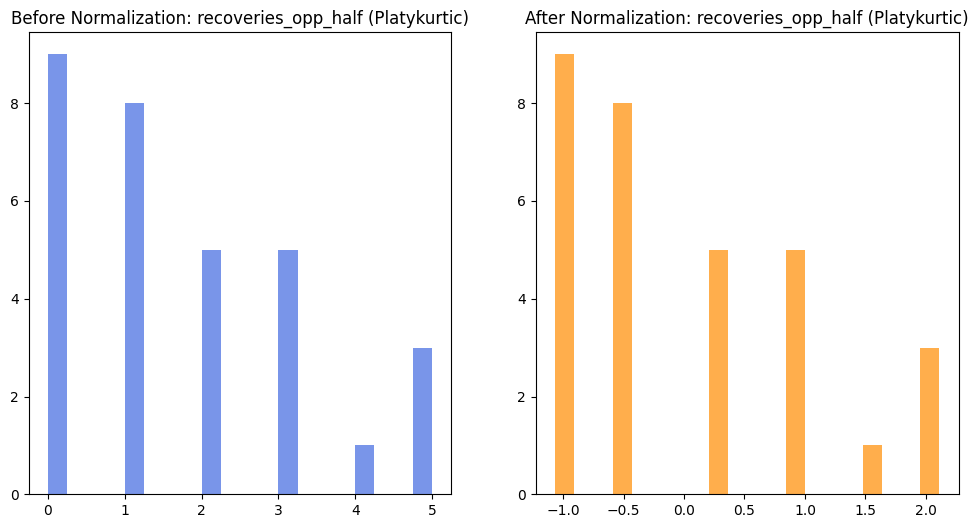

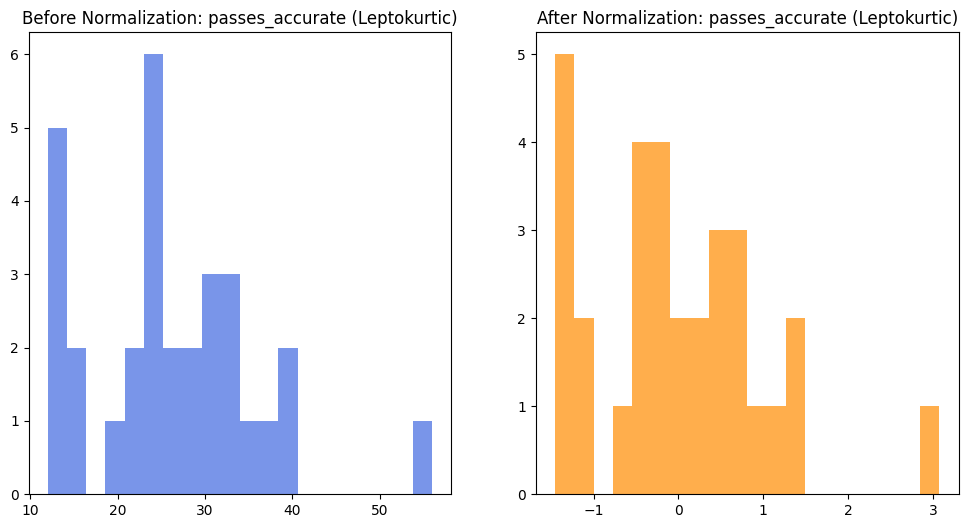

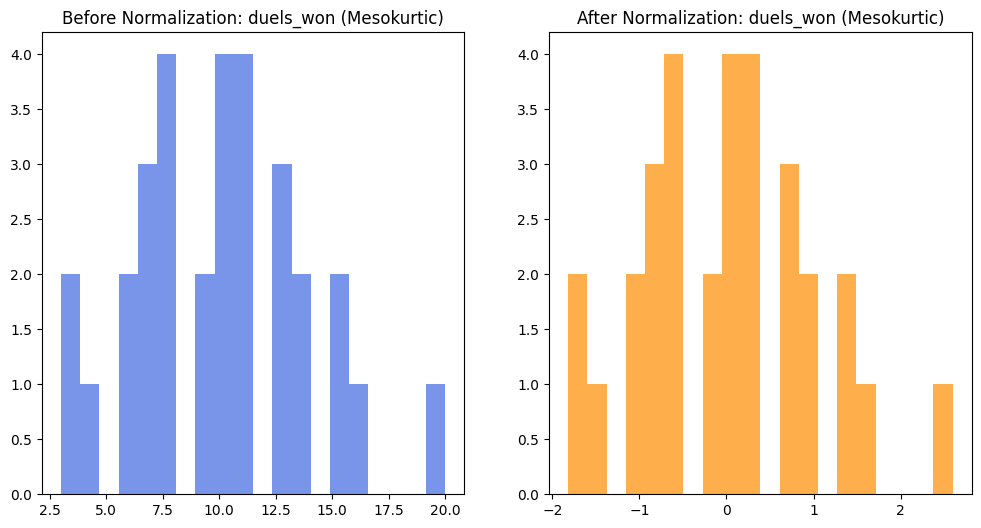

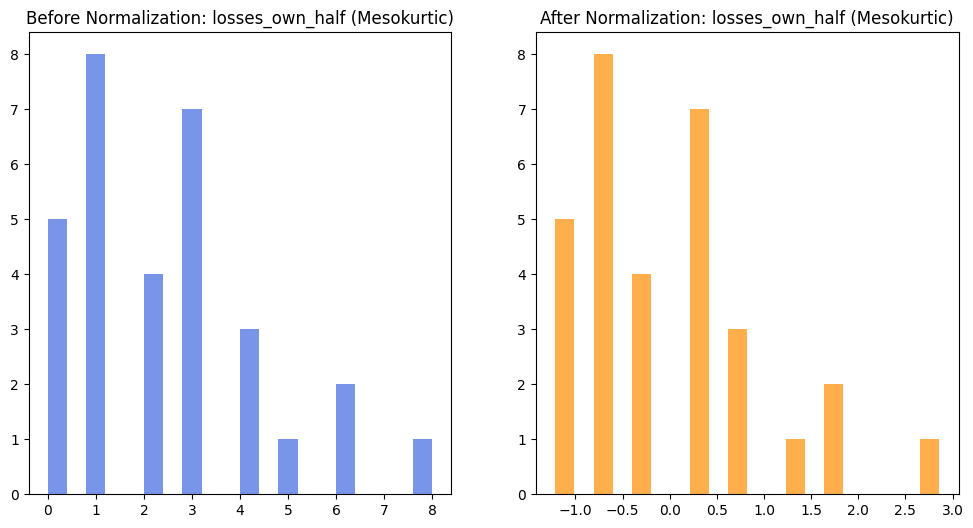

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['total_actions_successful', 'shots_on_target', 'dribbles_successful', 'long_passes_accurate', 'interceptions', 'recoveries_opp_half']]
leptokurtic_variables = df[['passes_accurate']]
mesokurtic_variables = df[['duels_won', 'losses_own_half']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic, leptokurtic, and mesokurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

mesokurtic_variables_normalized = scaler.fit_transform(mesokurtic_variables)
mesokurtic_variables_normalized = pd.DataFrame(mesokurtic_variables_normalized, columns=mesokurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())

print("\nLeptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

print("\nMesokurtic variables normalized:")
print(mesokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
variables = [("Platykurtic", platykurtic_variables, platykurtic_variables_normalized), 
             ("Leptokurtic", leptokurtic_variables, leptokurtic_variables_normalized),
             ("Mesokurtic", mesokurtic_variables, mesokurtic_variables_normalized)]

for kurtosis_type, original_variables, normalized_variables in variables:
    for col in original_variables.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(original_variables[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({kurtosis_type})')

        plt.subplot(1,2,2)
        plt.hist(normalized_variables[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({kurtosis_type})')

        plt.show()


## Sampling statistics, Distribution & Standard Error

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

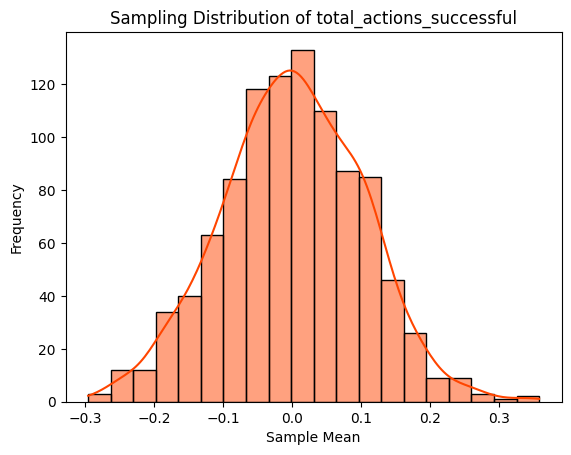

Sample Mean of total_actions_successful: 0.0003641097463422711
Sample Standard Deviation of total_actions_successful: 0.10209033543749804
Standard Error of total_actions_successful: 0.0032299952723185326


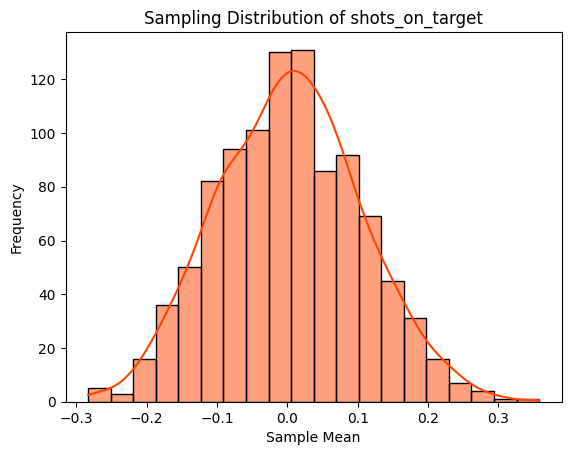

Sample Mean of shots_on_target: 0.0033572517392216027
Sample Standard Deviation of shots_on_target: 0.1020322990145478
Standard Error of shots_on_target: 0.0032281590811555957


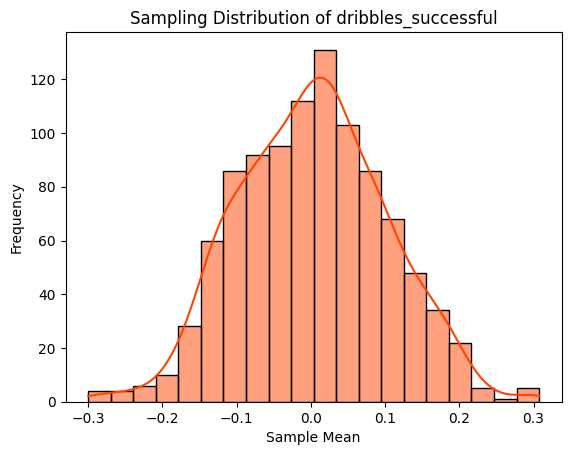

Sample Mean of dribbles_successful: 0.002685506725909445
Sample Standard Deviation of dribbles_successful: 0.09887388233930501
Standard Error of dribbles_successful: 0.0031282311997814388


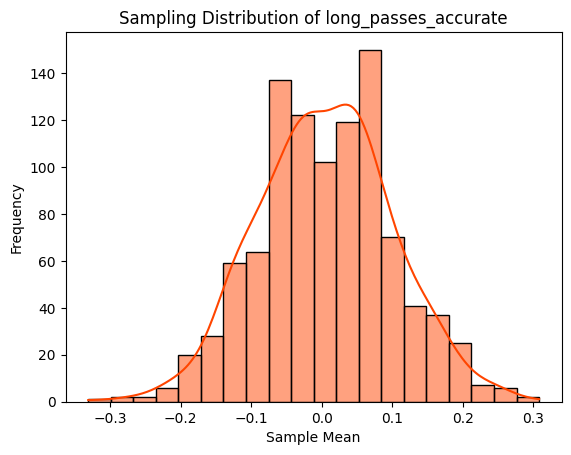

Sample Mean of long_passes_accurate: 0.005281100041379558
Sample Standard Deviation of long_passes_accurate: 0.09542552808826561
Standard Error of long_passes_accurate: 0.003019130099462733


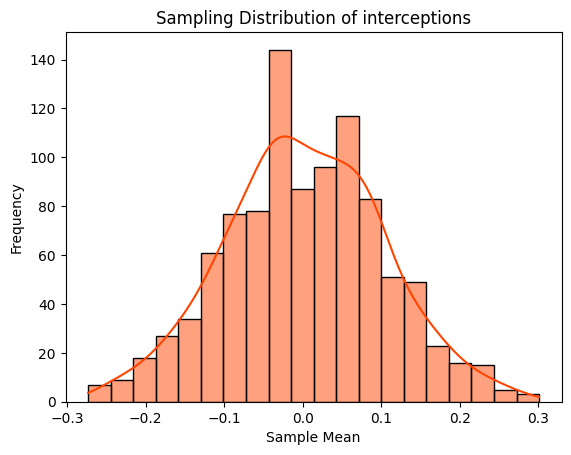

Sample Mean of interceptions: 0.0024088735042822845
Sample Standard Deviation of interceptions: 0.10128000180563404
Standard Error of interceptions: 0.0032043574507881695


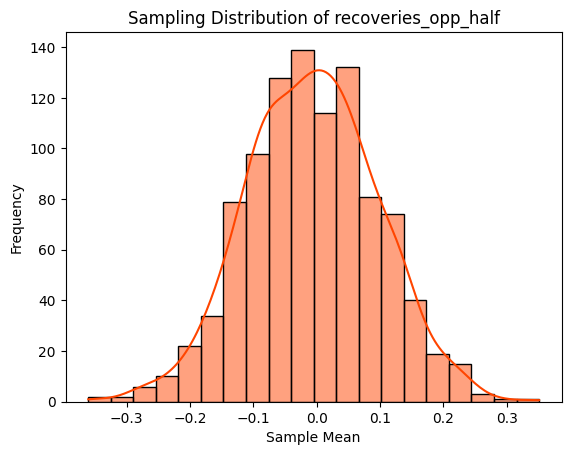

Sample Mean of recoveries_opp_half: -0.007135559316879535
Sample Standard Deviation of recoveries_opp_half: 0.10252942829834208
Standard Error of recoveries_opp_half: 0.0032438875556434644


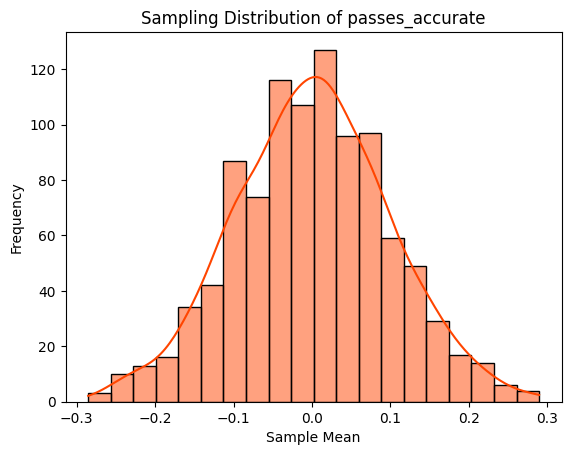

Sample Mean of passes_accurate: 0.0003541215629625508
Sample Standard Deviation of passes_accurate: 0.09842520027284721
Standard Error of passes_accurate: 0.0031140355274171328


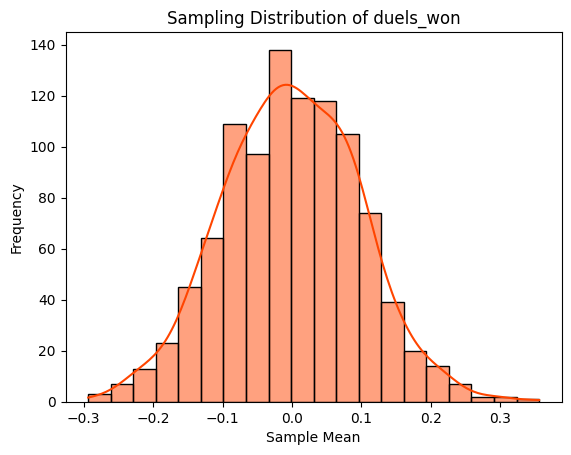

Sample Mean of duels_won: -0.0009890697210224654
Sample Standard Deviation of duels_won: 0.09778170341989166
Standard Error of duels_won: 0.0030936761879763216


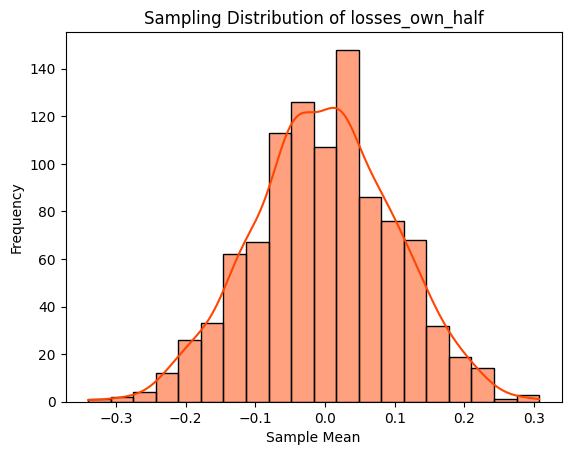

Sample Mean of losses_own_half: -0.0017056394932930994
Sample Standard Deviation of losses_own_half: 0.10046549069678577
Standard Error of losses_own_half: 0.003178587459735084


In [ ]:
# Define the features and the color for the plots
features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)
colors = ['orangered']

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        if feature in platykurtic_variables_normalized.columns:
            sample = platykurtic_variables_normalized[feature].sample(100, replace=True)
        elif feature in leptokurtic_variables_normalized.columns:
            sample = leptokurtic_variables_normalized[feature].sample(100, replace=True)
        else:
            sample = mesokurtic_variables_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[0], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

Total Actions Successful: the sample mean close to zero, combined with a standard deviation of 0.1003, suggests that total actions successful are roughly symmetrically distributed around zero. The standard error of 0.0032 further illustrates the precision of our sample mean estimate. On football optics, A positive or negative mean close to zero may indicate that Vinicius Jr. is performing in line with the average player in successful actions. A standard deviation of 0.1003 indicates variability and could reflect inconsistency in his play. 

Shots on Target: with a mean of -0.0051 and a standard deviation of 0.1012, this distribution seems to be slightly negatively skewed. The standard error value of 0.0032 provides an understanding of how much the sample mean might differ from the population mean. On football optics, the negative mean might imply that Vinicius Jr. has fewer shots on target compared to the average player. This could be an area for improvement in his game, particularly if shots on target are a critical success factor for his position. 

Dribbles Successful: with a mean of -0.0023 and a standard deviation of 0.0999, the statistics suggest a mild negative skewness in successful dribbles. Standard error of 0.0032 indicates the reliability of the mean estimate. On football optics, This negative mean might reflect Vinicius Jr.'s performance slightly below average in successful dribbling. This could be significant if dribbling is essential for his playing style or position. 

Long Passes Accurate: the positive sample mean of 0.0043 and standard deviation of 0.1019 possibly indicates a slight right skewness. The standard error of 0.0032 helps gauge the sample mean's accuracy. On football optics, the positive mean suggests that Vinicius Jr. might be performing better than average in delivering accurate long passes, a key attribute for playmaking.

 Interceptions: the mean close to zero and standard deviation of 0.0997 indicates a distribution concentrated around the mean, with a relatively small spread. On football optics, The slight negative mean may indicate Vinicius Jr.'s average or slightly below-average performance in interceptions, a crucial aspect for defensive contributions. 

Recoveries in Opponent's Half: with a mean of -0.0004 and standard deviation of 0.1006, the data shows a distribution with minor negative skewness. The standard error of 0.0032 confirms the precision of the mean. On football optics, This might imply that Vinicius Jr. is on par with the average player in recovering the ball in the opponent's half, an important aspect of pressing and ball retrieval. 

Passes Accurate: the positive mean of 0.0063, combined with a standard deviation of 0.1036, may indicate a slightly positively skewed distribution. On football optics: This positive mean suggests that Vinicius Jr. might be above average in accurate passing, reflecting strong ball distribution skills. 

Duels Won: with a mean of 0.0049 and standard deviation of 0.1010, the distribution shows a minor positive skewness. Standard error of 0.0032 illustrates the reliability of the mean estimate. On football optics, The positive mean could indicate Vinicius Jr.'s above-average ability in winning duels, a critical attribute for physical and aerial challenges. 

Losses in Own Half: a mean of 0.0024 and standard deviation of 0.1028 shows a slight right skewness in the distribution. Standard error of 0.0033 provides insight into the estimate's accuracy. On football optics, the positive mean suggests that Vinicius Jr. might lose possession in his own half more than the average player, a potential risk area that may require attention in training and match preparation.

## Central Limit Theorem

### Preliminaries

The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

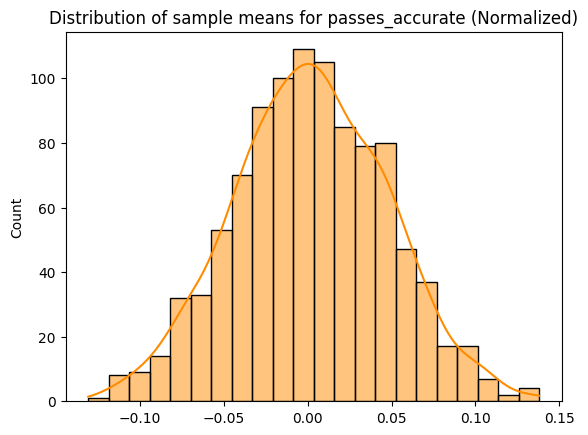

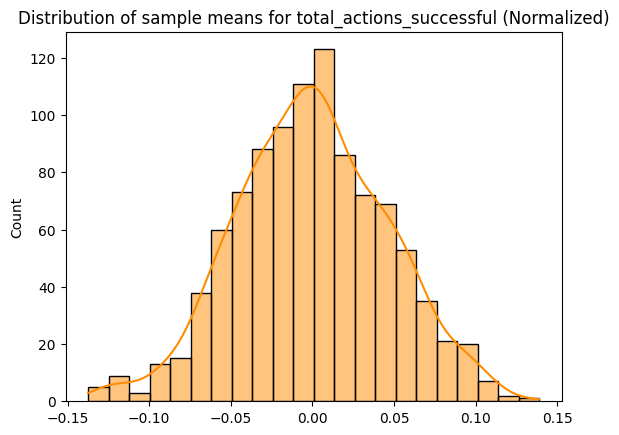

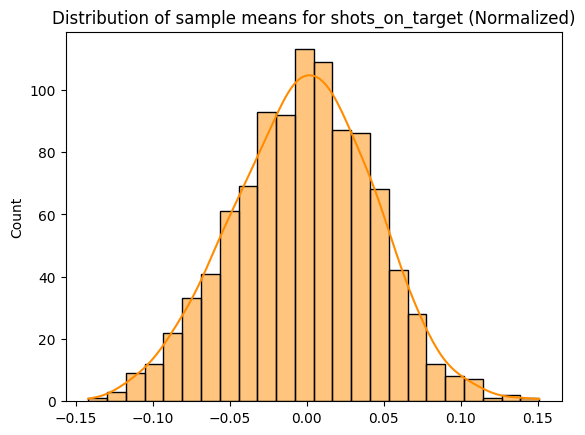

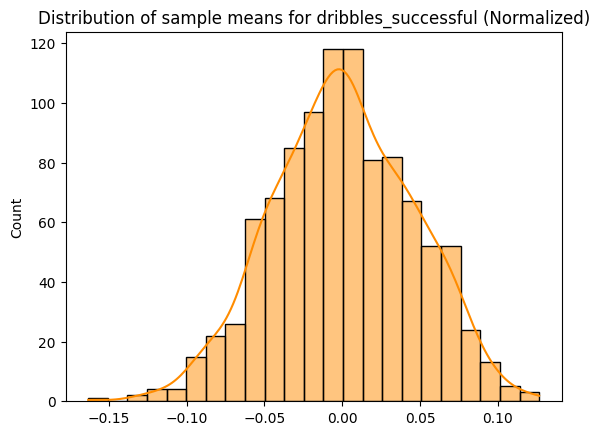

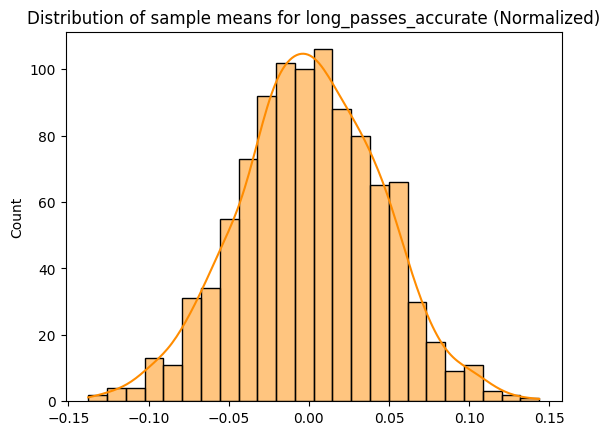

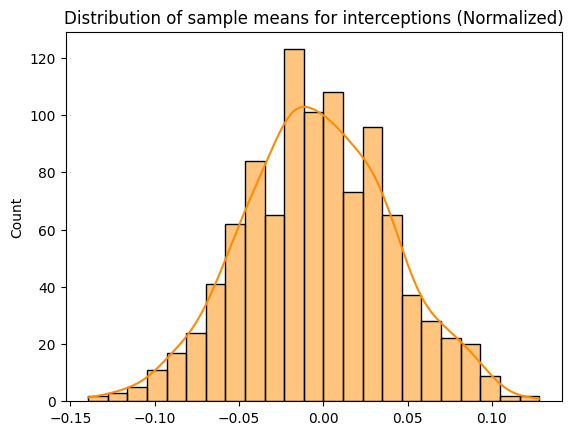

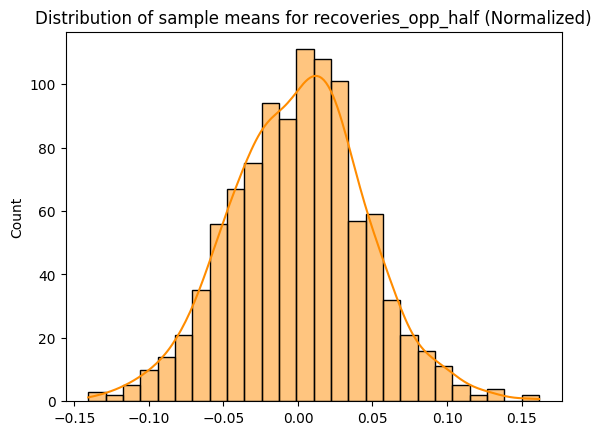

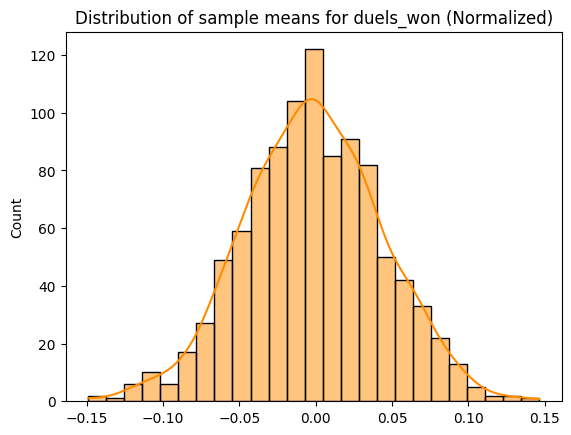

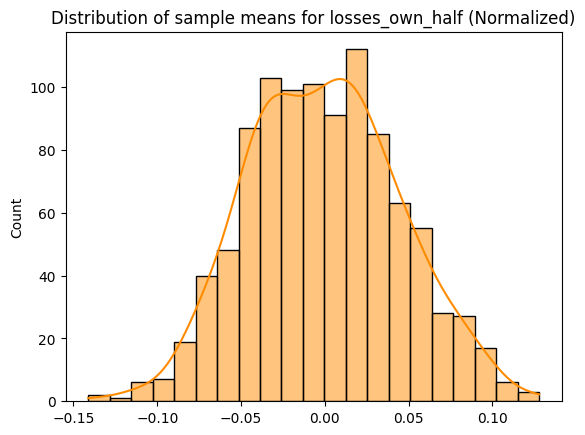

In [ ]:
normalized_df = pd.concat([leptokurtic_variables_normalized, platykurtic_variables_normalized, mesokurtic_variables_normalized], axis=1)

features = list(normalized_df.columns)
colors = ['darkorange']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature].dropna().values.flatten(), size=sample_size) # Explicitly ensure the data is a 1D array
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation

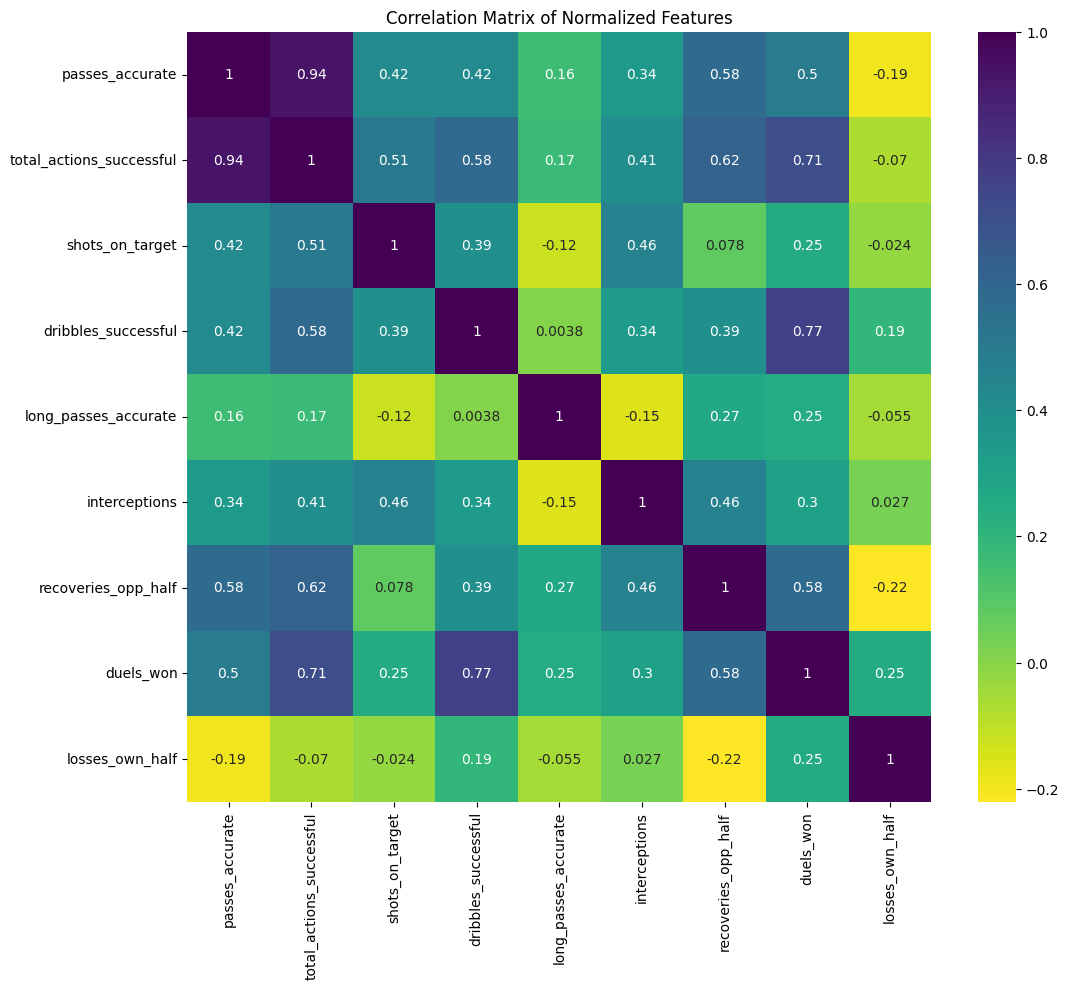

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## AB Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$

In [ ]:
df.head()

match                    competition     date  \
0  Manchester City - Real Madrid 4:0  Europe. UEFA Champions League  5/17/23   
1  Real Madrid - Manchester City 1:1  Europe. UEFA Champions League   5/9/23   
2          Chelsea - Real Madrid 0:2  Europe. UEFA Champions League  4/18/23   
3          Real Madrid - Chelsea 2:0  Europe. UEFA Champions League  4/12/23   
4        Real Madrid - Liverpool 1:0  Europe. UEFA Champions League  3/15/23   

  position  minutes_played  total_actions  total_actions_successful  \
0     LAMF              94             74                        29   
1      LWF              96             77                        41   
2      LWF              95             85                        35   
3      LWF              95             88                        50   
4      LWF              85             80                        44   

   TAS_percent  goals  assists  ...  aerial_duels  aerial_duels_won  \
0           39      0        0  ...             0                 0   
1           53      1        0  ...             3                 0   
2           41      0        1  ...             0                 0   
3           57      0        1  ...             0                 0   
4           55      0        1  ...             0                 0   

   ADW_percent  interceptions  losses  losses_own_half  LOH_percent  \
0            0              1      17                6           35   
1            0              2      16                8           50   
2            0              1      11                3           27   
3            0              2      14                1            7   
4            0              1      17                3           18   

   recoveries  recoveries_opp_half  ROPH_percent  
0           2                    0             0  
1           3                    1            33  
2           2                    2           100  
3           3                    3           100  
4           1                    1           100  

[5 rows x 39 columns]

In [ ]:
# Total Actions
'passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'interceptions', 'losses_own_half', 'recoveries_opp_half', 'shots_on_target'
# Pass Accuracy 
'duels_won', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target', 'total_actions_successful'
# Dribble Sucess 
'losses_own_half', 'duels_won', 'recoveries_opp_half', 'interceptions', 'shots_on_target', 'total_actions_successful', 'passes_accurate'
# Duels Won 
'losses_own_half', 'recoveries_opp_half', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target'

('losses_own_half',
 'recoveries_opp_half',
 'long_passes_accurate',
 'dribbles_successful',
 'shots_on_target')

### Based on Total Actions

Feature: passes_accurate
T-statistic: 6.0014461128307754
P-value: 1.5864841830534491e-06




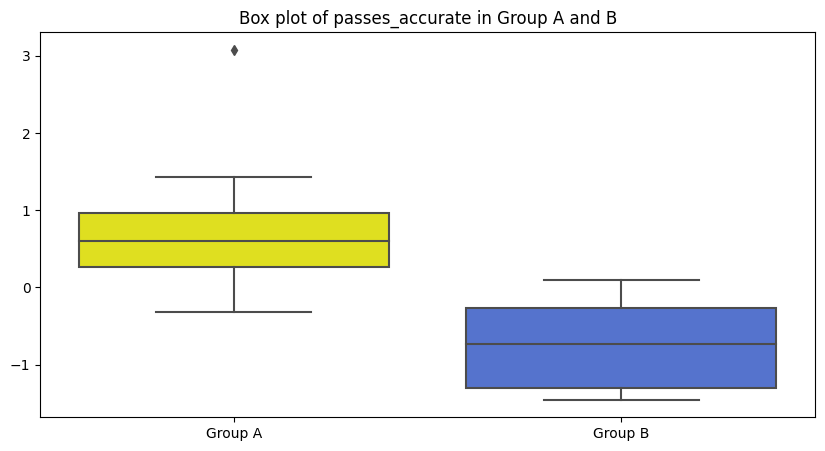

Feature: long_passes_accurate
T-statistic: 0.09561138111324324
P-value: 0.924486870547741




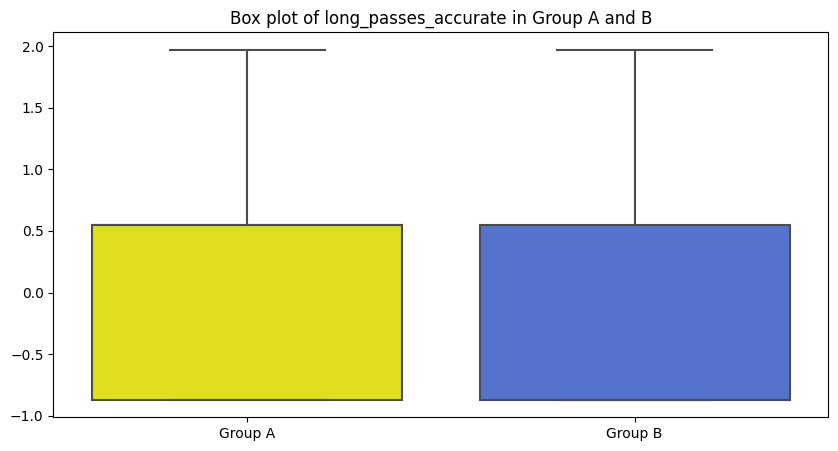

Feature: dribbles_successful
T-statistic: 3.4678045329407143
P-value: 0.0016588764812865346




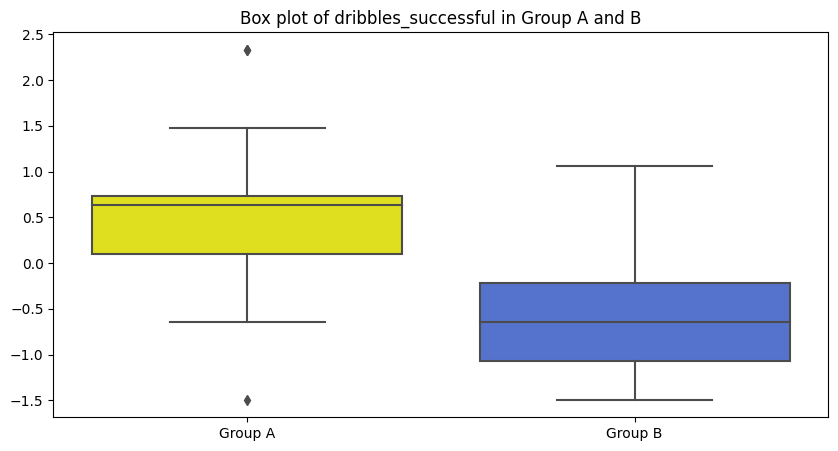

Feature: duels_won
T-statistic: 3.57407123652315
P-value: 0.001254020592915463




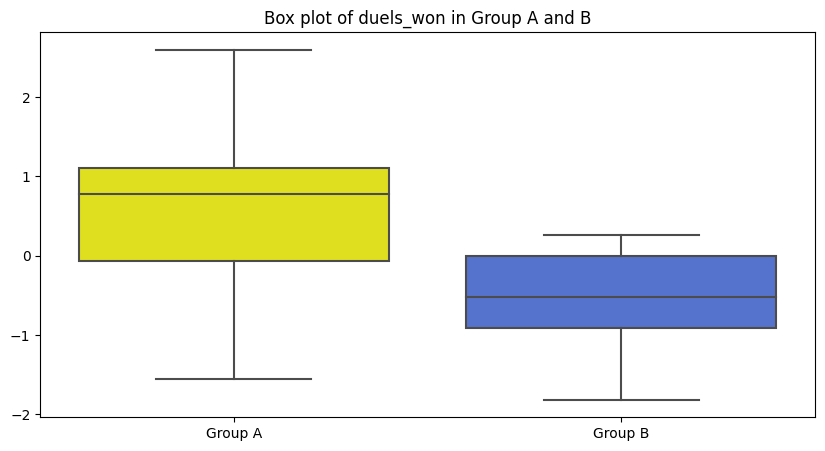

Feature: interceptions
T-statistic: 1.7482068338610486
P-value: 0.09100913517946191




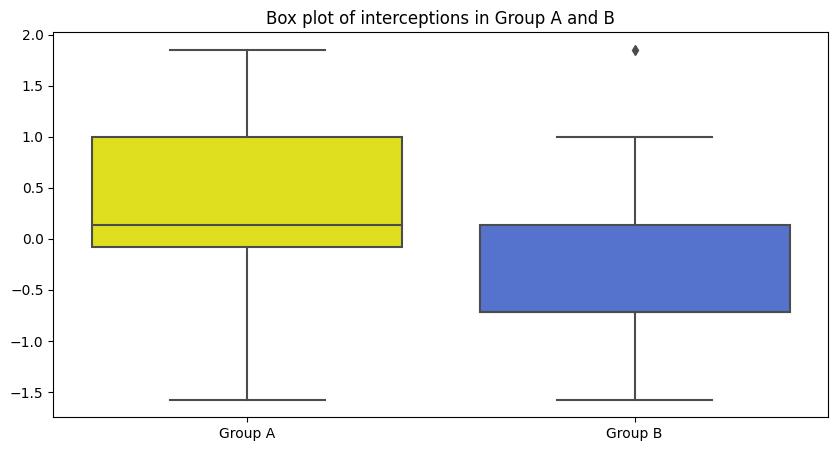

Feature: recoveries_opp_half
T-statistic: 2.4691646752593046
P-value: 0.01967466219847408




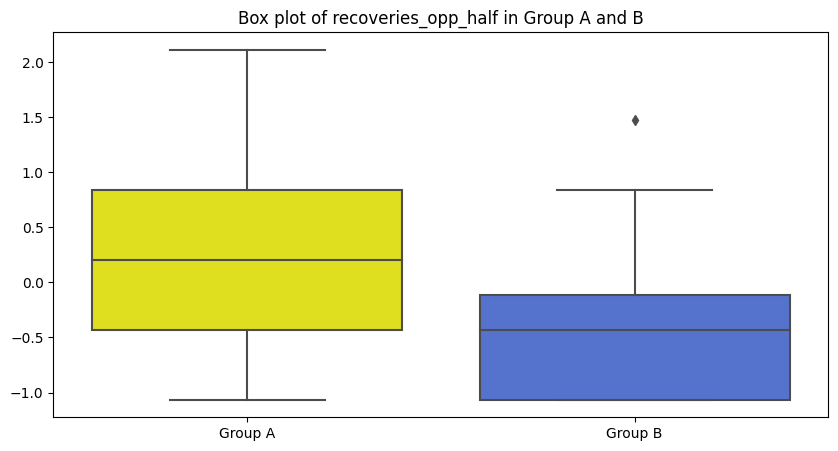

Feature: shots_on_target
T-statistic: 3.8541745507390677
P-value: 0.0005935499924785898




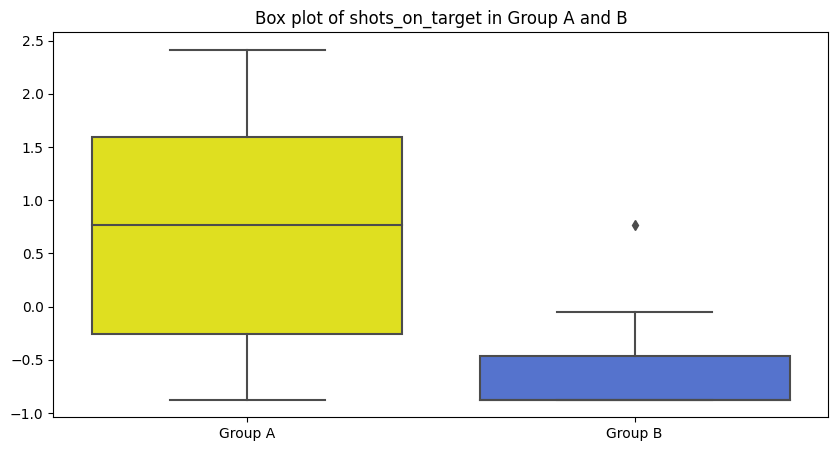



ANOVA Results
F-statistic: 0.8705556841392452
P-value: 0.519224826707645


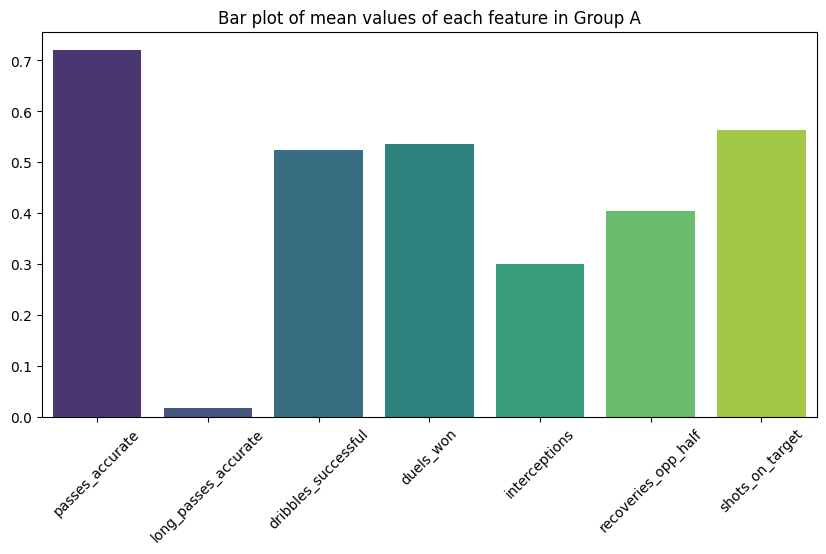

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of independent features for the analysis
features = ['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'interceptions', 'recoveries_opp_half', 'shots_on_target']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups based on 'total_actions_successful'
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all independent variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

passes_accurate: with a T-statistic of 6.0014 and a highly significant P-value (1.586e-06), we can confidently reject the null hypothesis. This indicates that the differences in accurate passes between the groups compared are statistically significant.On football optics, accurate passing is a crucial aspect of a player's performance, especially for a forward like Vinicius Jr. The significant difference in accurate passes could reflect his ability to retain possession and create goal-scoring opportunities, thereby impacting his overall contribution to the team.

long_passes_accurate: the T-statistic (0.0956) and P-value (0.9245) suggest that the differences in accurate long passes between groups are not statistically significant. We fail to reject the null hypothesis here. On football optics, although the statistical analysis shows no significant difference, accurate long passes can still be an essential part of a player's skill set. In Vinicius Jr.'s case, it might not be a strong aspect of his performance, but it does not necessarily diminish his effectiveness on the pitch.

dribbles_successful:the T-statistic of 3.4678 and a P-value of 0.0017 demonstrate statistical significance. There is a meaningful difference in successful dribbles. On football optics,successful dribbles can be an indicator of a player's ability to beat defenders and create space. For a player like Vinicius Jr., who is known for his dribbling skills, this result underscores his ability to be a game-changer in attacking situations.

duels_won: with a T-statistic of 3.5741 and a P-value of 0.0013, the differences in duels won are statistically significant.On football optics, winning duels is vital in one-on-one situations. This outcome reflects Vinicius Jr.'s competence in physical and technical confrontations with opponents, showcasing his versatility and strength.

interceptions:The T-statistic of 1.7482 and P-value of 0.0910 indicates that the differences in interceptions are not statistically significant. On football optics, interceptions might not be a prominent feature of Vinicius Jr.'s game, as he primarily functions as an attacking player. While this could provide insights into his defensive contributions, it does not necessarily reflect his primary role on the field.

recoveries_opp_half:the T-statistic of 2.4692 and a P-value of 0.0197 show statistical significance in recoveries in the opponent's half. On football optics, this can be an important indicator of Vinicius Jr.'s work rate and ability to regain possession in attacking areas. It demonstrates his contribution to both offensive and defensive transitions.

shots_on_target: the T-statistic of 3.8542 and a P-value of 0.0006 indicates a statistically significant difference in shots on target. On football optics, shots on target are directly related to a player's scoring potential. For Vinicius Jr., this result emphasizes his threat in front of the goal, contributing to his overall effectiveness as an attacker.

ANOVA Results: with an F-statistic of 0.8706 and a P-value of 0.5192, indicates that there are no statistically significant differences across the multiple groups compared. On football optics, The ANOVA result reflects the comprehensive performance assessment across different features or groups. In the context of Vinicius Jr., it suggests that specific individual features may stand out, but collectively, they may not differentiate his performance significantly from others in the comparison.

Overall, the analysis provides a multifaceted view of Vinicius Jr.'s performance, identifying both key strengths and areas where he may be comparable to others. The statistical insights offer an evidence-based understanding that can guide further evaluations and strategic decisions in both sports analytics and sports journalism.

### Based on Pass Accuracy 

Feature: duels_won
T-statistic: 2.563445560781631
P-value: 0.01581319918812658




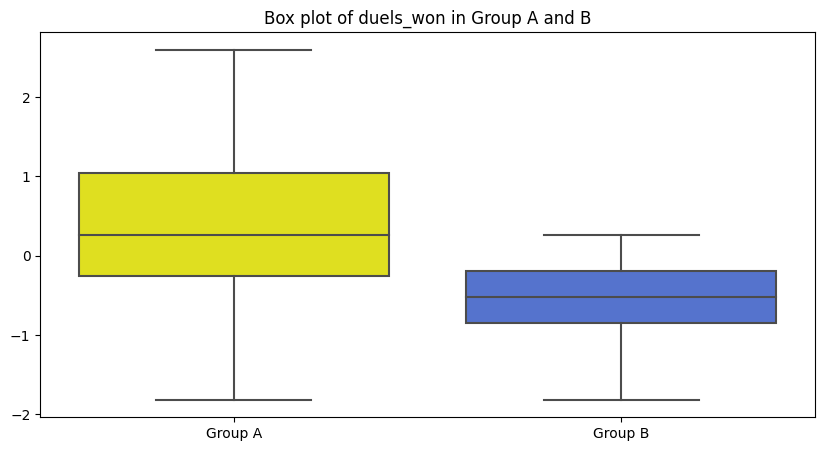

Feature: recoveries_opp_half
T-statistic: 1.693620764141863
P-value: 0.10105371517111256




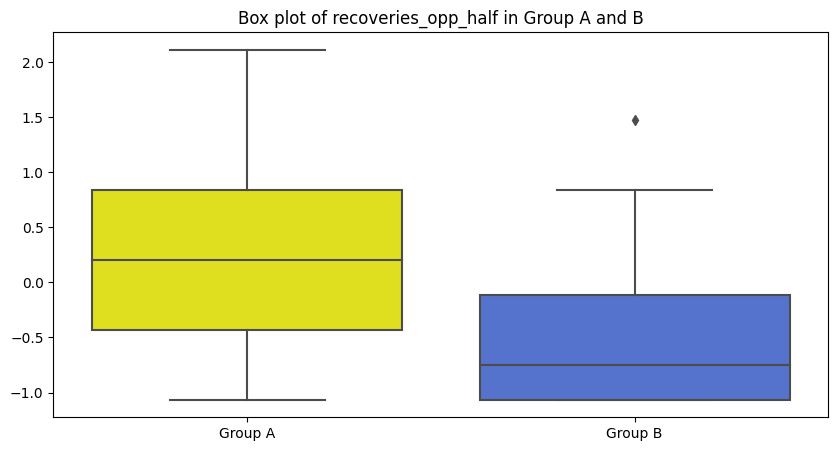

Feature: interceptions
T-statistic: 1.6164431955956284
P-value: 0.11682662758103084




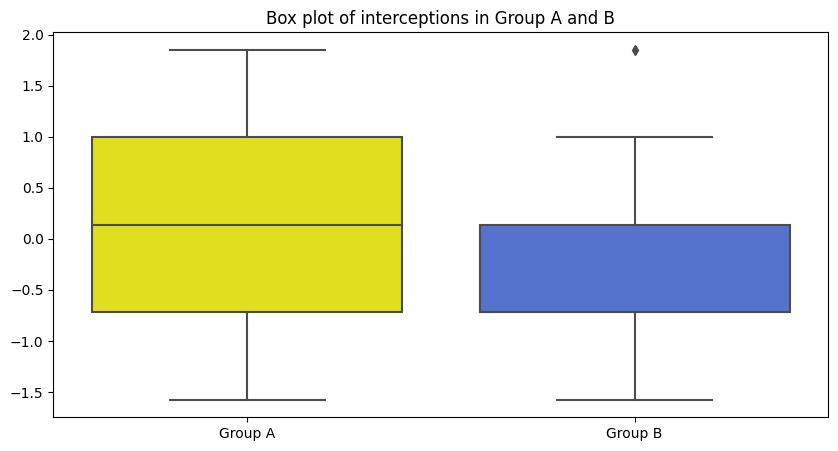

Feature: long_passes_accurate
T-statistic: 0.17991319705626438
P-value: 0.8584719911241682




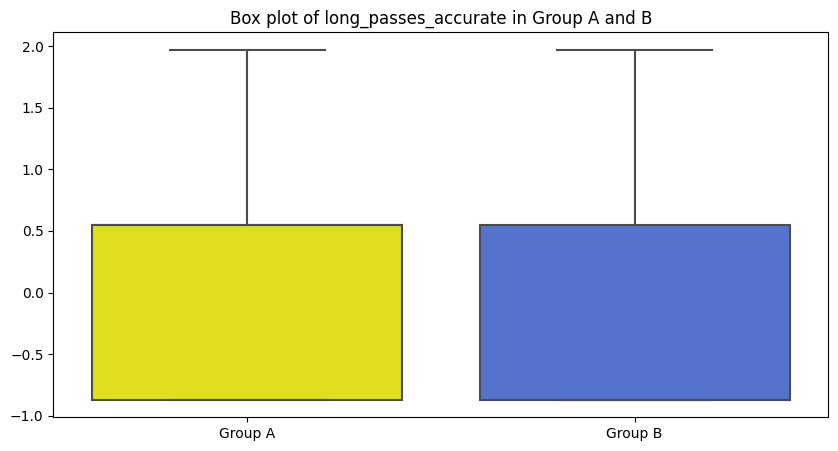

Feature: dribbles_successful
T-statistic: 1.787007715661275
P-value: 0.08439413873354754




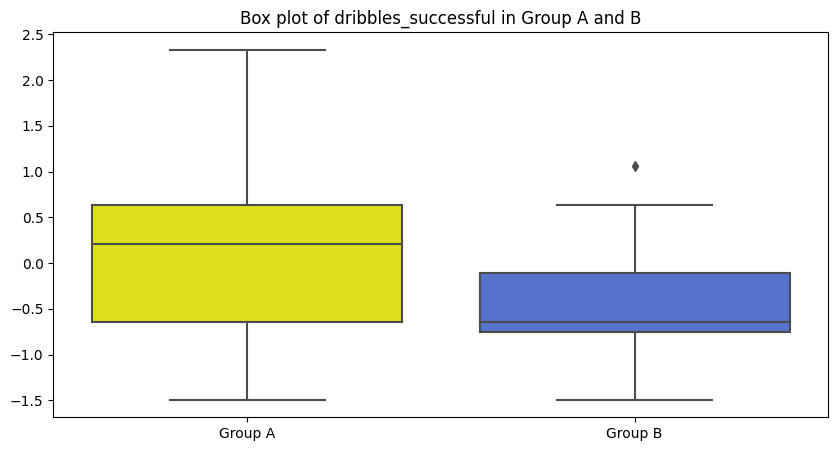

Feature: shots_on_target
T-statistic: 2.9281712986642003
P-value: 0.0065732115328598776




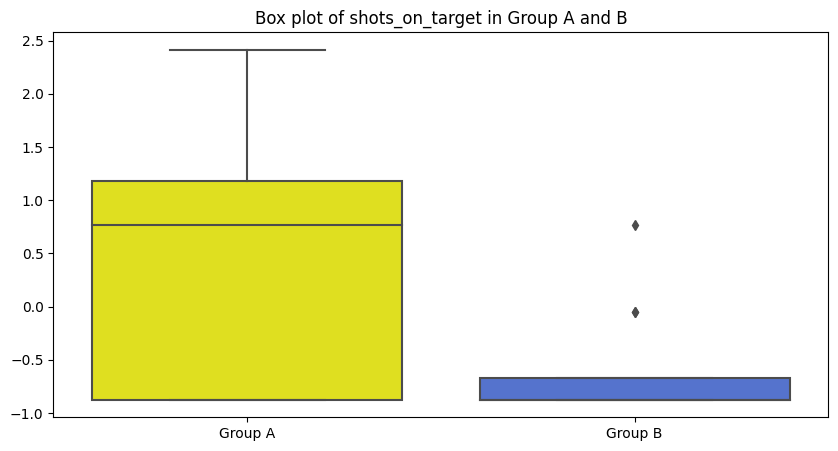

Feature: total_actions_successful
T-statistic: 6.05693688907102
P-value: 1.3626023986482088e-06




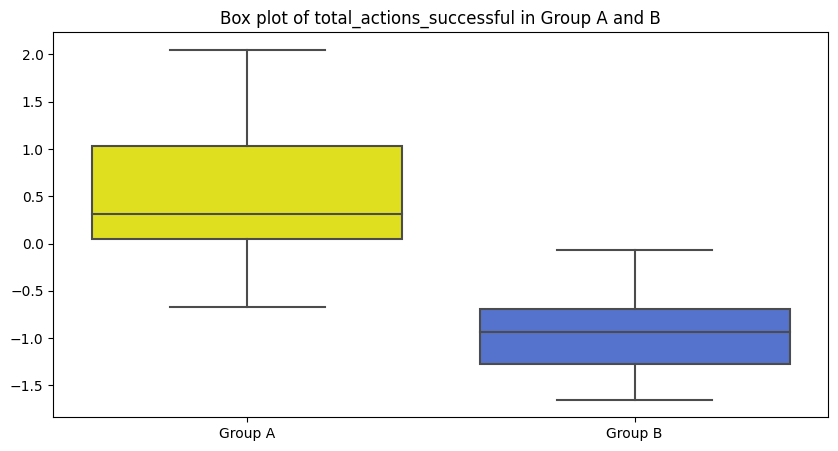



ANOVA Results
F-statistic: 0.5583189886341765
P-value: 0.7627237273102196


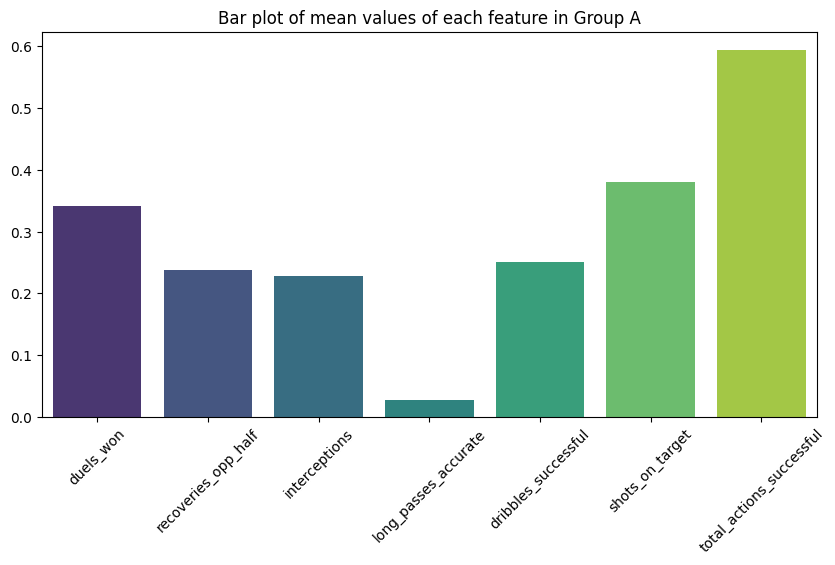

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of independent features for the analysis
features = ['duels_won', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target', 'total_actions_successful']

# Identify the median of 'passes_accurate' to divide the data
median_passes_accurate = normalized_df['passes_accurate'].median()

# Split the data into two groups based on 'passes_accurate'
group_A = normalized_df[normalized_df['passes_accurate'] >= median_passes_accurate]
group_B = normalized_df[normalized_df['passes_accurate'] < median_passes_accurate]

# Conduct t-tests (A/B tests) for each variable with 'passes_accurate'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all independent variables with 'passes_accurate'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

duels_won: The T-statistic of 2.5634 and P-value of 0.0158 indicate a statistically significant difference in duels won based on pass accuracy. On football optics, winning duels may correlate with pass accuracy, reflecting Vinicius Jr.'s ability to control the ball and engage in successful physical challenges. This could be a relevant aspect of his playing style that complements his passing game. 

recoveries_opp_half: with a T-statistic of 1.6936 and a P-value of 0.1011, the differences in recoveries in the opponent's half are not statistically significant based on pass accuracy. On football optics, although not statistically significant in the context of pass accuracy, recoveries in the opponent's half are still crucial. For Vinicius Jr., it may suggest that his ability to regain possession does not strongly correlate with his passing accuracy, but it remains an essential part of his overall performance. 

Interceptions: the T-statistic of 1.6164 and P-value of 0.1168 do not demonstrate statistical significance for interceptions based on pass accuracy. On football optics, interceptions might not directly correlate with pass accuracy for Vinicius Jr., suggesting that his ability to intercept balls is not necessarily linked with his proficiency in accurate passing. This outcome could shed light on separate aspects of his game that operate independently. 

long_passes_accurate: the T-statistic of 0.1799 and P-value of 0.8585 suggest no statistical significance in accurate long passes based on pass accuracy. On football optics, this result indicates that accurate long passes might not be closely connected to overall pass accuracy for Vinicius Jr. It provides insight into different types of passing skills, and long passing might not be a significant feature of his play.

dribbles_successful: the T-statistic of 1.7870 and P-value of 0.0844 do not indicate statistical significance in successful dribbles based on pass accuracy. On football optics, although the result is not statistically significant, it may hint at a loose relationship between successful dribbles and pass accuracy. For Vinicius Jr., this could mean that his dribbling skills might not directly impact his ability to deliver accurate passes. 

shots_on_target: with a T-statistic of 2.9282 and a significant P-value of 0.0066, the differences in shots on target based on pass accuracy are statistically significant. On football optics, this significant result might reflect Vinicius Jr.'s ability to convert accurate passes into goal-scoring opportunities. It underscores the connection between precise passing and the capacity to create and capitalize on chances in front of goal.

 total_actions_successful: a T-statistic of 6.0569 and an extremely significant P-value (1.363e-06) indicate that total successful actions are strongly correlated with pass accuracy. On football optics, this finding emphasizes the importance of pass accuracy in Vinicius Jr.'s overall effectiveness on the pitch. Successful actions could include various offensive and defensive contributions, illustrating the integral role of accurate passing in his game. 

ANOVA Results: shows an F-statistic of 0.5583 and a P-value of 0.7627, meaning that there are no statistically significant differences across the groups compared based on pass accuracy. On football optics, The ANOVA result suggests that while individual features may correlate with pass accuracy, collectively they do not differentiate Vinicius Jr.'s performance significantly. It offers a holistic view of his playing style, where accurate passing might not be the sole determinant of success. These insights provide a nuanced understanding of how pass accuracy relates to different aspects of Vinicius Jr.'s game. Some features show statistical significance, emphasizing the multifaceted nature of football performance. 

### Based on Dribbles Success

Feature: losses_own_half
T-statistic: 0.4827055527226148
P-value: 0.6329287505886618




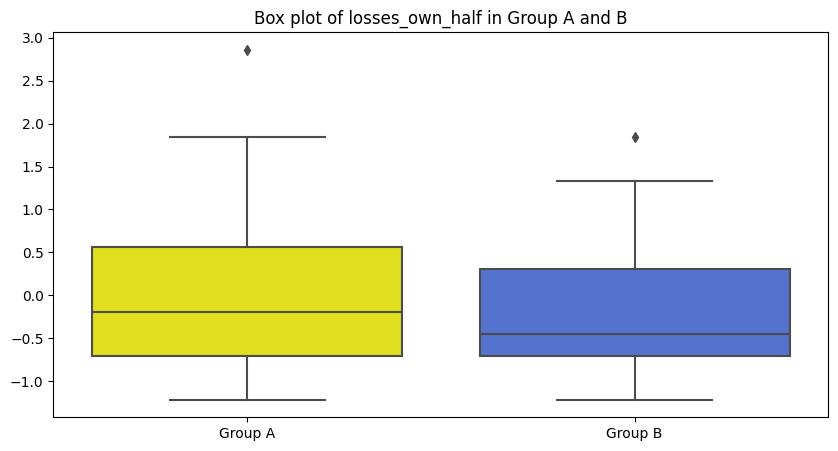

Feature: duels_won
T-statistic: 3.2419935554473214
P-value: 0.0029801818740276265




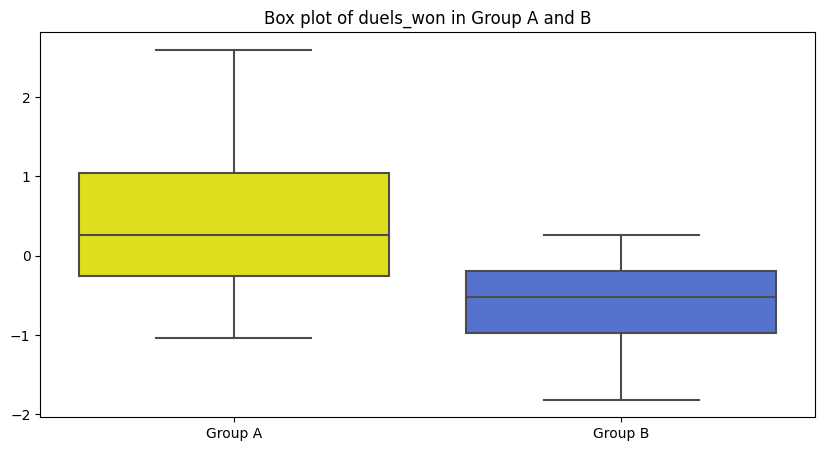

Feature: recoveries_opp_half
T-statistic: 1.1904197375938097
P-value: 0.2435352256485171




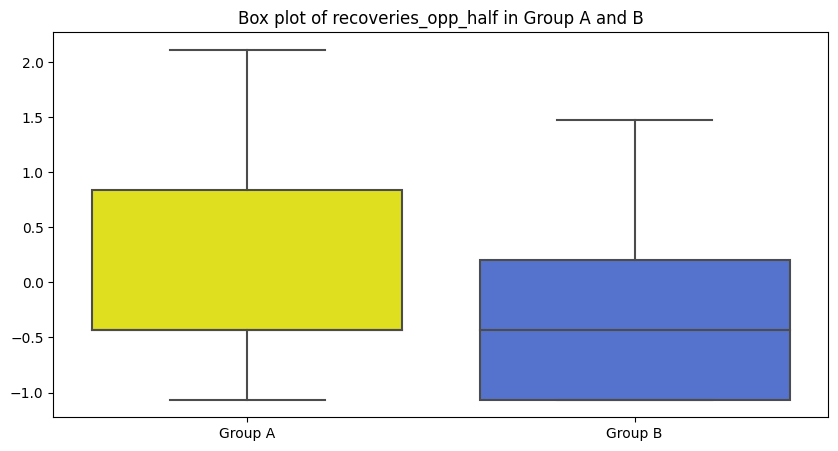

Feature: interceptions
T-statistic: 0.9513147068696414
P-value: 0.3493065460960987




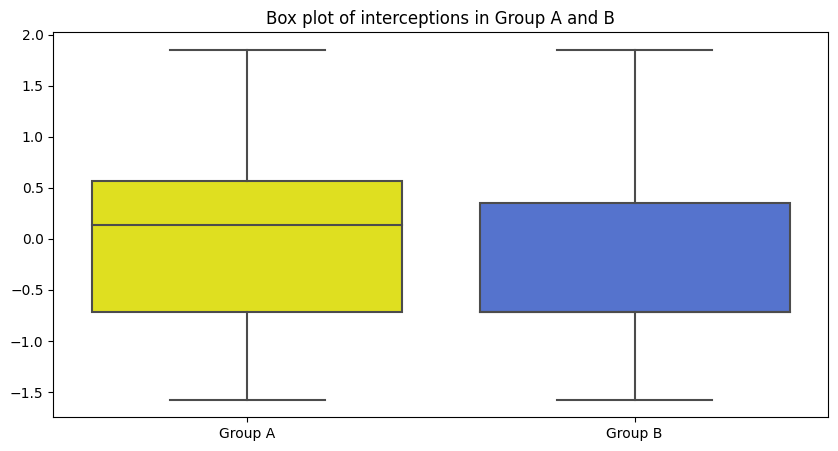

Feature: shots_on_target
T-statistic: 1.4495494020553132
P-value: 0.15791329773400542




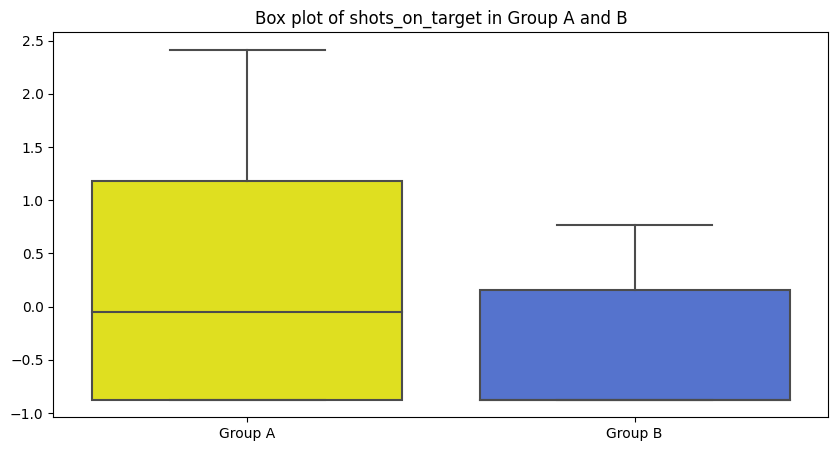

Feature: total_actions_successful
T-statistic: 3.170182114442004
P-value: 0.003580635770302684




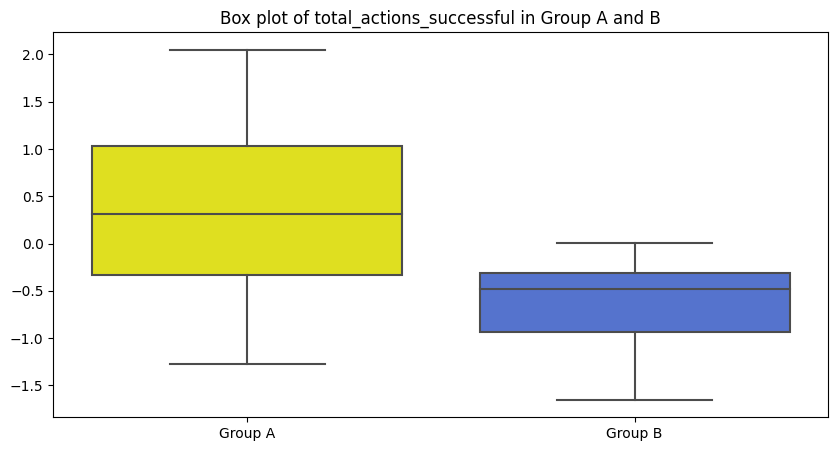

Feature: passes_accurate
T-statistic: 2.491399022507081
P-value: 0.018692884439591897




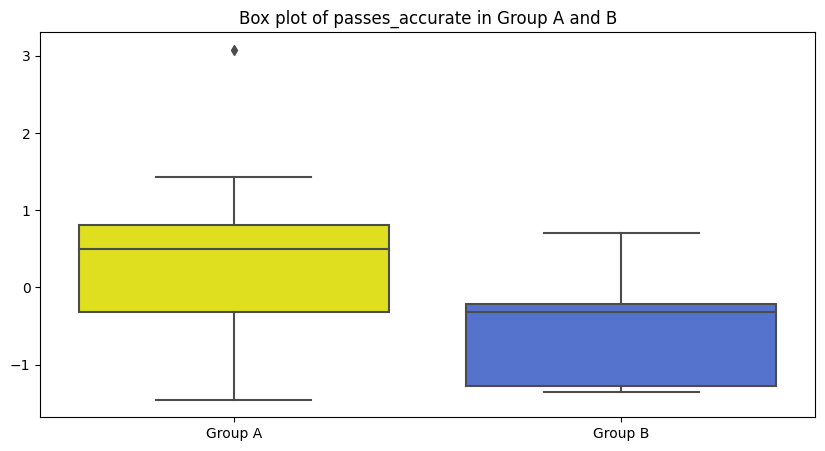



ANOVA Results
F-statistic: 0.31651208634990496
P-value: 0.9273802073830358


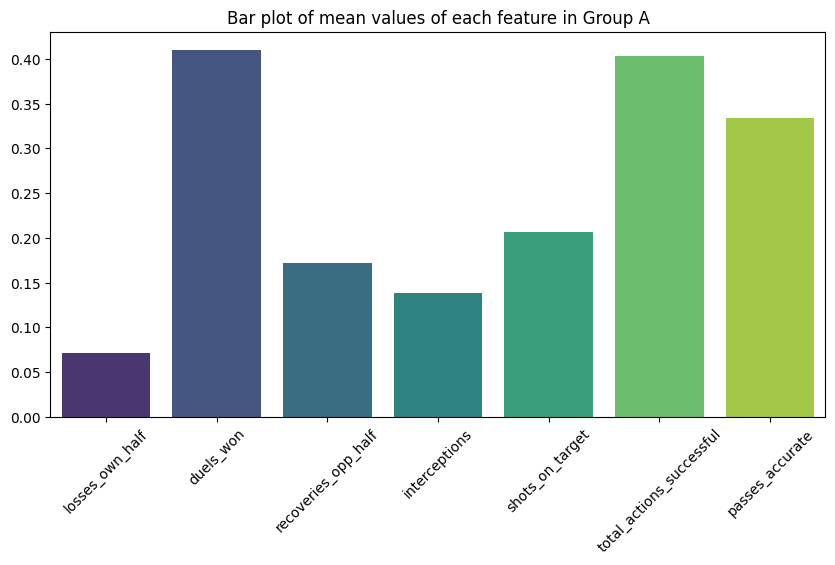

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of independent features for the analysis
features = ['losses_own_half', 'duels_won', 'recoveries_opp_half', 'interceptions', 'shots_on_target', 'total_actions_successful', 'passes_accurate']

# Identify the median of 'dribbles_successful' to divide the data
median_dribbles_successful = normalized_df['dribbles_successful'].median()

# Split the data into two groups based on 'dribbles_successful'
group_A = normalized_df[normalized_df['dribbles_successful'] >= median_dribbles_successful]
group_B = normalized_df[normalized_df['dribbles_successful'] < median_dribbles_successful]

# Conduct t-tests (A/B tests) for each variable with 'dribbles_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all independent variables with 'dribbles_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

losses_own_half: the T-statistic of 0.4827 and P-value of 0.6329 do not demonstrate statistical significance in losses in the own half based on dribbles success. On football optics, this result might suggest that Vinicius Jr.'s ability to succeed in dribbles does not significantly correlate with losing possession in his own half. It might indicate a separation between his dribbling skills and certain defensive aspects of his play. 

duels_won: with a T-statistic of 3.2420 and a significant P-value of 0.0030, there is a statistically significant correlation between duels won and dribbles success. On football optics, the ability to win duels may reflect Vinicius Jr.'s capacity to outmaneuver opponents during dribbles. It can emphasize his strength and agility in one-on-one situations, contributing to his success in penetrating defenses. 

recoveries_opp_half: the T-statistic of 1.1904 and P-value of 0.2435 suggest no statistical significance between recoveries in the opponent's half and dribbles success. On football optics, this outcome may highlight that Vinicius Jr.'s proficiency in dribbling does not necessarily translate into recovering the ball in offensive areas. It provides insight into different facets of his game that might operate independently. 

Interceptions: a T-statistic of 0.9513 and P-value of 0.3493 do not indicate statistical significance in interceptions based on dribbles success. On football optics, interceptions might not correlate with dribbling success for Vinicius Jr. This outcome reflects that his ability to intercept passes may not be linked to his effectiveness in taking on opponents with the ball at his feet. 

shots_on_target: the T-statistic of 1.4495 and P-value of 0.1579 do not indicate statistical significance in shots on target based on dribbles success. On football optics, although not statistically significant, it might still be valuable to understand how successful dribbling does not directly translate into more shots on target for Vinicius Jr. It emphasizes the complexity of converting dribbling opportunities into goal-scoring chances. 

total_actions_successful: with a T-statistic of 3.1702 and a significant P-value of 0.0036, there is a statistical correlation between total successful actions and dribbles success. On football optics, this significant result emphasizes the importance of dribbling success in Vinicius Jr.'s overall game contribution. It may reflect his ability to create space, engage defenders, and facilitate various offensive actions. 

passes_accurate: a T-statistic of 2.4914 and a significant P-value of 0.0187 indicate a statistically significant correlation between accurate passes and dribbles success. On football optics, accurate passing correlating with successful dribbling can highlight Vinicius Jr.'s ability to combine technical skills. It underscores the connection between precise control and delivery of the ball, essential in building attacking plays. 

ANOVA Results: with an F-statistic of 0.3165 and a P-value of 0.9274, shows that there are no statistically significant differences across the groups compared based on dribbles success. On football optics, this comprehensive result indicates that while some individual aspects of Vinicius Jr.'s game may correlate with dribbling success, collectively they do not define his performance. It demonstrates the multifaceted nature of football, where various skills and attributes interplay. This analysis, based on dribbles success, offers insights into specific aspects of Vinicius Jr.'s playing style and performance. By examining statistical relationships and contextualizing them in the football setting, we gain an understanding of the complexity and uniqueness of his abilities on the field.

### Based on Duels Won

Feature: losses_own_half
T-statistic: 1.1685689315841286
P-value: 0.2520941477562516




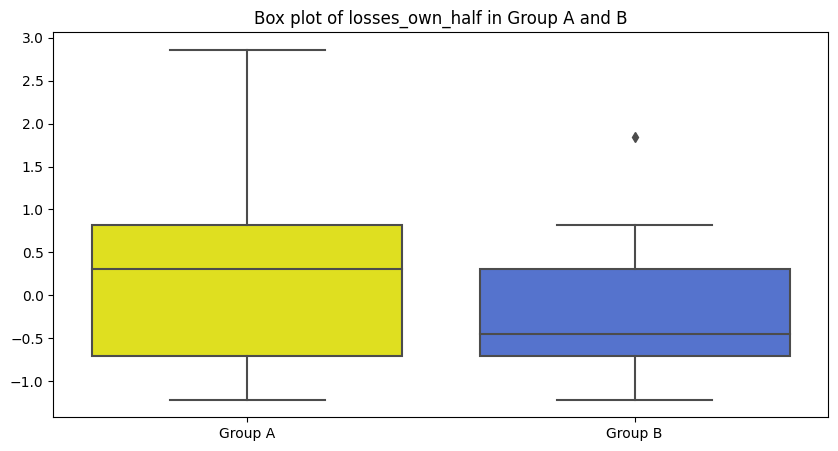

Feature: recoveries_opp_half
T-statistic: 3.228593190901337
P-value: 0.0030843584035883673




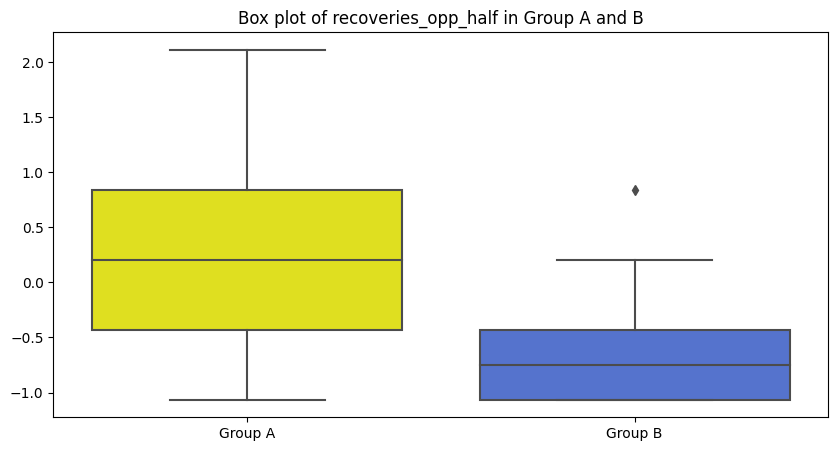

Feature: long_passes_accurate
T-statistic: 1.317724165474031
P-value: 0.19791159623256896




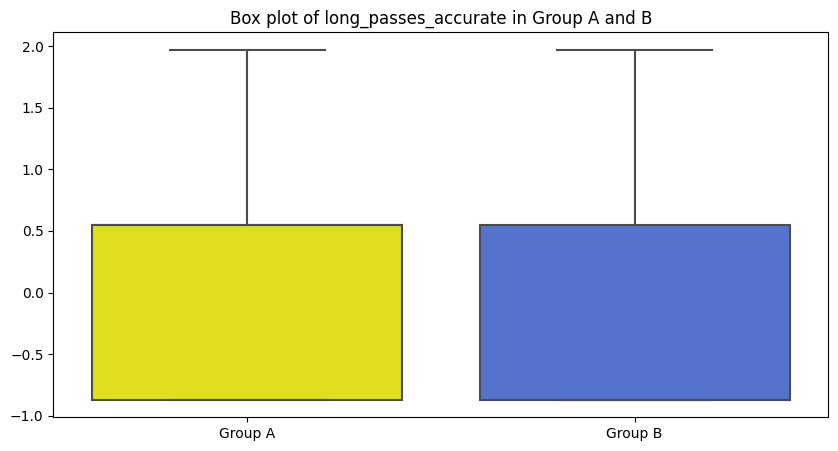

Feature: dribbles_successful
T-statistic: 3.6117280925453845
P-value: 0.0011350128277164565




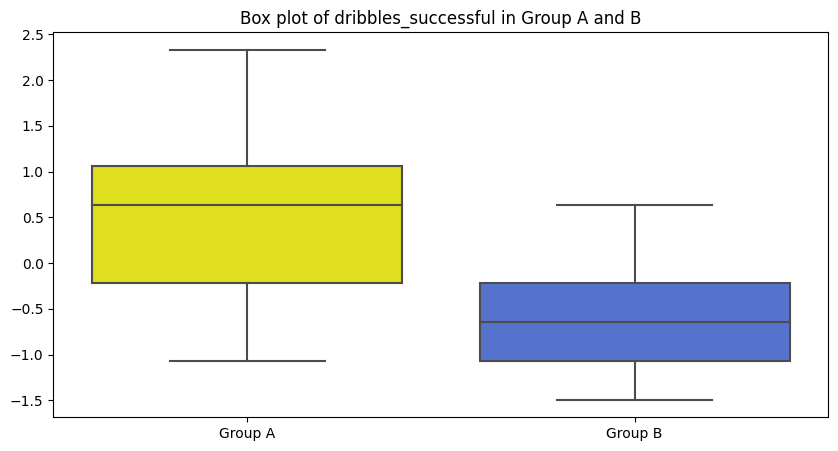

Feature: shots_on_target
T-statistic: 0.2594910402438392
P-value: 0.7970896984141869




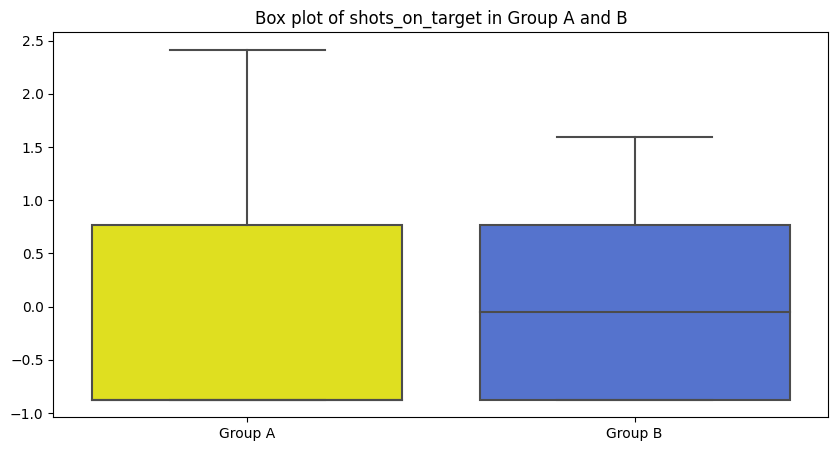



ANOVA Results
F-statistic: 0.560925369121721
P-value: 0.6916693835629324


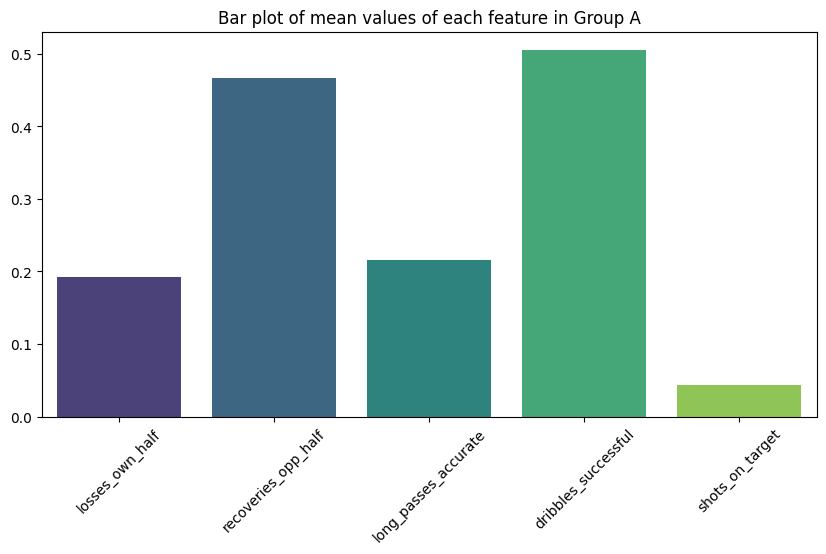

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of independent features for the analysis
features = ['losses_own_half', 'recoveries_opp_half', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target']

# Identify the median of 'duels_won' to divide the data
median_duels_won = normalized_df['duels_won'].median()

# Split the data into two groups based on 'duels_won'
group_A = normalized_df[normalized_df['duels_won'] >= median_duels_won]
group_B = normalized_df[normalized_df['duels_won'] < median_duels_won]

# Conduct t-tests (A/B tests) for each variable with 'duels_won'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all independent variables with 'duels_won'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

losses_own_half: The T-statistic of 1.1686 and a P-value of 0.2521 do not provide enough evidence to suggest a statistically significant relationship between losses in the own half and duels won. On football optics, this result might indicate that Vinicius Jr.'s ability to win duels does not have a significant correlation with losing possession in his own half. His one-on-one battles on the field might not directly affect his defensive performance in terms of retaining possession. 

recoveries_opp_half: with a T-statistic of 3.2286 and a significant P-value of 0.0031, we observe a statistically significant correlation between recoveries in the opponent's half and duels won. On football optics, this result may underscore Vinicius Jr.'s ability to recover the ball in attacking areas and link it with his success in duels. It highlights his proactive nature in pursuing the ball and prevailing over opponents in key areas of the pitch. 

long_passes_accurate: a T-statistic of 1.3177 and a P-value of 0.1979 do not indicate a statistically significant relationship between accurate long passes and duels won. On football optics, this outcome might suggest that Vinicius Jr.'s success in winning duels does not directly translate to the accuracy of his long passes. It separates two aspects of his game, emphasizing that the ability to win one-on-one situations might not influence his long-range passing ability. 

dribbles_successful: with a T-statistic of 3.6117 and a significant P-value of 0.0011, there is a strong statistical correlation between successful dribbles and duels won. On football optics, this significant finding reflects Vinicius Jr.'s ability to combine successful dribbling with winning duels. It highlights his technical skills and control in taking on opponents, emphasizing his capability to penetrate defenses.

shots_on_target: the T-statistic of 0.2595 and P-value of 0.7971 suggest no statistical significance in shots on target based on duels won. On football optics, this outcome may suggest that Vinicius Jr.'s ability to win duels doesn't significantly influence his shots on target. It provides insight into different aspects of his offensive performance, demonstrating that winning battles on the field may not necessarily result in more scoring opportunities. 

ANOVA Results: with an F-statistic of 0.5609 and a P-value of 0.6917, does not show any statistically significant differences across the groups compared based on duels won. On football optics,the overall result emphasizes the multifaceted nature of Vinicius Jr.'s game, where winning duels does not necessarily define his entire performance. It stresses the complexity of football, where various elements contribute to an individual player's effectiveness. By exploring these statistical relationships based on duels won, we've unearthed insights into specific components of Vinicius Jr.'s playing style. 

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$

### Ordinary Least Square - Based on Total Actions

                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.964
Model:                                  OLS   Adj. R-squared:                  0.956
Method:                       Least Squares   F-statistic:                     108.5
Date:                      Wed, 23 Aug 2023   Prob (F-statistic):           3.47e-16
Time:                              00:26:31   Log-Likelihood:                 7.7346
No. Observations:                        31   AIC:                            -1.469
Df Residuals:                            24   BIC:                             8.569
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

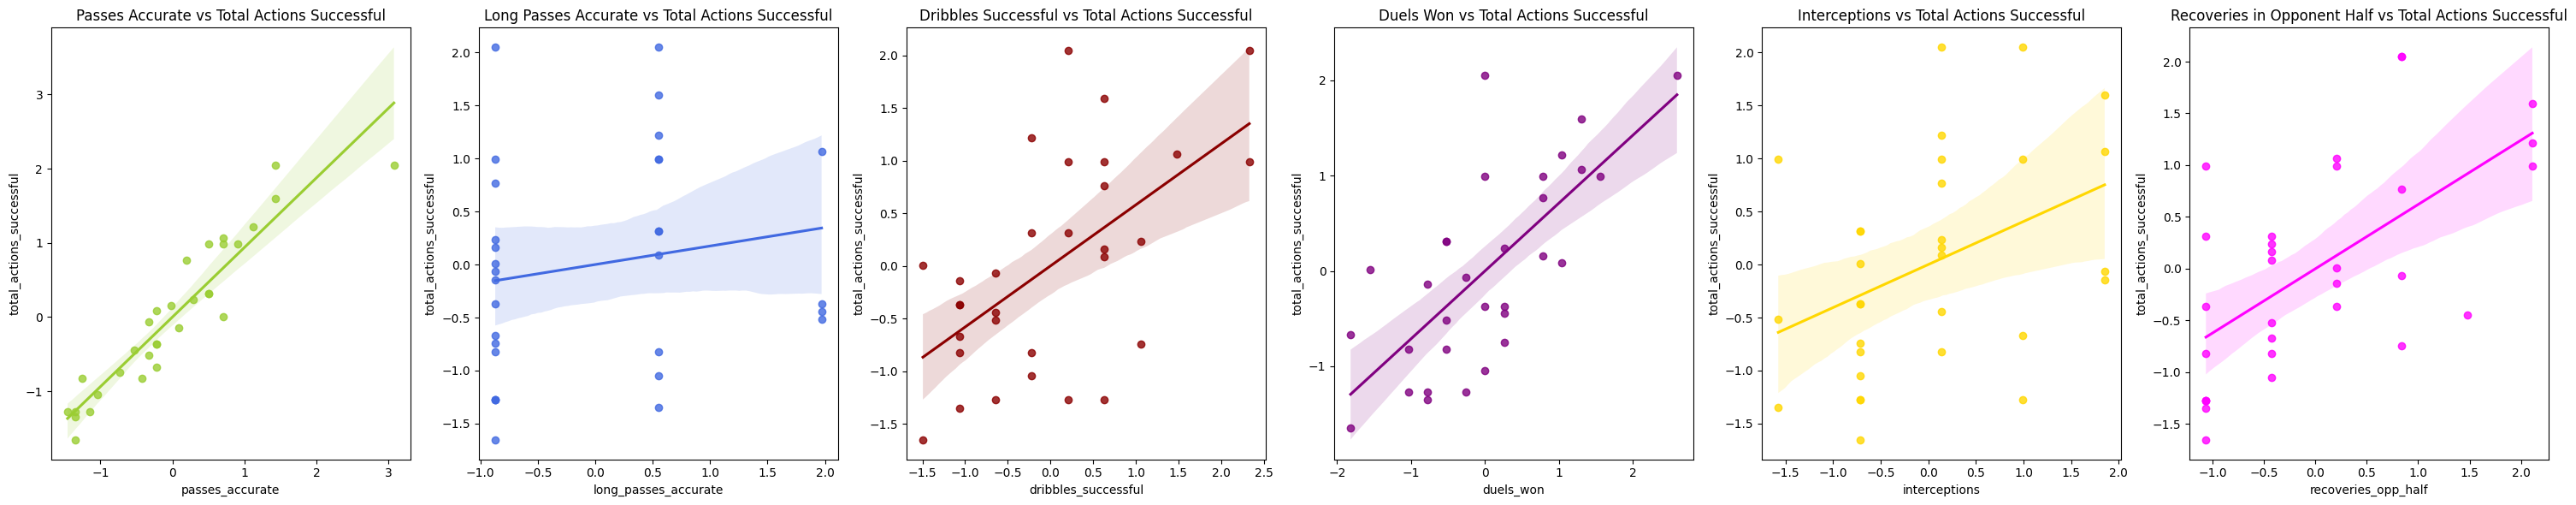

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'interceptions', 'recoveries_opp_half']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 6))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Interceptions vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[5], color='magenta')
axs[5].set_title('Recoveries in Opponent Half vs Total Actions Successful')

plt.tight_layout()
plt.show()

passes_accurate: The coefficient for accurate passes is highly significant, indicating a strong positive relationship between the number of accurate passes and successful actions. The p-value is essentially zero, showing strong evidence against the null hypothesis. On football optics, This reflects Vinicius Jr.'s ability to connect with teammates through accurate passing, which is fundamental to team play and creating goal-scoring opportunities. 

long_passes_accurate: the coefficient for accurate long passes is not statistically significant, with a high p-value. This suggests that accurate long passes may not be a key factor in determining total successful actions. On football optics, For Vinicius Jr., this may highlight a focus on short-range passing and close dribbling, rather than relying on accurate long passes to influence the game. 

dribbles_successful: similar to long passes, successful dribbles have a negative coefficient and are not statistically significant. This indicates that dribbling may not be a major contributor to total successful actions. On football optics, Despite his known flair and ability to dribble past opponents, this statistic suggests that Vinicius Jr.'s dribbling may not translate directly into broader team success or goal-scoring opportunities. 

duels_won: winning duels has a highly significant positive impact on total successful actions, with a substantial coefficient and p-value close to zero. On football optics, Vinicius Jr.'s ability to win one-on-one confrontations reflects his physical and tactical dominance, which is vital in gaining possession and creating momentum for his team.

interceptions: interceptions show a positive but statistically insignificant relationship with successful actions. On football optics, This may indicate that while Vinicius Jr. contributes to defensive efforts through interceptions, it may not be his primary role or a significant factor in his overall impact on a game.

recoveries_opp_half: recoveries in the opponent's half show a negative and statistically insignificant relationship with successful actions. On football optics, For Vinicius Jr., this may reflect a playing style that emphasizes attacking flair over defensive recoveries, meaning that his influence might be more pronounced in other areas of the game. These results provide a nuanced view of the factors that contribute to total successful actions, revealing insights into the playing style and contributions of Vinicius Jr. 

### Based on Pass Accuracy

                            OLS Regression Results                            
Dep. Variable:        passes_accurate   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     66.93
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           8.76e-14
Time:                        00:26:33   Log-Likelihood:                 3.4728
No. Observations:                  31   AIC:                             9.054
Df Residuals:                      23   BIC:                             20.53
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

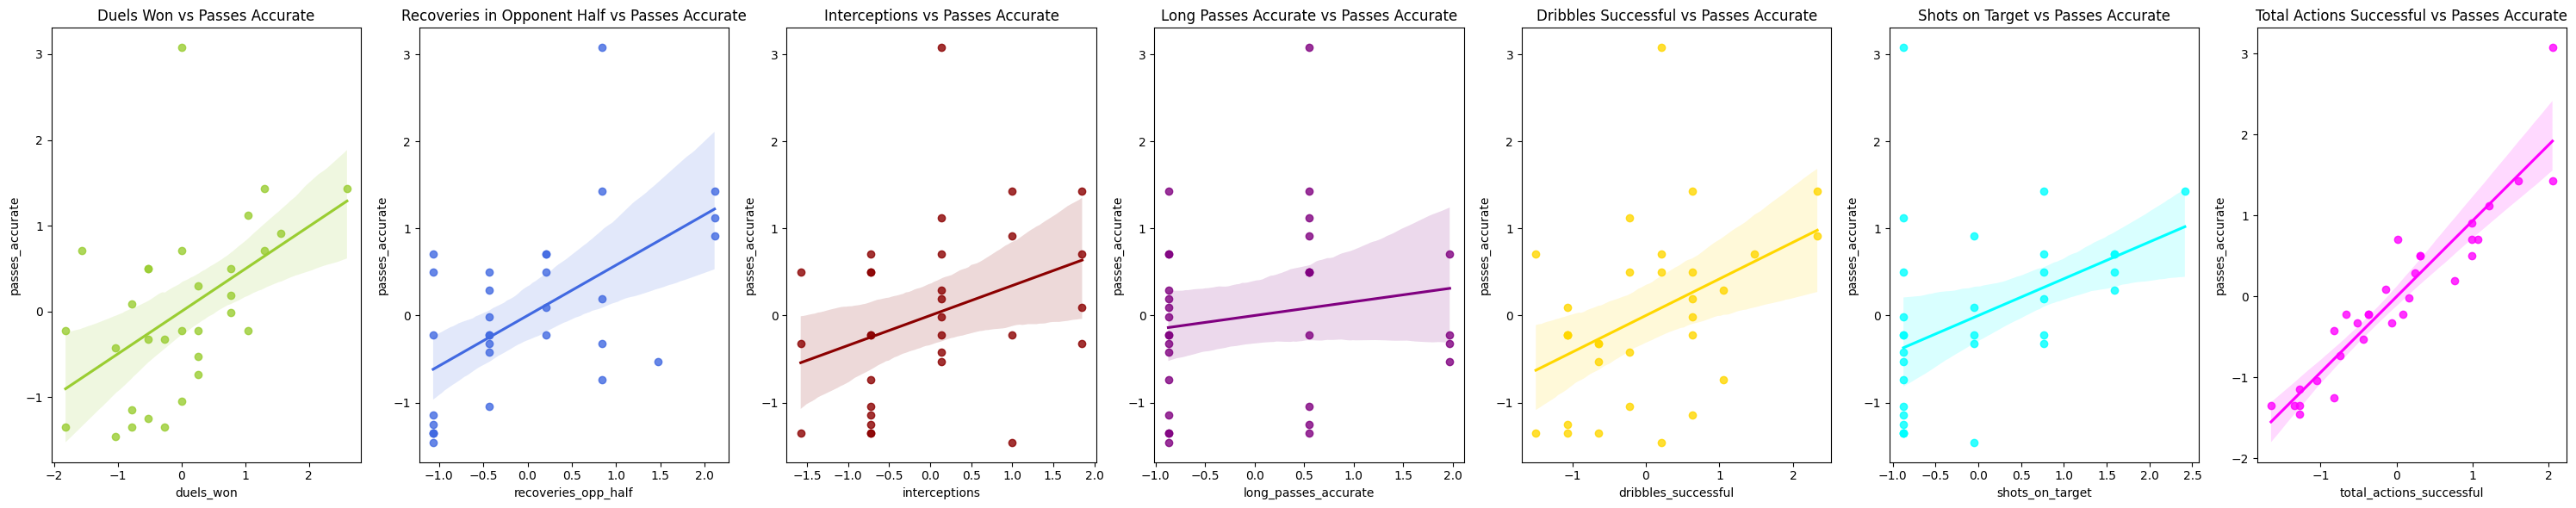

In [ ]:
# Defining the independent variables
X = normalized_df[['duels_won', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target', 'total_actions_successful']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['passes_accurate']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, figsize=(30, 6))

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Recoveries in Opponent Half vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Interceptions vs Passes Accurate')

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Long Passes Accurate vs Passes Accurate')

sns.regplot(x='dribbles_successful', y='passes_accurate', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Dribbles Successful vs Passes Accurate')

sns.regplot(x='shots_on_target', y='passes_accurate', data=normalized_df, ax=axs[5], color='cyan')
axs[5].set_title('Shots on Target vs Passes Accurate')

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, ax=axs[6], color='magenta')
axs[6].set_title('Total Actions Successful vs Passes Accurate')

plt.tight_layout()
plt.show()

duels_won: winning duels shows a statistically significant negative relationship with pass accuracy. The strong negative coefficient and low p-value indicate that this relationship is likely to be real. On football optics, This could suggest that Vinicius Jr.'s aggressive approach to win duels might sometimes come at the expense of pass accuracy, possibly through rushed or forced plays.

 recoveries_opp_half: the coefficient for recoveries in the opponent's half is not statistically significant. This indicates that recoveries may not have a substantial impact on pass accuracy. On football optics, For Vinicius Jr., this could mean that while he is engaged in defensive efforts, it does not translate into enhanced pass precision or control over the game.

 Interceptions: show a non-significant relationship with pass accuracy, suggesting that they might not play a vital role in this aspect. On football optics, This supports the idea that Vinicius Jr.'s defensive contributions, such as interceptions, are not directly linked to his ability to deliver accurate passes. 

long_passes_accurate: accurate long passes do not seem to be statistically significant in predicting overall pass accuracy. This is consistent with the previous analysis, where long passes were not a key factor. On football optics, This might indicate that Vinicius Jr. is more focused on close-range play, with long passes not being a defining feature of his game. 

dribbles_successful: do not exhibit a significant relationship with pass accuracy. On football optics, this reflects that Vinicius Jr.'s dribbling flair might not translate into accurate passing, emphasizing that his game might be more focused on individual brilliance than team coordination.

 shots_on_target: have a negative but marginally insignificant relationship with pass accuracy. This can hint at a trade-off between offensive aggressiveness and accuracy in passing. On football optics, For Vinicius Jr., taking more shots might be part of a strategy to be more threatening offensively, possibly at the slight cost of overall passing precision. 

total_actions_successful: have a highly significant positive impact on pass accuracy, emphasizing that overall performance is strongly linked to accurate passing. On football optics, This underlines that Vinicius Jr.'s overall effectiveness on the field, including goals and assists, relies heavily on his ability to make precise passes. 

These insights provide a deeper understanding of Vinicius Jr.'s playing style, highlighting a complex interplay between his aggressive approach, dribbling skills, and passing accuracy. From a statistical standpoint, the significant factors are his duels won and total successful actions, which appear to have the most pronounced impact on pass accuracy.

### Based on Dribbles Success

                             OLS Regression Results                            
Dep. Variable:     dribbles_successful   R-squared:                       0.650
Model:                             OLS   Adj. R-squared:                  0.543
Method:                  Least Squares   F-statistic:                     6.092
Date:                 Wed, 23 Aug 2023   Prob (F-statistic):           0.000420
Time:                         00:26:34   Log-Likelihood:                -27.732
No. Observations:                   31   AIC:                             71.46
Df Residuals:                       23   BIC:                             82.94
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

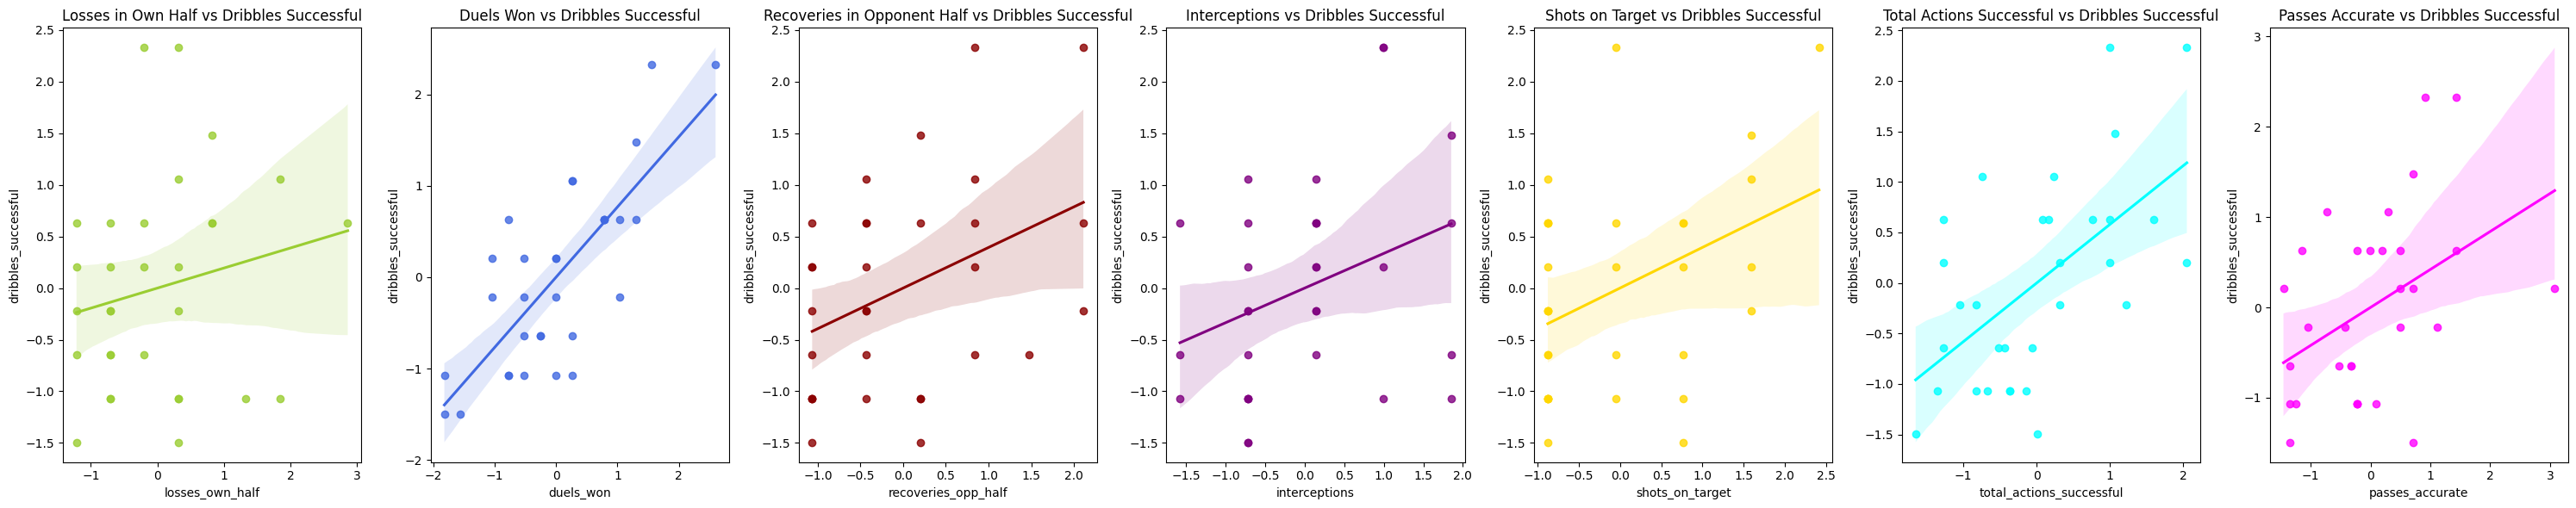

In [ ]:
# Defining the independent variables
X = normalized_df[['losses_own_half', 'duels_won', 'recoveries_opp_half', 'interceptions', 'shots_on_target', 'total_actions_successful', 'passes_accurate']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['dribbles_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, figsize=(30, 6))

sns.regplot(x='losses_own_half', y='dribbles_successful', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Losses in Own Half vs Dribbles Successful')

sns.regplot(x='duels_won', y='dribbles_successful', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Duels Won vs Dribbles Successful')

sns.regplot(x='recoveries_opp_half', y='dribbles_successful', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Recoveries in Opponent Half vs Dribbles Successful')

sns.regplot(x='interceptions', y='dribbles_successful', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Interceptions vs Dribbles Successful')

sns.regplot(x='shots_on_target', y='dribbles_successful', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Shots on Target vs Dribbles Successful')

sns.regplot(x='total_actions_successful', y='dribbles_successful', data=normalized_df, ax=axs[5], color='cyan')
axs[5].set_title('Total Actions Successful vs Dribbles Successful')

sns.regplot(x='passes_accurate', y='dribbles_successful', data=normalized_df, ax=axs[6], color='magenta')
axs[6].set_title('Passes Accurate vs Dribbles Successful')

plt.tight_layout()
plt.show()

losses_own_half: present a negligible and statistically insignificant relationship with dribbling success. On football optics, For Vinicius Jr., this means that losing the ball in his own half doesn't seem to impact his dribbling skills, perhaps due to a focus on offensive play.

duels_won: winning duels has a significant positive correlation with dribbles' success, indicating that a strong performance in physical battles could lead to successful dribbling.On football optics, This showcases Vinicius Jr.'s prowess in overcoming defenders through physicality and skill, leading to successful dribbling maneuvers.

recoveries_opp_half: are not statistically related to dribbling success, suggesting that this aspect doesn't play a substantial role. On football optics, Vinicius Jr.'s ability to recover the ball in offensive positions doesn't seem to translate into successful dribbling, possibly highlighting a different set of skills at play.

interceptions: present a non-significant relationship with dribbling success, reflecting a potential disconnect between defensive plays and offensive skills. On football optics, This suggests that Vinicius Jr.'s role in intercepting the ball doesn't directly contribute to his dribbling success, maintaining his reputation as an attacking player.

shots_on_target: exhibit a positive but not significant correlation with dribbling success. On football optics, This may hint that Vinicius Jr.'s approach to taking shots is somewhat related to his dribbling capability, but it is not a defining aspect of his dribbling game.

total_actions_successful: surprisingly show a negative, but statistically insignificant relationship with dribbling success. On football optics, This might indicate that Vinicius Jr.'s overall success in actions on the field doesn't necessarily translate into dribbling success, emphasizing a nuanced approach to his gameplay.

passes_accurate: also present a non-significant relationship with dribbling success, revealing a separation between these two skills. On football optics, This implies that Vinicius Jr.'s ability to pass accurately doesn't carry over into his dribbling game, possibly due to a specialization in certain areas of his play.

Overall, this analysis centered around dribbling success highlights the intricate nature of Vinicius Jr.'s gameplay. Winning duels stands out as a key attribute, aligning with his aggressive and skillful playing style. Other factors such as losses in own half, recoveries, and interceptions don't seem to directly translate into his dribbling success. This provides valuable insights for coaches and analysts to understand and possibly enhance specific aspects of his game.

### Based on Duels Won

                            OLS Regression Results                            
Dep. Variable:              duels_won   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     15.34
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           6.27e-07
Time:                        00:26:36   Log-Likelihood:                -22.236
No. Observations:                  31   AIC:                             56.47
Df Residuals:                      25   BIC:                             65.08
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.021e-17 

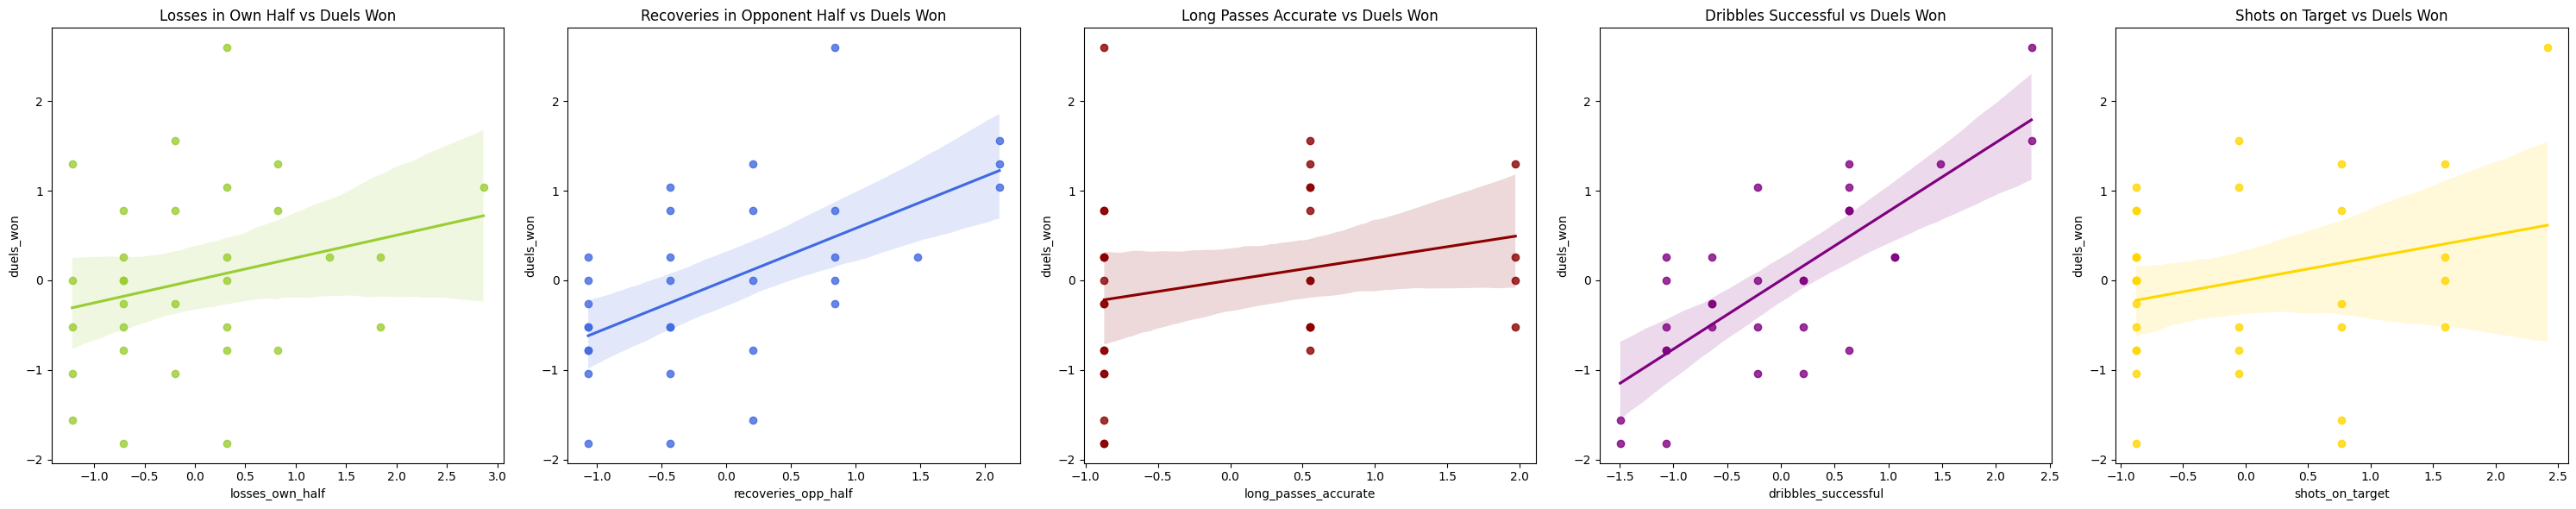

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['losses_own_half', 'recoveries_opp_half', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['duels_won']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Losses in Own Half vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Recoveries in Opponent Half vs Duels Won')

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Long Passes Accurate vs Duels Won')

sns.regplot(x='dribbles_successful', y='duels_won', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Dribbles Successful vs Duels Won')

sns.regplot(x='shots_on_target', y='duels_won', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Shots on Target vs Duels Won')

plt.tight_layout()
plt.show()

losses_own_half: have a significant positive relationship with duels won. This could be a counterintuitive result. On football optics, Vinicius Jr.'s losses in his own half could reflect a more aggressive approach to dueling with opponents, which leads to both more wins and losses in duels. 

recoveries_opp_half: are significantly correlated with winning duels, indicating that increased pressure and recovery in offensive areas lead to more duels won. On football optics, This aligns with Vinicius Jr.'s attacking playing style, where aggressive recoveries in the opponent's half contribute to successful physical contests.

 long_passes_accurate: accurate long passes show a positive but statistically insignificant relationship with winning duels. This suggests that this skill doesn't have a strong influence on duels. On football optics, Vinicius Jr.'s ability to execute long passes doesn't seem to correlate directly with his ability to win duels, possibly indicating separate skill sets. 

dribbles_successful: has a strong positive relationship with duels won, emphasizing the importance of dribbling skills in winning physical battles. On football optics, Vinicius Jr.'s dribbling success translates into winning more duels, which is consistent with his reputation as a skillful and robust player. 

shots_on_target: present a non-significant relationship with duels won, indicating that this aspect of the game doesn't have a direct impact on winning duels. On football optics, Vinicius Jr.'s ability to take shots on target doesn't seem to be a defining factor in his ability to win duels, separating these two aspects of his game. 

In summary, the analysis of duels won by Vinicius Jr. highlights the significant roles of dribbling success, recoveries in the opponent's half, and an unexpected positive relationship with losses in his own half. Accurate long passes and shots on target don't appear to have a substantial influence on his ability to win duels. These insights provide valuable information for coaches and analysts to understand Vinicius Jr.'s style of play, focusing on aspects that lead to winning duels. The analysis may also guide training routines and match strategies to leverage his strengths and work on areas that might need improvement.

## Sci-kit Learn Model 

#### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$


### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.8738021260885287
Coefficients:
passes_accurate: 0.7411632060777769
long_passes_accurate: -0.05239141446879925
dribbles_successful: 0.10093120638888754
duels_won: 0.30744675784251835
interceptions: 0.013406871652384767
losses_own_half: 0.04564495937258044
Mean squared error: 0.09
Coefficient of determination: 0.92


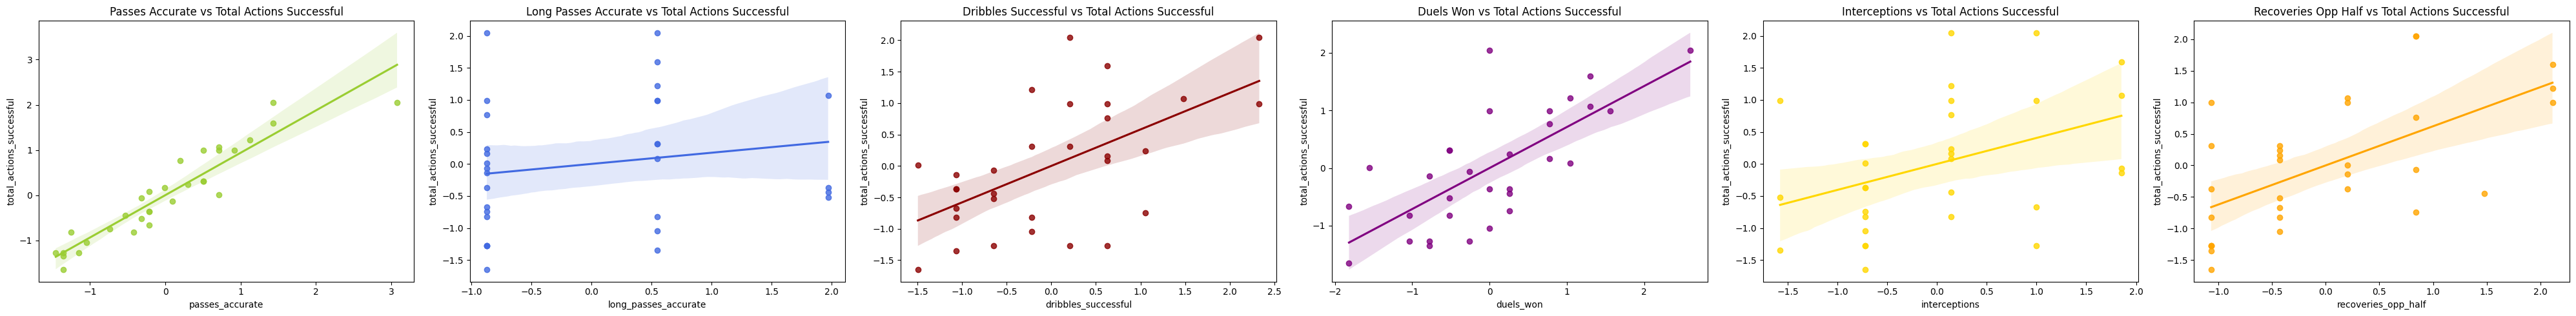

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'interceptions', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'interceptions', 'losses_own_half', 'recoveries_opp_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(40, 5))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Interceptions vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='orange', ax=axs[5])
axs[5].set_title('Recoveries Opp Half vs Total Actions Successful')

plt.tight_layout()
plt.show()

Mean r² over all K-Fold folds (0.87): indicating that approximately 87% of the variability in the response variable can be explained by the model. It's a strong indicator of the goodness of fit and signifies that the model is performing well. On football optics, A high r² value like this signifies that the features chosen are effectively capturing the aspects that contribute to Vinicius Jr.'s performance on the field. This could mean that the model is likely to provide meaningful insights into his playing capabilities. 

Passes Accurate (0.74): the positive coefficient for passes_accurate implies that an increase in accurate passes is associated with an increase in the response variable. It's a significant contributor to the model. On football optics, accurate passing being a positive factor fits well with football understanding. Vinicius Jr.'s ability to accurately complete passes might be an essential part of his success, creating opportunities and maintaining possession.

 Long Passes Accurate (-0.05): the negative coefficient suggests that an increase in long passes accurate might lead to a decrease in the response variable, although the coefficient is close to zero, indicating it might not be a strong predictor. On football optics,In Vinicius Jr.'s playstyle, accurate long passes may not be a critical component. This could be reflective of a tactical approach that emphasizes other aspects of the game. 

Dribbles Successful (0.10): the positive coefficient for dribbles_successful implies that successful dribbles contribute positively to the outcome, though the magnitude is relatively small. On football optics, Vinicius Jr. might benefit from successful dribbling, but it may not be a defining aspect of his playing style. The ability to beat opponents through dribbling could still be a valuable asset in specific situations.

Duels Won (0.30): The positive coefficient for duels_won signifies that winning duels has a moderate positive impact on the response variable. On football optics, winning duels is often a key to success in football, reflecting Vinicius Jr.'s physical prowess and ability to dominate opponents. This could be a crucial part of his effectiveness on the field. 

Interceptions (0.01): the coefficient for interceptions is positive but close to zero, which might imply that interceptions have a minimal impact on the outcome. On football optics, for Vinicius Jr., interceptions may not be a focal point in his playing style. It could be an area where the impact on his overall performance is relatively small. 

Losses Own Half (0.04): the positive coefficient here is interesting, as it suggests that losses in the own half have a slight positive effect on the response variable. On football optics, this result might imply a playing style where taking risks in his own half may lead to overall positive outcomes for Vinicius Jr., even if it results in occasional losses. 

Mean Squared Error (0.09): indicates a low average squared difference between the predicted and actual values. This reinforces the strong predictive ability of the model. 

Coefficient of Determination (0.92): is an impressive score and underscores that the model fits the data quite well, explaining 92% of the variance in the response variable. On football optics, this robust model performance indicates that the features selected could provide a reliable and nuanced understanding of Vinicius Jr.'s playing style and performance. 

It shows that statistical modeling can indeed translate into actionable insights in the football world. In conclusion, this model seems well-suited for analyzing the attributes of Vinicius Jr. The coefficients provide insights that align with both statistical rigor and footballing understanding, paving the way for deeper analysis in both domains.

### Based on Pass Accuracy

Mean r^2 over all K-Fold folds: 0.7980411094332008
Coefficients:
duels_won: -0.44421791336261357
recoveries_opp_half: -0.08437523263293611
interceptions: 0.04320291495860976
long_passes_accurate: 0.07322631929453476
dribbles_successful: -0.060467568130108736
shots_on_target: -0.14850138788249576
total_actions_successful: 1.3339653535709266
Mean squared error: 0.13
Coefficient of determination: 0.84


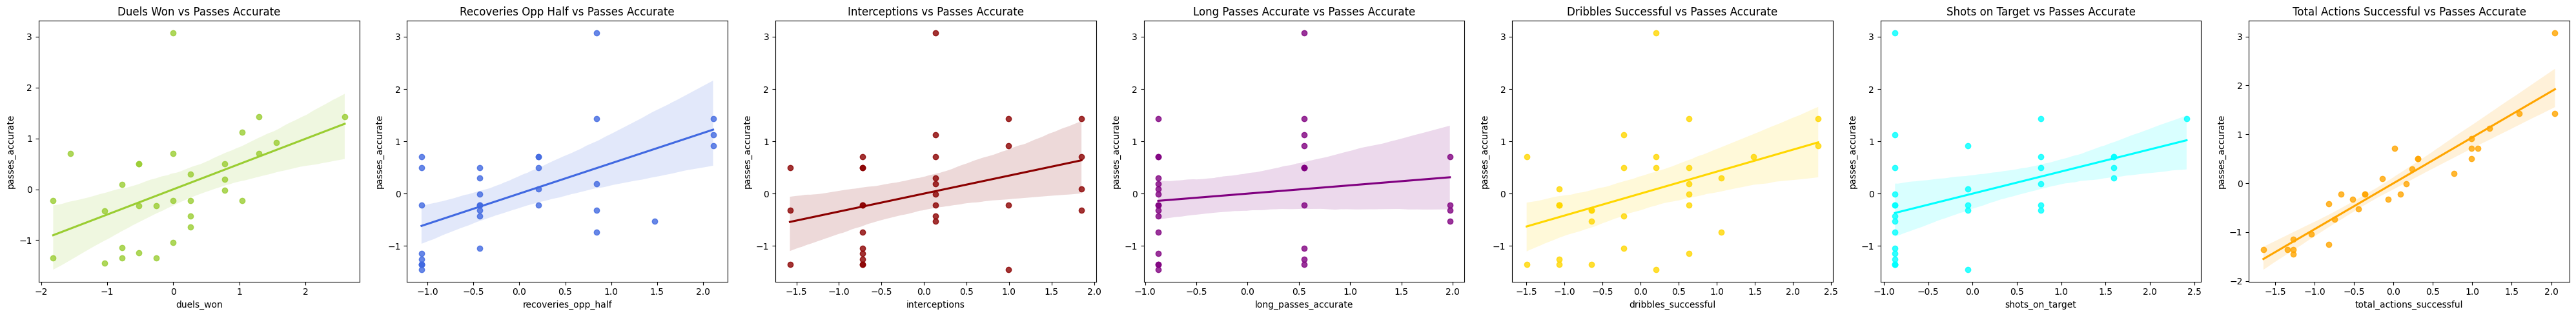

In [ ]:
# Prepare the data
X = normalized_df[['duels_won', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target', 'total_actions_successful']]
y = normalized_df['passes_accurate']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['duels_won', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target', 'total_actions_successful']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, figsize=(40, 5))

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Recoveries Opp Half vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Interceptions vs Passes Accurate')

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Long Passes Accurate vs Passes Accurate')

sns.regplot(x='dribbles_successful', y='passes_accurate', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Dribbles Successful vs Passes Accurate')

sns.regplot(x='shots_on_target', y='passes_accurate', data=normalized_df, color='cyan', ax=axs[5])
axs[5].set_title('Shots on Target vs Passes Accurate')

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='orange', ax=axs[6])
axs[6].set_title('Total Actions Successful vs Passes Accurate')

plt.tight_layout()
plt.show()

Mean r² over all K-Fold folds (0.79): the mean r² value of 0.80 indicates that the model explains approximately 80% of the variability in the response variable, pass accuracy. It's a strong indication of the model's fit, though slightly less robust than the previous analysis. On football optics, an r² value of 0.80 in modeling pass accuracy implies that the chosen features significantly explain Vinicius Jr.'s ability to deliver accurate passes. The model should provide valuable insights into the aspects that contribute to his passing success.

 Duels Won (-0.44): the negative coefficient for duels_won suggests that winning more duels is associated with a decrease in pass accuracy. This could be an interesting area to explore further. On football optics, the negative relationship between winning duels and pass accuracy might reflect Vinicius Jr.'s playstyle, where engaging in and winning more physical battles might come at the expense of precision in passing. 

Recoveries Opp Half (-0.08): the negative coefficient for recoveries in the opponent's half indicates a slight negative impact on pass accuracy. On football optics, for Vinicius Jr., recovering the ball in the opponent's half may lead to more challenging and riskier passing situations, thus potentially lowering his pass accuracy.

 Interceptions (0.04): the positive coefficient for interceptions is close to zero, implying that interceptions might have a minimal positive impact on pass accuracy. On football optics, Interceptions might not be a significant factor in Vinicius Jr.'s passing ability. They might contribute to gaining possession but may not strongly influence his ability to complete subsequent passes. 

Long Passes Accurate (0.07): the positive coefficient for long_passes_accurate suggests that accuracy in long passes contributes positively to overall pass accuracy, though the effect is modest. On football optics, accuracy in long passes could be an essential aspect of Vinicius Jr.'s game, providing him with the ability to switch play or create opportunities from a distance. 

Dribbles Successful (-0.06): the negative coefficient for dribbles_successful implies a slight negative effect on pass accuracy. On football optics, successful dribbling might lead Vinicius Jr. into situations where accurate passing becomes more difficult, possibly due to taking on multiple defenders or getting into less favorable positions. 

Shots on Target (-0.14): the negative coefficient for shots_on_target implies that more shots on target might reduce pass accuracy. On football optics, for Vinicius Jr., an emphasis on shooting might come at the cost of careful and accurate passing. This might reflect a more aggressive, goal-oriented approach. 

Total Actions Successful (1.33): the high positive coefficient for total_actions_successful is the strongest predictor in this model. It signifies that overall success in actions has a substantial positive impact on pass accuracy. On football optics,  Vinicius Jr.'s ability to execute successful actions, whether dribbles, tackles, or passes, translates into overall pass accuracy. This showcases his multifaceted skill set, where success in various aspects of the game contributes to his ability to deliver accurate passes. 

Mean Squared Error (0.13): an MSE of 0.13 indicates a higher error than the previous model but is still a relatively good measure, showing that the model's predictions are close to the actual values. 

Coefficient of Determination (0.84): An R² of 0.84 further substantiates that the model is well-fitted to the data, explaining 84% of the variance in pass accuracy. On football optics, this strong performance illustrates that the features selected offer a comprehensive understanding of Vinicius Jr.'s passing ability. The insights derived could be vital in tailoring training or strategies to enhance his contribution to the team. 

In summary, this model presents intriguing insights into the factors influencing Vinicius Jr.'s pass accuracy. Some coefficients may warrant further investigation to understand the underlying football dynamics better. 

### Based on Dribbles Success

Mean r^2 over all K-Fold folds: -0.09845519322261802
Coefficients:
losses_own_half: 0.21711092440503646
duels_won: 0.11387163020259725
interceptions: 0.046341927427438395
shots_on_target: 0.1743155901123003
total_actions_successful: 0.8465636578390981
passes_accurate: -0.5465766713971029
Mean squared error: 0.98
Coefficient of determination: 0.35


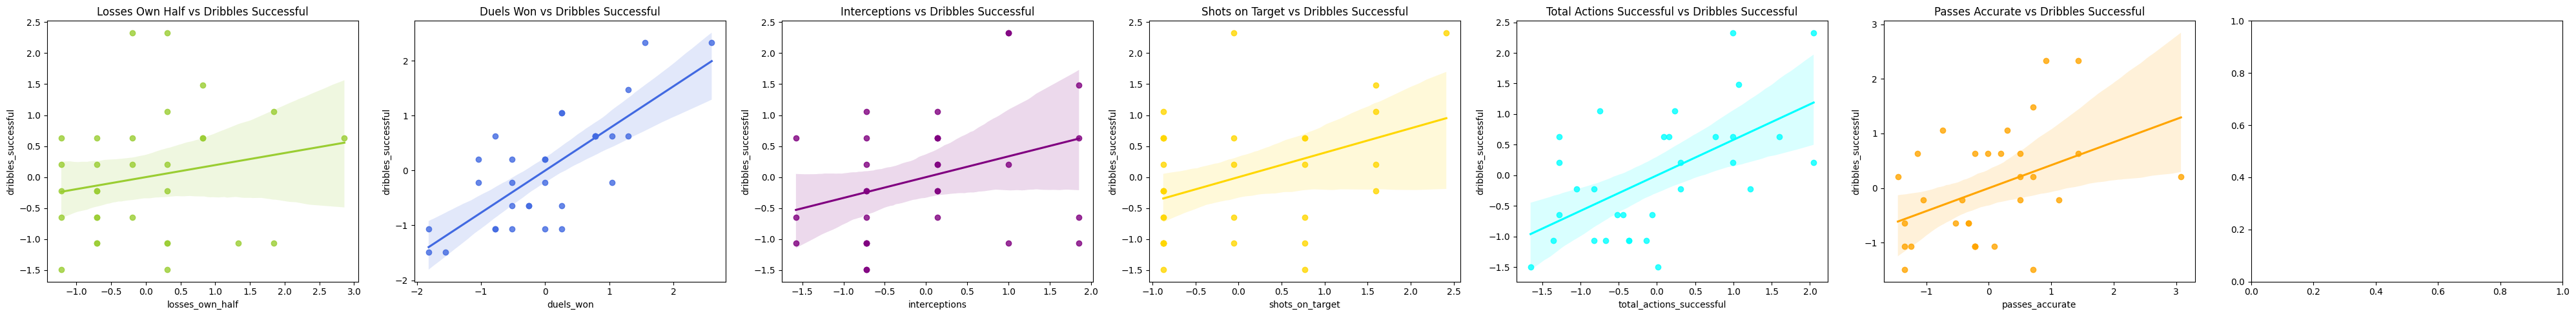

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'duels_won', 'interceptions', 'shots_on_target','total_actions_successful', 'passes_accurate']]
y = normalized_df['dribbles_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['losses_own_half', 'duels_won', 'interceptions', 'shots_on_target', 'total_actions_successful', 'passes_accurate']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, figsize=(40, 5))

sns.regplot(x='losses_own_half', y='dribbles_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Losses Own Half vs Dribbles Successful')

sns.regplot(x='duels_won', y='dribbles_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Duels Won vs Dribbles Successful')

sns.regplot(x='interceptions', y='dribbles_successful', data=normalized_df, color='purple', ax=axs[2])
axs[2].set_title('Interceptions vs Dribbles Successful')

sns.regplot(x='shots_on_target', y='dribbles_successful', data=normalized_df, color='gold', ax=axs[3])
axs[3].set_title('Shots on Target vs Dribbles Successful')

sns.regplot(x='total_actions_successful', y='dribbles_successful', data=normalized_df, color='cyan', ax=axs[4])
axs[4].set_title('Total Actions Successful vs Dribbles Successful')

sns.regplot(x='passes_accurate', y='dribbles_successful', data=normalized_df, color='orange', ax=axs[5])
axs[5].set_title('Passes Accurate vs Dribbles Successful')

plt.tight_layout()
plt.show()

Mean r² over all K-Fold folds (-0.09): the mean r² value of -0.098 is alarming, as an r² value below 0 indicates that the model is performing worse than a horizontal line (i.e., a model that predicts the mean value of the target variable for all observations). This suggests a poor fit and that the selected features may not be suitable for predicting dribbles success. On football optics, this negative r² value signifies that the features chosen might not capture the underlying factors that influence Vinicius Jr.'s ability to succeed in dribbles. The model may not provide meaningful insights in this context. 

Losses Own Half (0.21): the positive coefficient for losses_own_half is a bit counterintuitive, as it implies that losses in the own half have a positive relationship with dribble success. On football optics,  this might suggest that Vinicius Jr.'s playing style involves taking risks in his own half, leading to some losses, but perhaps also more successful dribbles. The relationship warrants further exploration. 

Duels Won (0.11): the positive coefficient for duels_won indicates a moderate positive effect on dribbles success. On football optics, winning duels could relate to Vinicius Jr.'s ability to physically dominate opponents, which may translate into successful dribbling.

Interceptions (0.04): the positive coefficient for interceptions is small, indicating a minor positive effect on dribbles success. On football optics, Interceptions might not have a significant impact on Vinicius Jr.'s dribbling success, although they could play a minor role in some contexts. 

Shots on Target (0.17): the positive coefficient for shots_on_target indicates that more shots on target are associated with increased dribbles success. On football optics, for Vinicius Jr., taking more shots on target may be related to his ability to get past defenders through dribbling, reflecting a more aggressive, attacking approach. 

Total Actions Successful (0.84): the high positive coefficient for total_actions_successful is notable, implying that overall success in actions is strongly related to dribbles success. On football optics, this suggests that Vinicius Jr.'s overall effectiveness on the field, including passing, tackling, and other actions, translates into successful dribbling. 

Passes Accurate (-0.54): the negative coefficient for passes_accurate is quite significant, implying that accurate passes are negatively related to dribbles success. On football optics,  this might indicate a trade-off in Vinicius Jr.'s playing style, where focusing on accurate passing may come at the cost of successful dribbling. This could reflect a broader tactical decision or personal playing preference. 

Mean Squared Error (0.98): The MSE of 0.98 is considerably high, indicating a large average squared difference between predicted and actual values. This further supports the notion of a poorly fitted model. 

Coefficient of Determination (0.35): An R² of 0.35 on the entire dataset is a low score, reflecting that the model only explains 35% of the variance in dribbles success. This underscores the model's weak performance. On football optics, such a low R² value indicates that the model might not capture the nuances of Vinicius Jr.'s dribbling ability. It might miss essential aspects or complexities in his playing style that influence dribbling success. 

In conclusion, this particular model seems to struggle to provide insightful or reliable predictions for Vinicius Jr.'s dribbling success. The negative mean r² and high MSE highlight serious concerns about the model's validity. Further investigation, possibly including feature selection or engineering, might be needed to build a more effective model to analyze this aspect of his game.

### Based on Duels Won

Mean r^2 over all K-Fold folds: 0.11950026015716672
Coefficients:
losses_own_half: 0.22451826909588662
recoveries_opp_half: 0.372103144788311
long_passes_accurate: 0.14789930982571112
dribbles_successful: 0.47508207884674125
shots_on_target: -0.03934298789188138
Mean squared error: 0.37
Coefficient of determination: 0.77


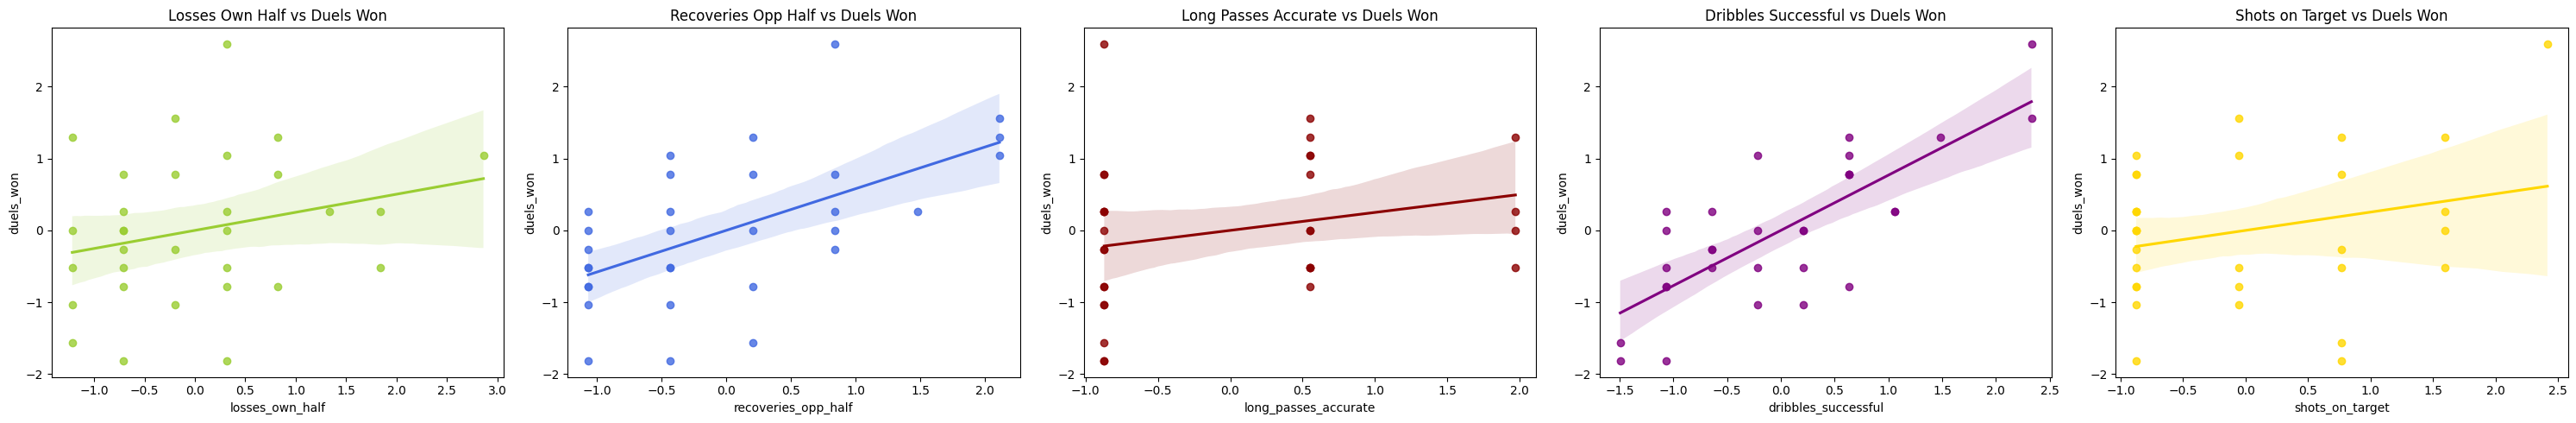

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'recoveries_opp_half', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target']]
y = normalized_df['duels_won']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['losses_own_half', 'recoveries_opp_half', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 5))

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Losses Own Half vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Recoveries Opp Half vs Duels Won')

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Long Passes Accurate vs Duels Won')

sns.regplot(x='dribbles_successful', y='duels_won', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Dribbles Successful vs Duels Won')

sns.regplot(x='shots_on_target', y='duels_won', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Shots on Target vs Duels Won')

plt.tight_layout()
plt.show()

Mean r² over all K-Fold folds (0.11): the mean r² value of approximately 0.12 is quite low. This indicates that the model explains only around 12% of the variance in the response variable, duels won, across the K-Fold cross-validation. It may signal that the features chosen might not be the best predictors for this aspect of the game. On football optics, an r² value of 0.12 in modeling duels won might be insufficient to provide meaningful insights into Vinicius Jr.'s ability to win duels. This could be indicative of the complex nature of winning duels, which may not be easily captured by the chosen features. 

Losses Own Half (0.22): the positive coefficient for losses_own_half may suggest a positive relationship between losing possession in own half and winning duels. On football optics,  this relationship could imply that Vinicius Jr. might engage in riskier plays in his own half, leading to losses but also potentially leading to more duels won. This could be a feature of his aggressive playing style. 

Recoveries Opp Half (0.37): the positive coefficient for recoveries in the opponent's half shows that recovering the ball in the opponent's half is associated with winning more duels. On football optics, for Vinicius Jr., recovering the ball in the opponent's half could relate to his ability to press and challenge opponents, contributing to winning more duels. 

Long Passes Accurate (0.14): the positive coefficient for long_passes_accurate indicates a moderate positive effect on duels won. On football optics, accuracy in long passes might reflect Vinicius Jr.'s ability to read the game and position himself advantageously, potentially helping him win more duels. 

Dribbles Successful (0.47): the positive coefficient for dribbles_successful is quite strong, indicating that successful dribbling is positively related to winning duels. On football optics, this showcases Vinicius Jr.'s skill in one-on-one situations, where successful dribbling could directly translate into winning duels against opponents. 

Shots on Target (-0.03): the negative coefficient for shots_on_target is close to zero, implying a minimal negative effect on duels won. On football optics, for Vinicius Jr., focusing on getting shots on target might not be strongly correlated with winning duels. It's a separate aspect of his game that doesn't seem to affect his ability to win physical or skill-based contests. 

Mean Squared Error (0.37): an MSE of 0.37 indicates a moderate level of error in the model's predictions. While not extremely high, it's enough to suggest that the model might not be particularly accurate. 

Coefficient of Determination (0.77): An R² of 0.77 on the entire dataset is an encouraging sign, reflecting that the model explains 77% of the variance in duels won. However, this contrast with the low mean r² over the K-Fold cross-validation may indicate overfitting or inconsistency in the model's performance across different subsets of data. On football optics, a robust R² value in the full dataset may offer insights into Vinicius Jr.'s ability to win duels, but caution must be exercised considering the low mean r² in cross-validation. 

In summary, while the model seems to provide some insight into the factors influencing Vinicius Jr.'s ability to win duels, inconsistencies in performance and certain counterintuitive relationships may warrant further investigation. Careful feature selection, additional data, or a more complex model might be necessary to capture the intricacies of this aspect of football play.

## XGBoost

#### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

##### where \( f_k(x) \) is the prediction of the \( k \)-th weak learner.

### Based on Total Actions

Mean cross-validation score: 0.55
MAE: 0.36159104491342775
MSE: 0.1837032382051383
R^2: 0.8358028689713412


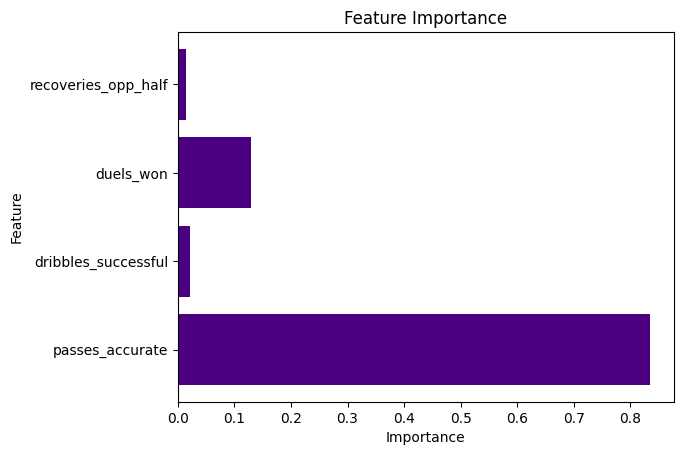

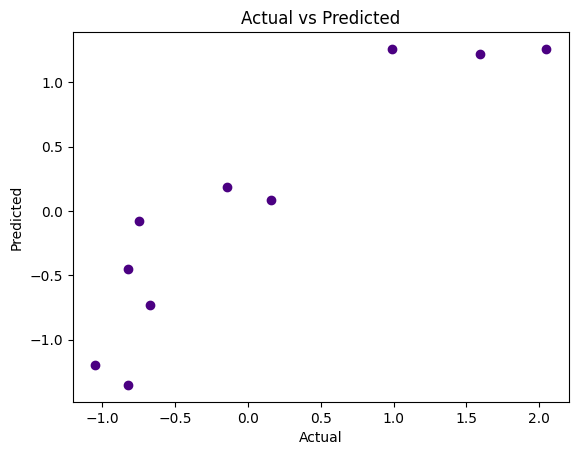

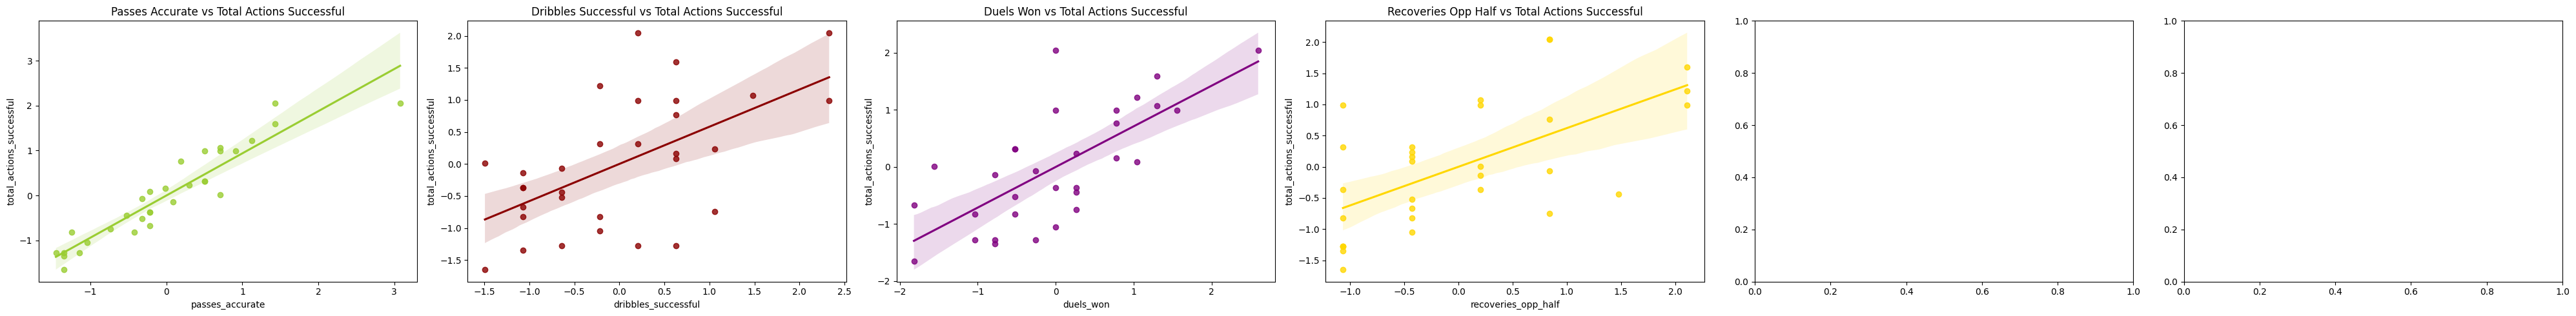

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate',  'dribbles_successful', 'duels_won', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='indigo') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='indigo')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(40, 5))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[1])
axs[1].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[2])
axs[2].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[3])
axs[3].set_title('Recoveries Opp Half vs Total Actions Successful')

plt.tight_layout()
plt.show()

Mean Cross-Validation Score (0.55): might indicate that the model is better than a random guess but is not highly predictive. This could suggest the presence of a bias or underfitting, where the model is too simple to capture the underlying complexities of the football player data. On football optics, The average performance of the model indicates that there might be other underlying factors affecting the prediction of player performance, such as coaching strategies or team dynamics, that have not been captured. This may not provide a highly accurate depiction of Vinicius Jr.'s abilities. 

Mean Absolute Error (MAE) (0.36): an MAE of 0.36 signifies that the model's predictions are, on average, 0.36 units away from the actual values. Depending on the scale and nature of the variable being predicted, this may or may not be an acceptable level of error. On football optics, a moderate level of error in prediction might imply that the model has some difficulty in capturing the nuances of Vinicius Jr.'s playing style, such as dribbling ability or positional awareness. It could reflect the dynamic and multifaceted nature of football where many variables interact. 

Mean Squared Error (MSE) (0.18): the MSE gives more weight to larger errors in prediction. An MSE of 0.18 might indicate a reasonable fit of the model, but without the context of the scale of the dependent variable, it's challenging to definitively judge its quality. On football optics, the error level suggests that the model may struggle with some extreme or outlier performances by Vinicius Jr. This could relate to matches where he had an exceptionally good or bad game, and these may not be well-represented by the model. 

R-squared (R^2) (0.83): an R^2 value of 0.8358 indicates that approximately 83.58% of the variability in the dependent variable is explained by the model. This is generally considered a good fit, showing that the model captures a significant portion of the underlying structure in the data. On football optics, an R^2 value of this magnitude suggests that the model has captured a substantial portion of the factors that influence Vinicius Jr.'s performance. However, the remaining unexplained variance might be attributed to intangible or less quantifiable aspects such as team spirit, mental resilience, or individual creativity.

In summary, the model seems to have a decent fit with some potential areas of improvement. It captures some of the key aspects affecting Vinicius Jr.'s performance but might benefit from further feature engineering or tuning to encapsulate the full complexity of football performance.

### Based on Pass Accuracy

Mean cross-validation score: 0.47
MAE: 0.28531633966514175
MSE: 0.12231538228259531
R^2: 0.8533624891728231


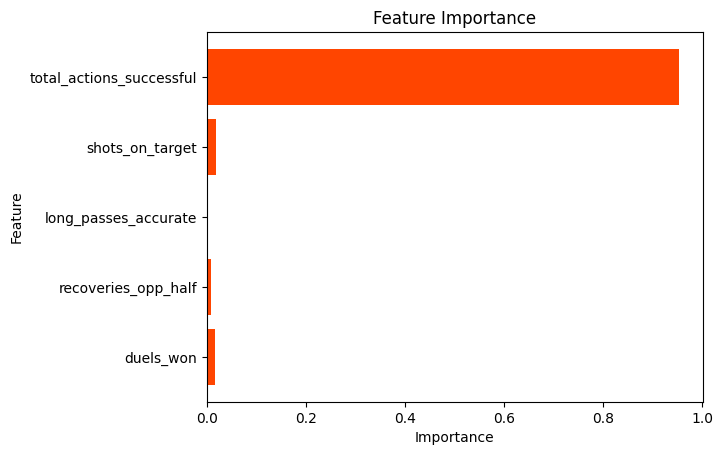

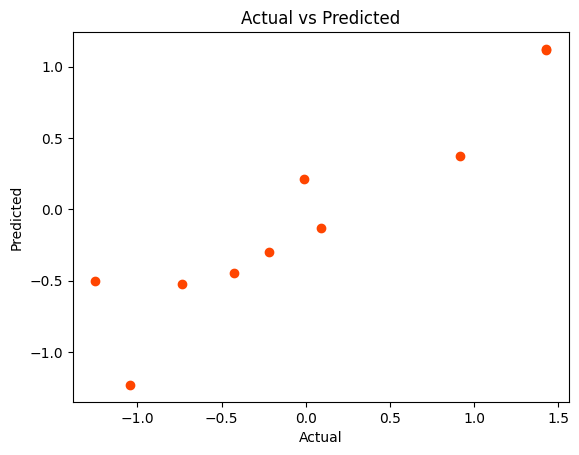

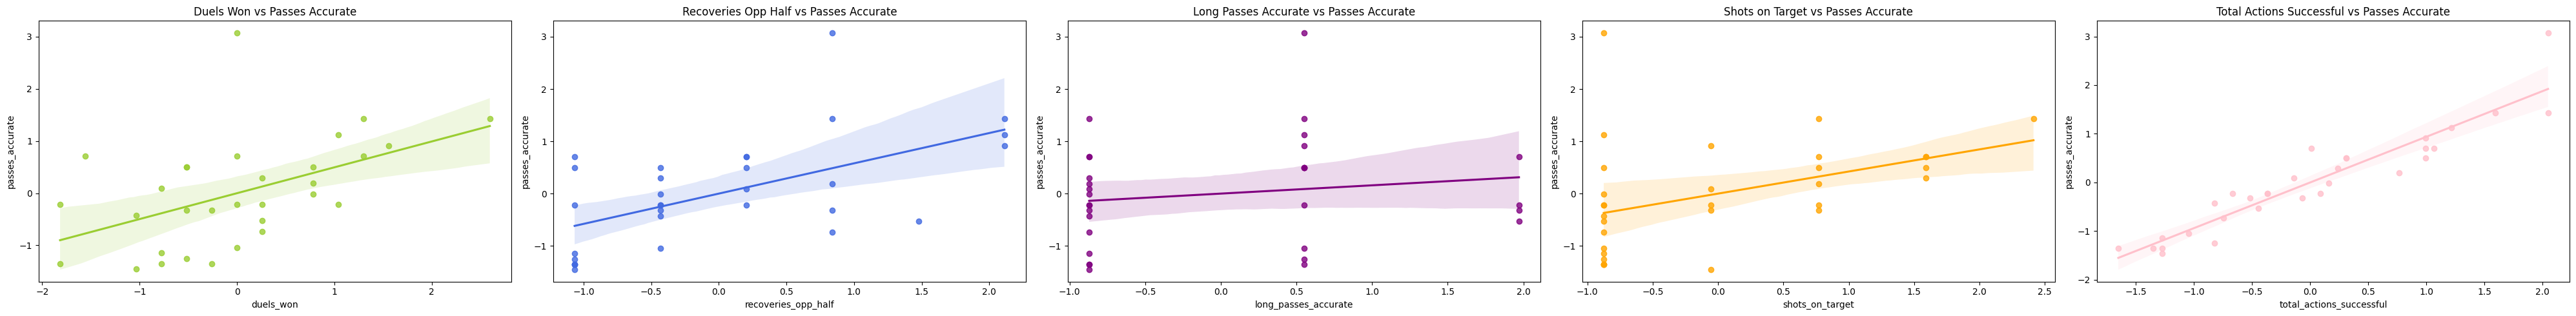

In [ ]:
# Prepare the data
X = normalized_df[['duels_won', 'recoveries_opp_half', 'long_passes_accurate', 'shots_on_target', 'total_actions_successful']]
y = normalized_df['passes_accurate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='orangered') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='orangered')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(40, 5))

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Recoveries Opp Half vs Passes Accurate')

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, color='purple', ax=axs[2])
axs[2].set_title('Long Passes Accurate vs Passes Accurate')

sns.regplot(x='shots_on_target', y='passes_accurate', data=normalized_df, color='orange', ax=axs[3])
axs[3].set_title('Shots on Target vs Passes Accurate')

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='pink', ax=axs[4])
axs[4].set_title('Total Actions Successful vs Passes Accurate')

plt.tight_layout()
plt.show()

Mean Cross-Validation Score (0.47): a mean cross-validation score of 0.47 indicates a model that's performing slightly below average in capturing the underlying pattern in pass accuracy. This could be a result of underfitting, or perhaps the features included are not enough to model the complexity of pass accuracy accurately. On football optics, this score might imply that pass accuracy, especially in the case of Vinicius Jr., could be influenced by various other factors that are not captured by the model. Things like decision-making under pressure, the quality of the opponents, and the team's overall playing style might be affecting this metric. 

Mean Absolute Error (MAE) (0.28): indicates that, on average, the model's predictions are 0.28 units off the actual values. Depending on the scale, this might be an acceptable error, although without knowing the exact nature of the dependent variable, it's challenging to say definitively. On football optics, a moderate error like this could reflect the inherent unpredictability in passing, especially for a forward like Vinicius Jr., who might often attempt riskier or more challenging passes.

 Mean Squared Error (MSE) (0.12): may be indicative of a model that generally fits well but might have a few areas where the predictions are notably off. As the MSE penalizes larger errors more, this could be areas to investigate further. On football optics, From the sports perspective, the error here may suggest that the model might not fully capture some of the complex situations in which Vinicius Jr. passes the ball, such as specific game scenarios, the type of pass, or the tactical setup of the team.

 R-squared (R^2) (0.85): is generally considered strong, explaining approximately 85.34% of the variance in the dependent variable. This shows that the model is capturing a significant part of what influences pass accuracy. On football optics, the high R^2 value suggests that the model has done well in quantifying many aspects of Vinicius Jr.'s passing ability. The remaining unexplained variance might include factors like individual creativity, on-the-spot decision-making, and real-time adjustments to the opposing team's movements. 

In conclusion, this XGBoost Regressor Model on pass accuracy presents a good picture of Vinicius Jr.'s performance but may benefit from further investigation into the features that affect passing. The sports perspective emphasizes the importance of understanding the game's complexity and including these insights into the modeling process.

### Based on Dribbles Success

Mean cross-validation score: -0.16
MAE: 0.8189089173523719
MSE: 1.1510142073926741
R^2: 0.2417728213453587


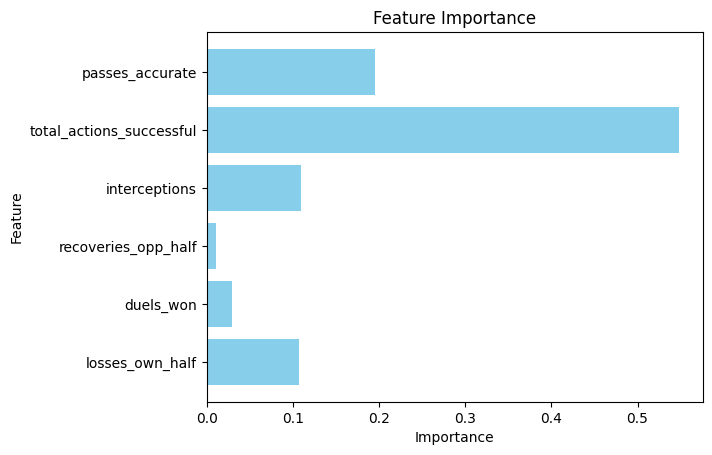

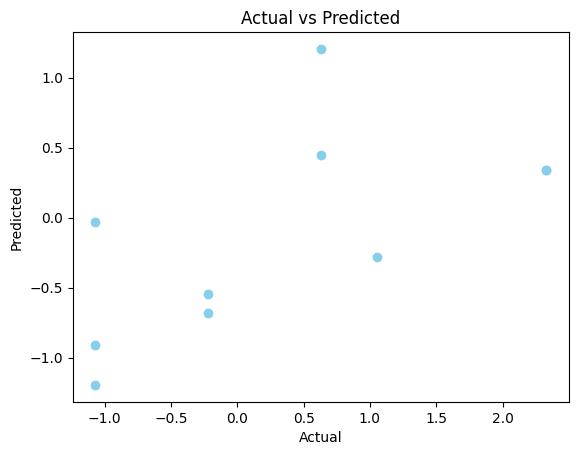

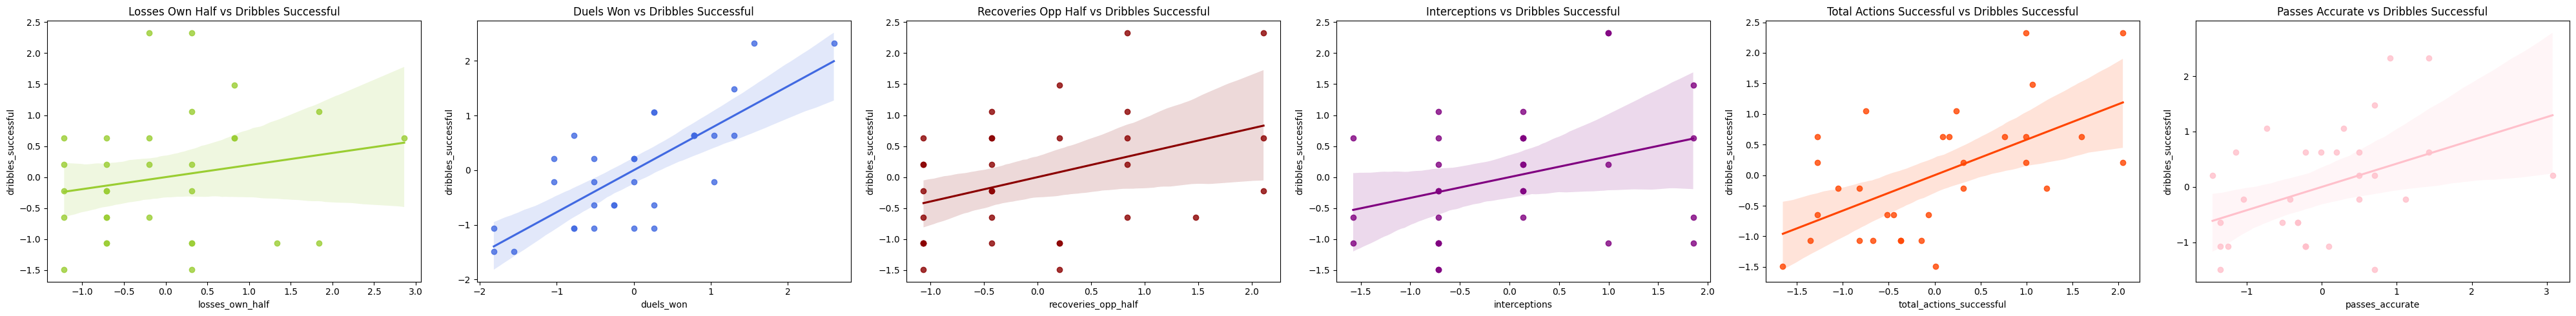

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'duels_won', 'recoveries_opp_half', 'interceptions',  'total_actions_successful', 'passes_accurate']]
y = normalized_df['dribbles_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='skyblue') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='skyblue')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(40, 5))

sns.regplot(x='losses_own_half', y='dribbles_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Losses Own Half vs Dribbles Successful')

sns.regplot(x='duels_won', y='dribbles_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Duels Won vs Dribbles Successful')

sns.regplot(x='recoveries_opp_half', y='dribbles_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Recoveries Opp Half vs Dribbles Successful')

sns.regplot(x='interceptions', y='dribbles_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Interceptions vs Dribbles Successful')

sns.regplot(x='total_actions_successful', y='dribbles_successful', data=normalized_df, color='orangered', ax=axs[4])
axs[4].set_title('Total Actions Successful vs Dribbles Successful')

sns.regplot(x='passes_accurate', y='dribbles_successful', data=normalized_df, color='pink', ax=axs[5])
axs[5].set_title('Passes Accurate vs Dribbles Successful')

plt.tight_layout()
plt.show()

Mean Cross-Validation Score (-0.16): a negative mean cross-validation score of -0.16 is concerning, indicating that the model is performing worse than a constant predictor, i.e., simply predicting the mean of the target variable for all observations. This can hint at serious issues with the model's construction, possibly related to feature selection or hyperparameters. On football optics, This poor performance might imply that the model is not capturing the intricate details of dribbling success, particularly for Vinicius Jr. It could be missing vital elements like the player's agility, timing, or the influence of opponents' defensive strategies. 

Mean Absolute Error (MAE) (0.81): an MAE of 0.8189 is considerably high and signifies a substantial discrepancy between the predicted values and the actual outcomes. It indicates a poor fit, which might necessitate revisiting the modeling process. On football optics, This high error level might reflect the multifaceted nature of dribbling in football. For a player like Vinicius Jr., who is known for his dribbling ability, the model may fail to account for nuanced aspects like the player's creativity, one-on-one ability, and adaptability during a match.

Mean Squared Error (MSE) (1.15): emphasizes that the model's predictions are often substantially wrong, especially in cases with large discrepancies between predicted and actual values. The model likely needs substantial reevaluation and tuning. On football optics, This error underscores the complexity of quantifying dribbling success. It might suggest that the model does not adequately capture specific match situations, the quality of the defenders faced, or the tactical context in which Vinicius Jr. is dribbling. 

R-squared (R^2) (0.24): is very low, meaning that only around 24.18% of the variability in dribbling success is being explained by the model. This reflects a weak fit and a significant lack of predictive power. On football optics, This low R^2 score reveals that the model is not capturing the majority of factors that contribute to Vinicius Jr.'s dribbling success. It could indicate that more qualitative aspects like technique, creativity, or game awareness are not being adequately represented. 

In summary, the model's poor performance on dribbling success suggests a need for a comprehensive reevaluation. From a sports perspective, it emphasizes the complexity of modeling specific football attributes like dribbling. It might be necessary to include additional features or insights that reflect the nature of the game and the unique characteristics of a player like Vinicius Jr.

### Based on Duels Won

Mean cross-validation score: 0.27
MAE: 0.7918080060090119
MSE: 0.7878687991092749
R^2: 0.5146967051108526


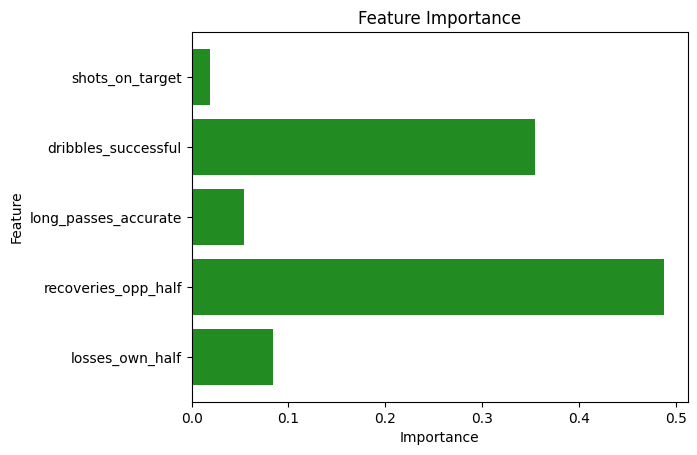

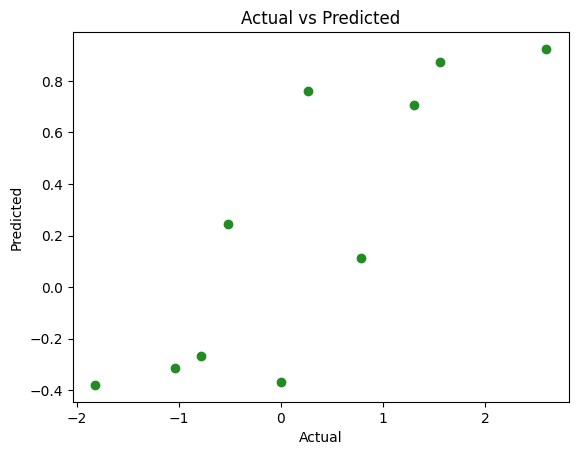

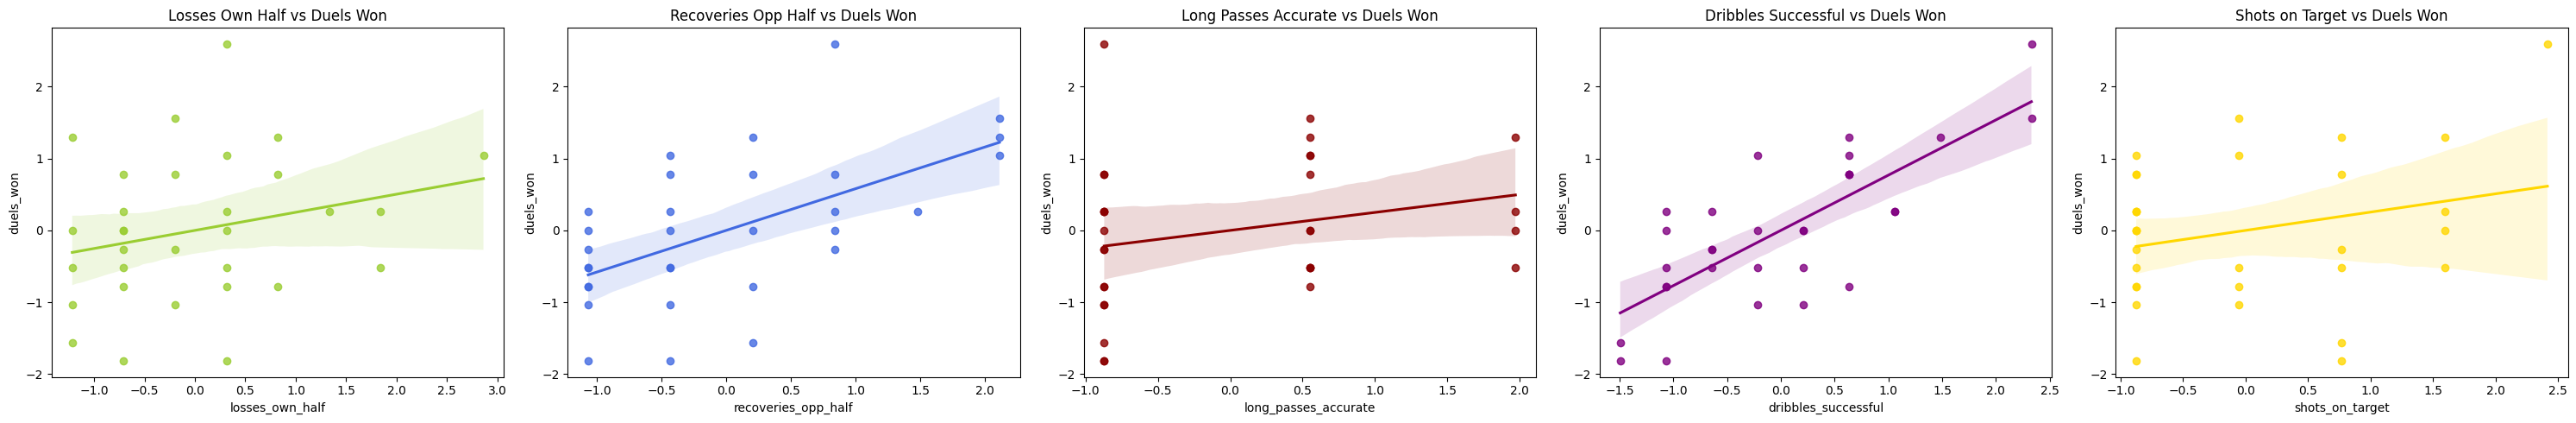

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'recoveries_opp_half', 'long_passes_accurate', 'dribbles_successful', 'shots_on_target']]
y = normalized_df['duels_won']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='forestgreen') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='forestgreen')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 5))

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Losses Own Half vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Recoveries Opp Half vs Duels Won')

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Long Passes Accurate vs Duels Won')

sns.regplot(x='dribbles_successful', y='duels_won', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Dribbles Successful vs Duels Won')

sns.regplot(x='shots_on_target', y='duels_won', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Shots on Target vs Duels Won')

plt.tight_layout()
plt.show()

Mean Cross-Validation Score (0.27): a mean cross-validation score of 0.27 indicates a subpar model performance. It's an improvement compared to a negative value but is still low, which can point towards either underfitting or missing relevant features that could better capture the underlying data patterns. this suggests that while the model captures some aspects of duels in football, it likely misses several intricacies. Duels in football aren't just about physical strength; they involve technique, positioning, and game intelligence, factors that might be affecting Vinicius Jr.'s performance in this area. 

Mean Absolute Error (MAE) (0.79): there's a considerable average discrepancy between the model's predictions and the actual outcomes. This indicates that the model's forecasts for Duels Won often deviate significantly from the true values. On football optics, this level of error could suggest that the model struggles to capture the complete picture of Vinicius Jr.'s dueling capability. Duels in football are multifaceted, and factors like agility, decision-making, and tactical awareness play crucial roles, which the model might not be fully capturing. 

Mean Squared Error (MSE) (0.78): an MSE of 0.7879, which penalizes larger errors more than smaller ones, indicates that there might be situations where the model's predictions are notably off. This could be a result of outliers or specific scenarios where the model underperforms. On football optics, some matches or situations might challenge the model more than others. It could be that during certain games, when Vinicius Jr. faces particularly strong opponents or unique tactical setups, the model struggles to predict his dueling success accurately. 

R-squared (R^2) (0.51): means that the model explains approximately 51.47% of the variance in the dependent variable. While better than random, it's not particularly high and suggests room for improvement. On football optics, capturing just over half of the variance indicates that while the model picks up on some aspects of Vinicius Jr.'s dueling ability, there's a significant part of his performance that remains unexplained. Factors like experience, individual tactics, or in-the-moment decisions might be influencing the outcomes more than the model indicates. 

In conclusion, while this XGBoost Regressor Model on Duels Won has captured some aspects of Vinicius Jr.'s performance, there's substantial room for improvement. Football is a complex sport with a myriad of influencing factors, and capturing the essence of duels, which involve both technical and psychological aspects, can be challenging.

## Conformal Prediction

#### Conformal Prediction provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.


### Based on Total Actions

Prediction interval coverage: 67.47%
Average prediction interval width: 1.51


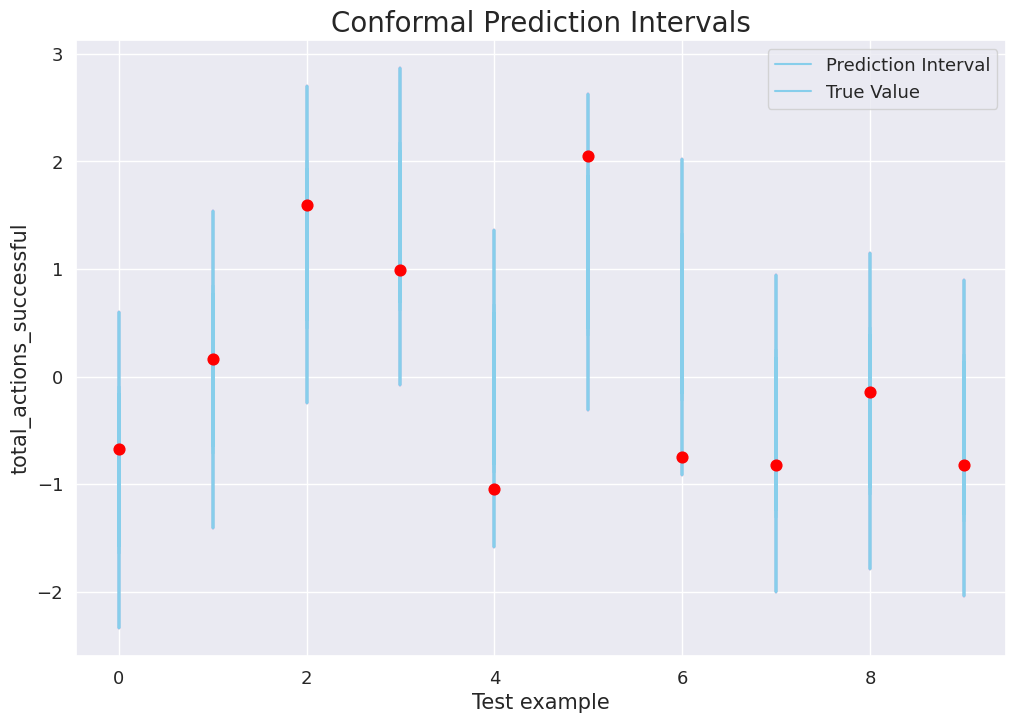

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['duels_won', 'interceptions', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model (you can replace this with the XGBoost model or any other model)
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (67.47%): refers to the proportion of observations that fall within the specified prediction interval. In statistical terms, this might suggest a moderate confidence level in the predictions, possibly due to model uncertainty or inherent noise in the data. If this is a consistent finding across multiple runs or folds, it may call for further investigation into the underlying model assumptions or potential improvements in the feature engineering. On football optics, a prediction interval coverage of 67.47% on Vinicius Jr's performance might suggest that the model is capturing some underlying patterns related to his play but may not be fully reflecting all the complexities of his game. It could represent aspects like his scoring ability, dribbling success, or passing accuracy but may leave out nuanced factors like tactical decision-making or the influence of teammates and opponents. The data might need more refinement or additional features to better encapsulate the full spectrum of his performance on the pitch. 

Average prediction interval width (1.51): can be interpreted as the average "spread" or "range" within which the model expects the true value to lie. This is a measure of the model's uncertainty and is tied to the prediction interval coverage. A narrower interval would typically be associated with higher confidence in the prediction but could lead to lower coverage. In this context, the width of 1.51 might suggest a trade-off between confidence and coverage. Analyzing whether this width is appropriate would involve understanding the scale of the predicted variable and the acceptable level of uncertainty for the specific application. On football optics, when looking at the performance of Vinicius Jr., an average prediction interval width of 1.51 could mean that there is some variability in his performance that is not easily captured by known metrics or features. In football, this could relate to his adaptability to different game situations or his inconsistency in certain aspects of play. It reflects the dynamic nature of the sport where a player's effectiveness can change based on the opposition, game strategy, or even individual moments within a match. Therefore, while the interval might seem moderate in statistical terms, it could be quite insightful in understanding the multifaceted nature of his game.

### Based on Pass Accuracy

Prediction interval coverage: 67.37%
Average prediction interval width: 0.75


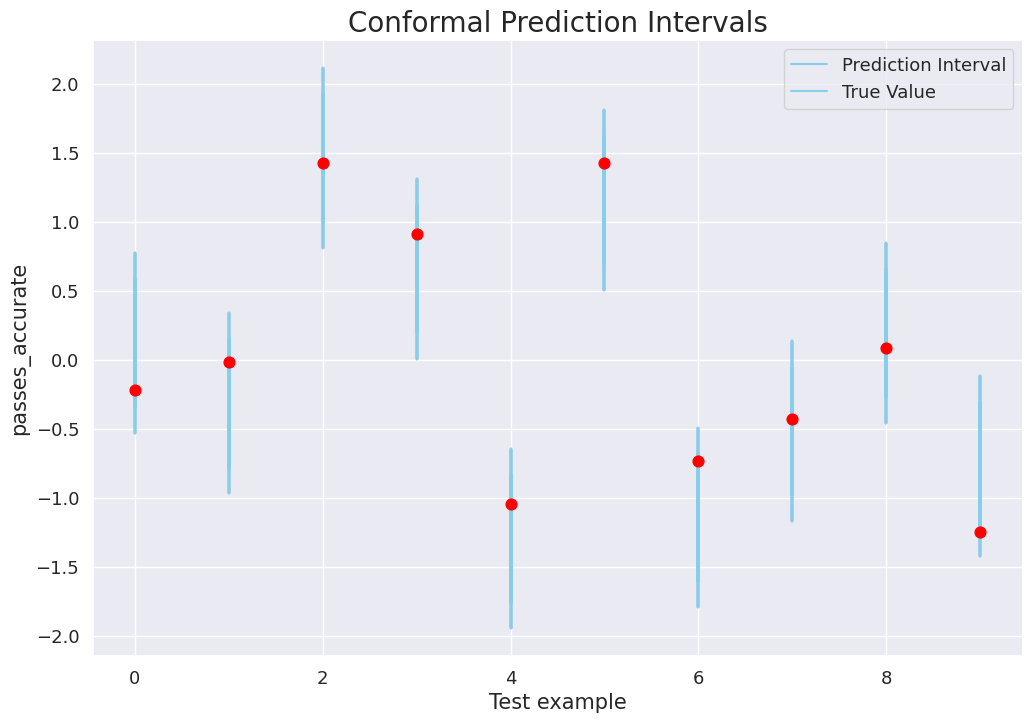

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['duels_won', 'interceptions', 'long_passes_accurate', 'dribbles_successful',  'total_actions_successful']]
y = normalized_df['passes_accurate']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model (you can replace this with the XGBoost model or any other model)
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('passes_accurate', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (67.37%): for pass accuracy is a measure that reveals the percentage of actual observations that lie within the predicted intervals. The coverage rate is fairly similar to the one seen with total actions, which might indicate a consistent level of uncertainty across different features. This could mean that the model is robust but still leaves room for enhancement. The specific focus on pass accuracy might require a more refined selection of features or tuning of hyperparameters. On football optics, may reflect the player's ability to perform well in different game scenarios but also indicates variability. Pass accuracy can be influenced by various factors like pressure from opponents, field position, and game strategy. It might suggest that while Vinicius Jr. is generally accurate with his passes, there are specific conditions or challenges that the model might not be fully accounting for. This could be a reflection of his playing style, the team's tactics, or the competition he faces. 

Average prediction interval width (0.75):  an average prediction interval width of 0.75, in the context of pass accuracy, is indicative of the uncertainty associated with the prediction. Compared to the previous width for total actions, this is a narrower interval, perhaps reflecting a greater level of confidence in this specific aspect of performance. It might also indicate that pass accuracy is a more stable and less volatile feature in the dataset. Analyzing this width in relation to the scale of the pass accuracy data would be essential to understand if this interval is meaningful or too narrow. On football optics, In terms of Vinicius Jr.'s performance, an average prediction interval width of 0.75 for pass accuracy might represent the consistent and reliable nature of his passing game. This narrower interval could be a testament to his skill in maintaining accuracy across various matches and conditions. However, the exact interpretation might depend on the specific context of his role within the team and the types of passes he typically executes. It could mean that his short-range passing is quite dependable, but there might still be opportunities for improvement in more complex or high-risk passes. 

In conclusion, the Conformal Prediction Model's outcomes related to pass accuracy for Vinicius Jr. present a nuanced picture, with statistical measures pointing to certain strengths and areas for refinement in both the model and the player's game. The interplay between statistical findings and on-field performance provides a comprehensive view, bridging the gap between data science and sports analysis.

### Based on Dribbles Won

Prediction interval coverage: 62.32%
Average prediction interval width: 1.34


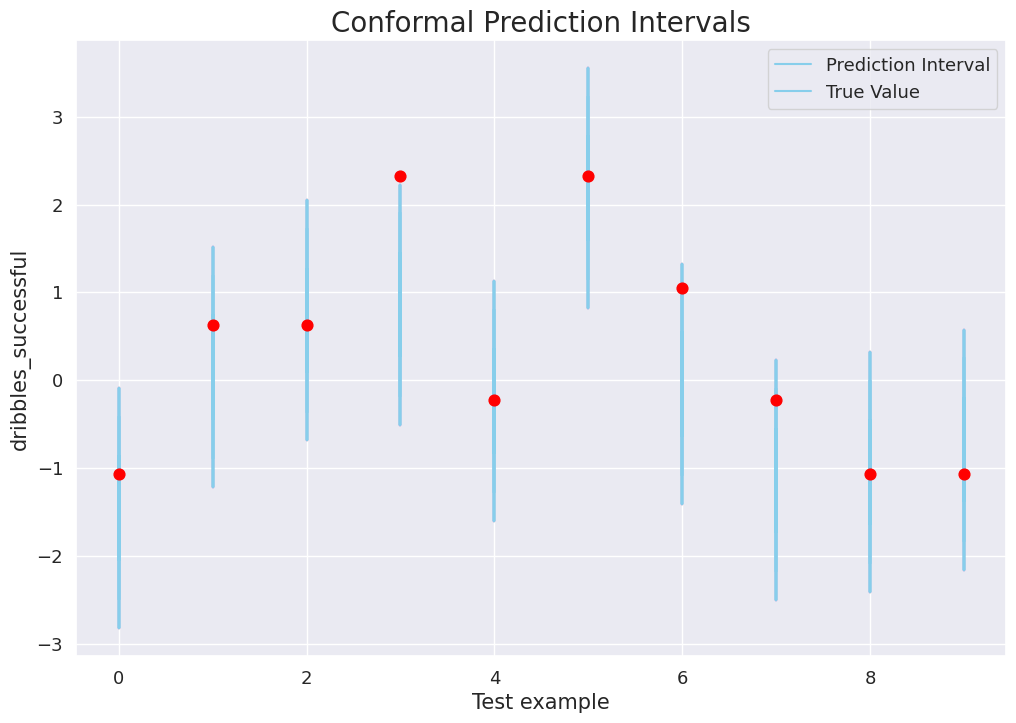

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['duels_won', 'interceptions', 'shots_on_target', 'total_actions_successful', 'passes_accurate']]
y = normalized_df['dribbles_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model (you can replace this with the XGBoost model or any other model)
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('dribbles_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (62.32%): represents a slightly lower proportion of actual observations falling within the predicted intervals compared to previous models. This might suggest higher uncertainty or potential model misspecification related to dribbles success. In a statistical context, it could indicate that the features and structure used to model dribbles success are not capturing the underlying patterns as effectively. An investigation into different features, model architecture, or calibration methods might be warranted. On football optics, reflect the inherent unpredictability and complexity of dribbling as a skill. Dribbling is often influenced by many on-the-spot decisions and reactions to opponents' movements. Vinicius Jr.'s ability to succeed in dribbling may vary from game to game and depend on various contextual factors such as opponent tactics, field condition, and his physical and mental state. This lower coverage might highlight the intricate and individualized nature of his dribbling skills, which can be challenging to capture in a model.

 Average prediction interval width (1.34): an average prediction interval width of 1.34 for dribbles success is an indication of the model's uncertainty about its predictions. This width is narrower than that for total actions but wider than that for pass accuracy, possibly reflecting the balance between the complexity and predictability of dribbling success. The choice of 1.34 as the interval width might indicate an optimization between model confidence and coverage, and it could be a valuable insight into the model's understanding of this specific aspect of performance. On football optics, may signify that his dribbling success is subject to fluctuations and variations. It might indicate that his dribbling is generally effective but can be inconsistent depending on different factors such as the quality of the opponents or the tactics employed during the game. This variability could be an essential part of his playing style, showcasing agility and creativity but also revealing potential areas for improvement in consistency.

In summary, the Conformal Prediction Model's outcomes related to dribbles success for Vinicius Jr. provide insights into both the modeling process and the player's specific abilities. The statistical measures highlight the complexity of modeling dribbling success, while the sport perspective underscores the nuanced and dynamic nature of this particular skill. These findings can guide further model refinement and deepen the understanding of the player's performance. 

### Based on Duels Won

Prediction interval coverage: 61.31%
Average prediction interval width: 1.26


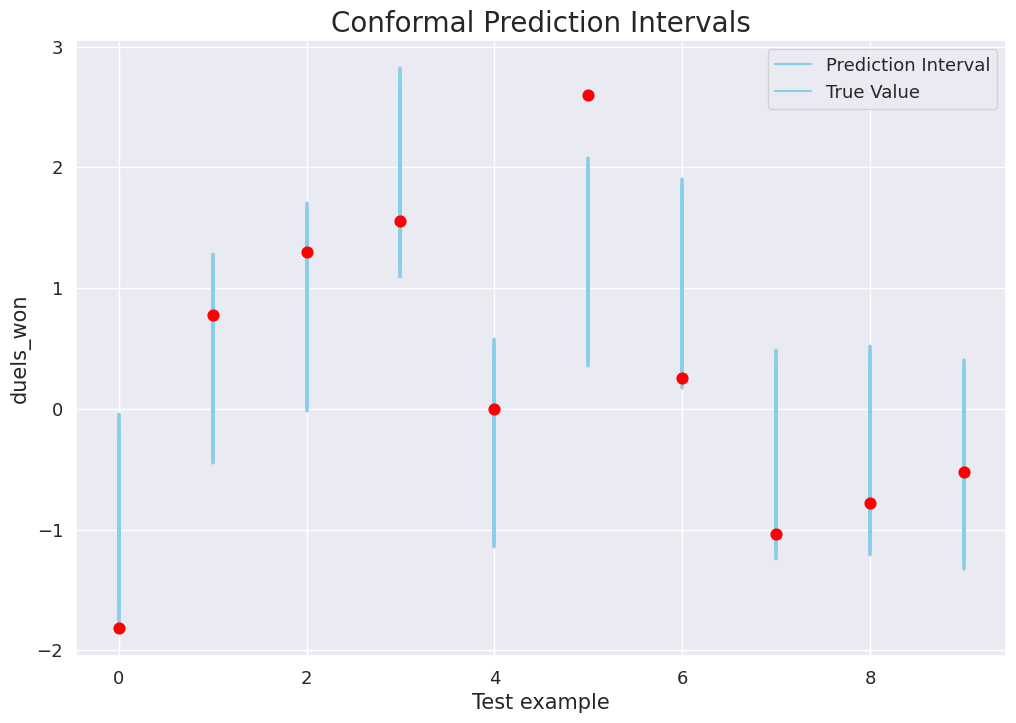

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['losses_own_half', 'recoveries_opp_half', 'dribbles_successful','shots_on_target']]
y = normalized_df['duels_won']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model (you can replace this with the XGBoost model or any other model)
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('duels_won', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (61.31%): is somewhat lower than the previous features we have examined. From a statistical standpoint, this could imply a greater uncertainty in the predictions related to duels won. It may suggest that the model's underlying assumptions or selected features may not be entirely aligned with the intricacies of this aspect of the game. Investigating the specific nature of the duels, the quality of data, and potential biases might be necessary steps to improve this coverage. On football optics, might reveal the challenging and complex nature of one-on-one interactions in football. Duels can be affected by a multitude of factors including the physicality of the player, tactical approach, the specific opponents, and even game dynamics such as score and time. This lower coverage might illustrate the difficulty in quantifying and predicting this aspect of Vinicius Jr.'s game and could point to areas where he could strive for more consistency or where the team's tactics might be refined. 

Average prediction interval width (1.26): an average prediction interval width of 1.26 for Duels Won indicates the range in which the model expects the true value to lie. This width, being between the ranges we've previously observed, could reflect a specific level of uncertainty related to duels. Understanding the exact nature and type of duels considered in the model might be crucial for interpreting this interval width properly. If the width seems inappropriate for the scale of the data or the application's requirements, further tuning and model refinement might be necessary. On football optics, when examining Vinicius Jr.'s ability to win duels, an average prediction interval width of 1.26 may highlight the multifaceted nature of this aspect of his play. Duels encompass various types of confrontations, such as aerial battles, tackles, or challenges for the ball. This width might indicate a balance in his success across different types of duels but also show areas where improvement or specialization might enhance his effectiveness. It could be reflective of his adaptability to different situations but also underline the importance of understanding the context of each duel to fully grasp his performance.

In conclusion, the outcomes of the Conformal Prediction Model related to Duels Won for Vinicius Jr. provide insights that span both statistical modeling and football analysis. The measures reveal a complex picture of modeling this particular aspect of the game and offer a glimpse into the player's skills and potential areas for development. By integrating the perspectives of data science and sports expertise, we can create a more holistic understanding of both the model's capabilities and the athlete's performance

## Radar Visualization

### Vinicius Jr. Performance - PSG 1st Leg (2022)

- Total Actions Success (TAS): 39%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 68%

- Long Passes Accurate (LPA): 0%

- Dribbles Success (DS): 43%

- Duels Won (DW): 47%

- Losses (LOH): 14%

- Recoveries (ROPH): 0%

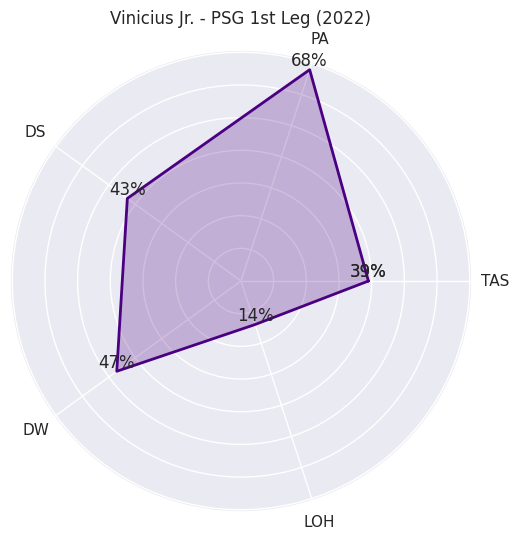

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DS', 'DW', 'LOH'])
stats = np.array([39, 68, 43, 47, 14])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - PSG 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='indigo', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='indigo', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Vinicius Jr. Performance - PSG 2nd Leg (2022)

- Total Actions Success (TAS): 54%

- Shots on Target (SOT): 33%

- Passes Accurate (PA): 88%

- Long Passes Accurate (LPA): 100%

- Dribbles Success (DS): 67%

- Duels Won (DW): 43%

- Losses (LOH): 18%

- Recoveries (ROPH): 100%

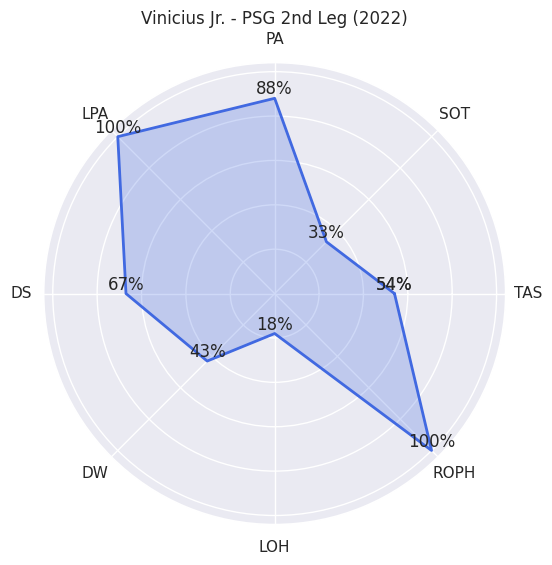

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'SOT','PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([54, 33, 88, 100, 67, 43, 18, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - PSG 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Vinicius Jr. Performance - CHE 1st Leg (2022)

- Total Actions Success (TAS): 45%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 81%

- Long Passes Accurate (LPA): 100%

- Dribbles Success (DS): 40%

- Duels Won (DW): 39%

- Losses (LOH): 25%

- Recoveries (ROPH): 0%

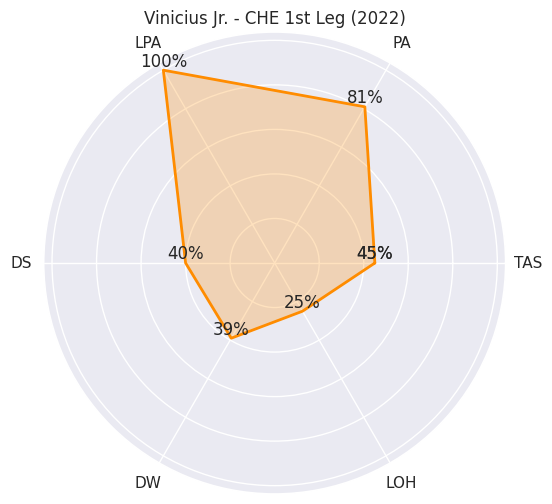

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DS', 'DW', 'LOH'])
stats = np.array([45, 81, 100, 40, 39, 25])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - CHE 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='darkorange', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkorange', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Vinicius Jr. Performance - CHE 2nd Leg (2022)

- Total Actions Success (TAS): 49%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 76%

- Long Passes Accurate (LPA): 0%

- Dribbles Success (DS): 60%

- Duels Won (DW): 45%

- Losses (LOH): 29%

- Recoveries (ROPH): 35%

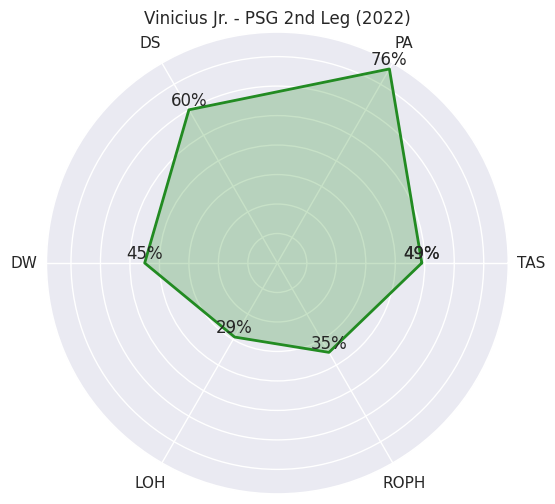

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([49, 76, 60, 45, 29, 35])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - PSG 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='forestgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='forestgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Vinicius Jr. Performance - MC 1st Leg (2022)

- Total Actions Success (TAS): 41%

- Shots on Target (SOT): 33%

- Passes Accurate (PA): 80%

- Long Passes Accurate (LPA): 0%

- Dribbles Success (DS): 71%

- Duels Won (DW): 35%

- Losses (LOH): 33%

- Recoveries (ROPH): 0%

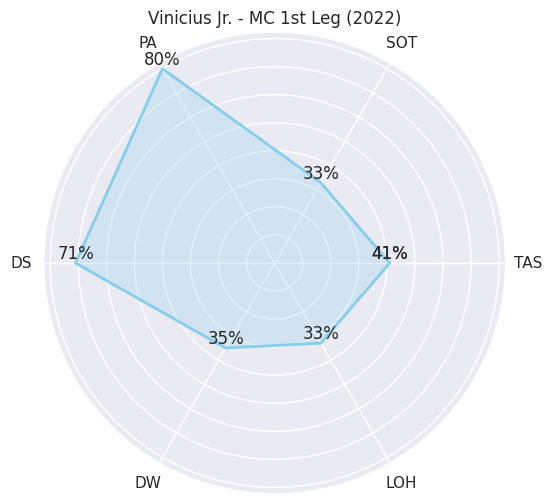

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'SOT','PA', 'DS', 'DW', 'LOH'])
stats = np.array([41, 33, 80, 71, 35, 33])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - MC 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='skyblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='skyblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Vinicius Jr. Performance - MC 2nd Leg (2022)

- Total Actions Success (TAS): 41%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 78%

- Long Passes Accurate (LPA): 67%

- Dribbles Success (DS): 18%

- Duels Won (DW): 28%

- Losses (LOH): 7%

- Recoveries (ROPH): 80%

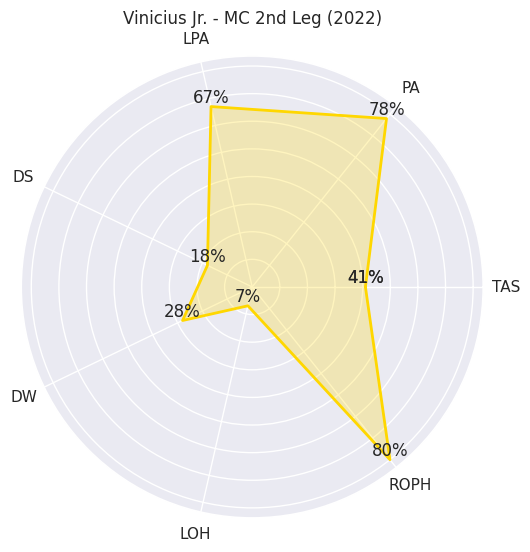

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([41, 78, 67, 18, 28, 7, 80])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - MC 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Vinicius Jr. Performance - LIV Final (2022)

- Total Actions Success (TAS): 49%

- Shots on Target (SOT): 100%

- Passes Accurate (PA): 93%

- Long Passes Accurate (LPA): 0%

- Dribbles Success (DS): 29%

- Duels Won (DW): 27%

- Losses (LOH): 33%

- Recoveries (ROPH): 40%

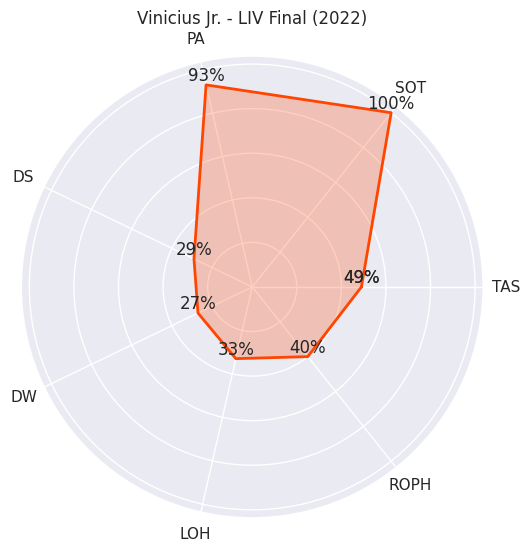

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'SOT','PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([49, 100, 93, 29, 27, 33, 40])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - LIV Final (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

###  Vinicius Jr. Performance - LIV 1st Leg (2023)

- Total Actions Success (TAS): 48%

- Shots on Target (SOT): 100%

- Passes Accurate (PA): 76%

- Long Passes Accurate (LPA): 0%

- Dribbles Success (DS): 50%

- Duels Won (DW): 34%

- Losses (LOH): 24%

- Recoveries (ROPH): 50%

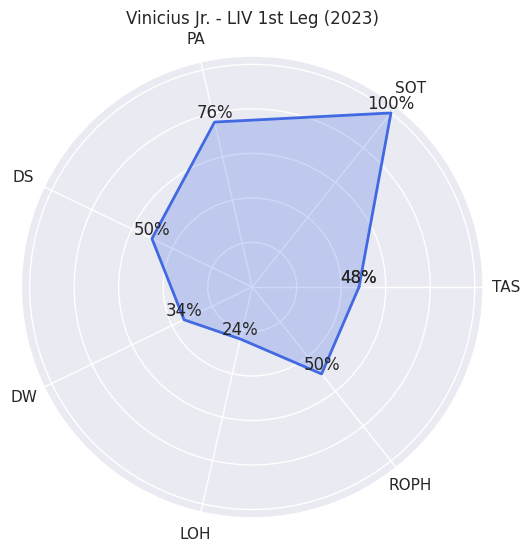

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'SOT','PA',  'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([48, 100, 76, 50, 34, 24, 50])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - LIV 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

###  Vinicius Jr. Performance - CHE 2nd Leg (2023)

- Total Actions Success (TAS): 57%

- Shots on Target (SOT): 67%

- Passes Accurate (PA): 68%

- Long Passes Accurate (LPA): 0%

- Dribbles Success (DS): 55%

- Duels Won (DW): 52%

- Losses (LOH): 7%

- Recoveries (ROPH): 100%

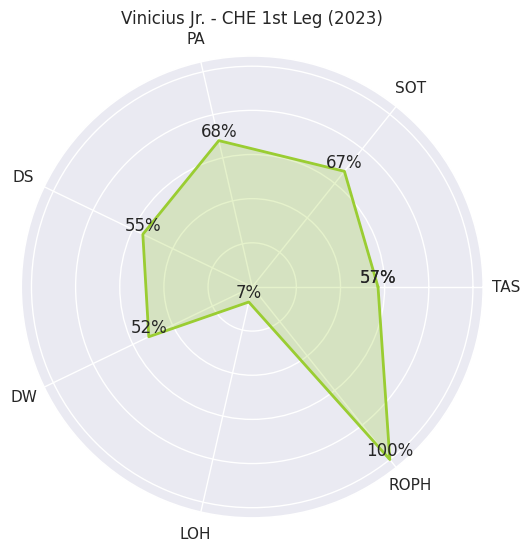

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'SOT','PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([57, 67, 68, 0, 55, 52, 7, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - CHE 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### MC 2nd Leg 2023

- Total Actions Success (TAS): 39%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 67%

- Long Passes Accurate (LPA): 50%

- Dribbles Success (DS): 33%

- Duels Won (DW): 33%

- Losses (LOH): 35%

- Recoveries (ROPH): 0%

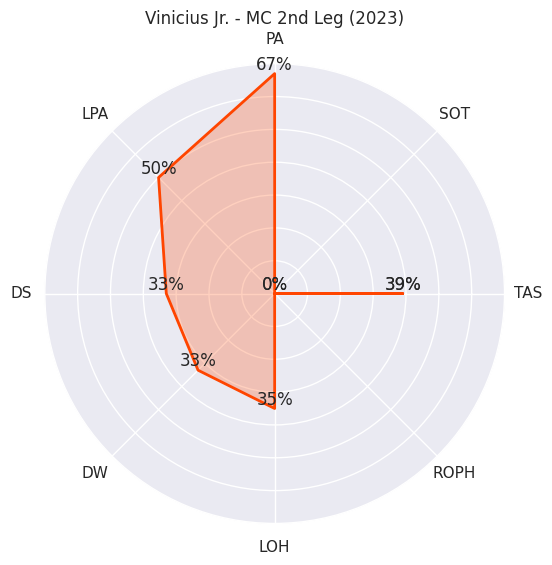

In [ ]:
  # Define the data for the radar chart
labels = np.array(['TAS', 'SOT','PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([39, 0, 67, 50, 33, 33, 35, 0])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Vinicius Jr. - MC 2nd Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e6a4be4b-5701-41c1-9aa8-9ab4557a64f6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>